In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import train_test_split
from sklearn.model_selection import train_test_split
#import standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:

'''
def extract_data(path_excel):
    data=pd.read_excel(path_excel)
    print(data.info())
    #convert zero values to nan
    data=data.replace(0,np.nan)
    print(data.isna().sum())
    #convert two words separated by space combined with '_'
    data.columns=data.columns.str.replace(' ','_')
    #convert two words separated by . combined with '_'
    data.columns=data.columns.str.replace('.','_')
    #check names of columns
    print(data.columns)
    coll=['Well','Date','Hours_Online','Freq', 'Ampere', 'Volt',
           'Press_Discharge','TM', 'Vibration', 'Gross_Rate']
    df=data[coll]
    #save data to csv
    df.to_csv('/Users/rianrachmanto/pypro/data/esp_new.csv',index=False)
    print(df.info())
    return df
'''

"\ndef extract_data(path_excel):\n    data=pd.read_excel(path_excel)\n    print(data.info())\n    #convert zero values to nan\n    data=data.replace(0,np.nan)\n    print(data.isna().sum())\n    #convert two words separated by space combined with '_'\n    data.columns=data.columns.str.replace(' ','_')\n    #convert two words separated by . combined with '_'\n    data.columns=data.columns.str.replace('.','_')\n    #check names of columns\n    print(data.columns)\n    coll=['Well','Date','Hours_Online','Freq', 'Ampere', 'Volt',\n           'Press_Discharge','TM', 'Vibration', 'Gross_Rate']\n    df=data[coll]\n    #save data to csv\n    df.to_csv('/Users/rianrachmanto/pypro/data/esp_new.csv',index=False)\n    print(df.info())\n    return df\n"

In [3]:
#path_excel='/Users/rianrachmanto/pypro/data/New_Data_ESP_CE.xlsx'
#data=extract_data(path_excel)

In [4]:
def load_data(path_csv):
    df=pd.read_csv(path_csv)
    print(df.info())
    print(df.shape)
    train,test=train_test_split(df,test_size=0.2,random_state=42)
    print('train shape:',train.shape)
    print('test shape:',test.shape)
    return train,test

In [5]:
path_csv='/Users/rianrachmanto/pypro/data/esp_new.csv'
train,test=load_data(path_csv)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202978 entries, 0 to 202977
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Well             202978 non-null  object 
 1   Date             202978 non-null  object 
 2   Hours_Online     91217 non-null   float64
 3   Freq             79585 non-null   float64
 4   Ampere           83274 non-null   float64
 5   Volt             76026 non-null   float64
 6   Press_Discharge  57558 non-null   float64
 7   TM               39661 non-null   float64
 8   Vibration        36035 non-null   float64
 9   Gross_Rate       85310 non-null   float64
dtypes: float64(8), object(2)
memory usage: 15.5+ MB
None
(202978, 10)
train shape: (162382, 10)
test shape: (40596, 10)


In [6]:
def eda(train):
    print('Number of Missing Values',train.isna().sum())
    numeric_columns=['Freq', 'Ampere', 'Volt', 'Press_Discharge', 'TM', 'Vibration']
    #plotting histogram for each numeric columns, with scale X adjusted with number of bins
    for col in numeric_columns:
        plt.hist(train[col],bins=20)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title('Histogram of '+col)
        plt.show()

Number of Missing Values Well                    0
Date                    0
Hours_Online        89328
Freq                98644
Ampere              95748
Volt               101554
Press_Discharge    116231
TM                 130637
Vibration          133531
Gross_Rate          94093
dtype: int64


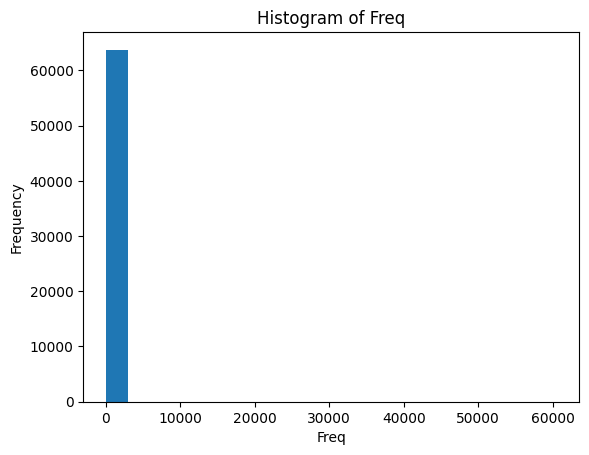

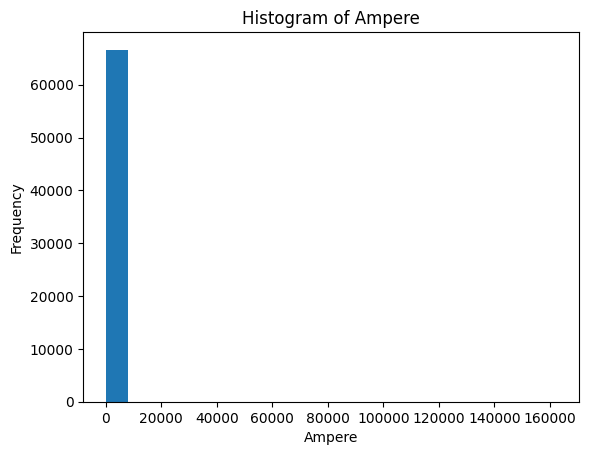

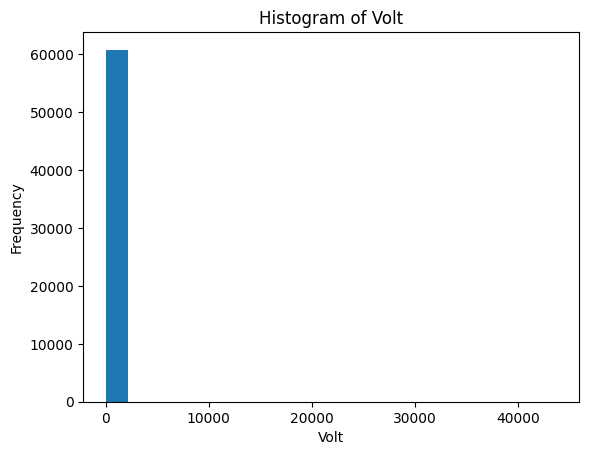

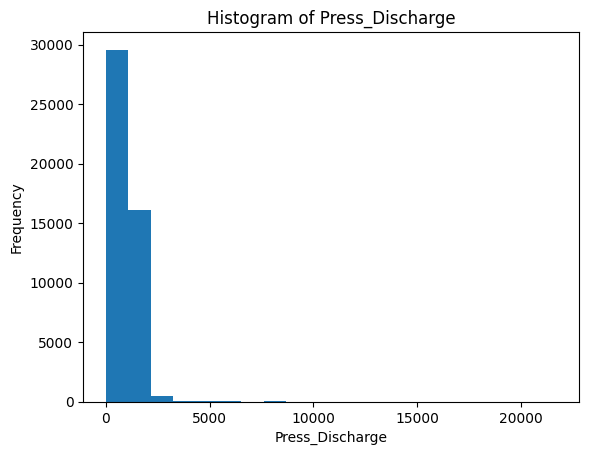

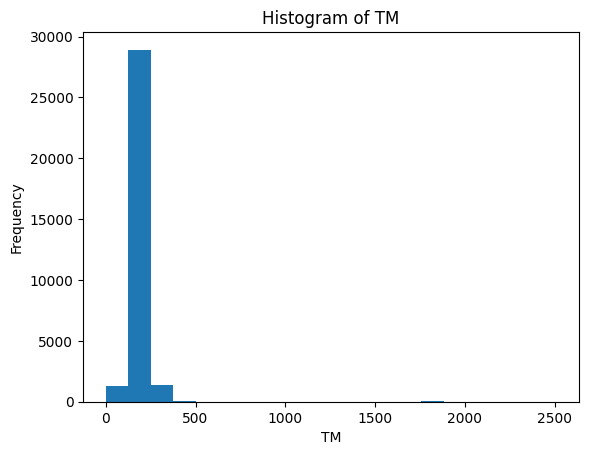

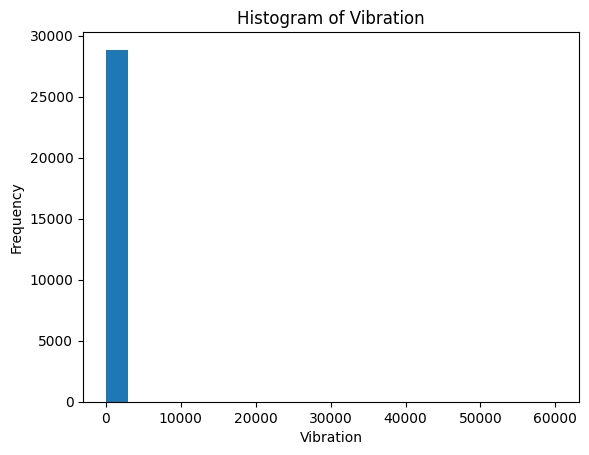

In [7]:
eda(train)

In [8]:
def clean_train(train):
    # Drop missing values
    train = train.dropna()
    # Check missing values
    print('Number of Missing Values:', train.isna().sum())
    # Check shape of data
    print('Train shape:', train.shape)
    print('Train info:', train.info())
    return train  # Return the cleaned DataFrame

def clean_test(test):
    # Drop missing values
    test = test.dropna()
    # Check missing values
    print('Number of Missing Values:', test.isna().sum())
    # Check shape of data
    print('Test shape:', test.shape)
    return test  # Return the cleaned DataFrame


In [9]:
train=clean_train(train)
test=clean_test(test)

Number of Missing Values: Well               0
Date               0
Hours_Online       0
Freq               0
Ampere             0
Volt               0
Press_Discharge    0
TM                 0
Vibration          0
Gross_Rate         0
dtype: int64
Train shape: (23173, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23173 entries, 13756 to 131932
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Well             23173 non-null  object 
 1   Date             23173 non-null  object 
 2   Hours_Online     23173 non-null  float64
 3   Freq             23173 non-null  float64
 4   Ampere           23173 non-null  float64
 5   Volt             23173 non-null  float64
 6   Press_Discharge  23173 non-null  float64
 7   TM               23173 non-null  float64
 8   Vibration        23173 non-null  float64
 9   Gross_Rate       23173 non-null  float64
dtypes: float64(8), object(2)
memory usage: 1.9+ MB
Train in

In [10]:
def preprocess(train):
    # standardize the data
    scaler = StandardScaler()
    numeric_columns = ['Freq', 'Ampere', 'Volt', 'Press_Discharge', 'TM', 'Vibration']
    train_scaled = scaler.fit_transform(train[numeric_columns])
    train_scaled = pd.DataFrame(scaled_train, columns=numeric_columns)
    print(train_scaled.head())
    return train_scaled

In [11]:
# Assuming clean_train is defined correctly as a DataFrame
train_scaled = preprocess(train)

NameError: name 'scaled_train' is not defined

In [ ]:
def apply_pca(train_scaled, feature_names, visualize=False):
    # Apply PCA with 3 components
    pca = PCA(n_components=4)
    principalComponents = pca.fit_transform(train_scaled)
    principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2','PC3','PC4'])
    print('Explained Variance Ratio:', pca.explained_variance_ratio_)
    
    # Extract and display loadings
    loadings = pca.components_.T
    loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4'], index=feature_names)
    print("Loadings:\n", loadings_df)
    
    if visualize:
        # Visualization: PCA Biplot for PC1 and PC2
        plt.figure(figsize=(10, 7))
        plt.scatter(principalDf['PC1'], principalDf['PC2'], alpha=0.3)  # Plotting data points
        
        # Adding feature vectors for PC1 and PC2
        for i, v in enumerate(loadings):
            plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, color='red')
            plt.text(v[0]*1.2, v[1]*1.2, feature_names[i], color='black')
        
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title("PCA Biplot with Loadings (PC1 vs PC2)")
        plt.grid(True)
        plt.axis('equal')  # Equal scaling for both axes
        plt.show()
    
    return principalDf

# Usage example, assuming 'data_scaled' is your standardized data and 'feature_names' are column names
# train_scaled = scaler.fit_transform(data)  # Assuming the data has already been scaled
# apply_pca(train_scaled, data.columns, visualize=True)


Explained Variance Ratio: [0.17568098 0.17219716 0.16714944 0.16653114]
Loadings:
                       PC1       PC2       PC3       PC4
Freq             0.274538  0.697011  0.191984 -0.126882
Ampere           0.182235  0.118862 -0.635816  0.653803
Volt            -0.190415  0.692247 -0.139698  0.014850
Press_Discharge  0.597748 -0.144011 -0.221908  0.027711
TM               0.705579  0.006958  0.243615 -0.134713
Vibration       -0.004090  0.007332  0.656333  0.733012


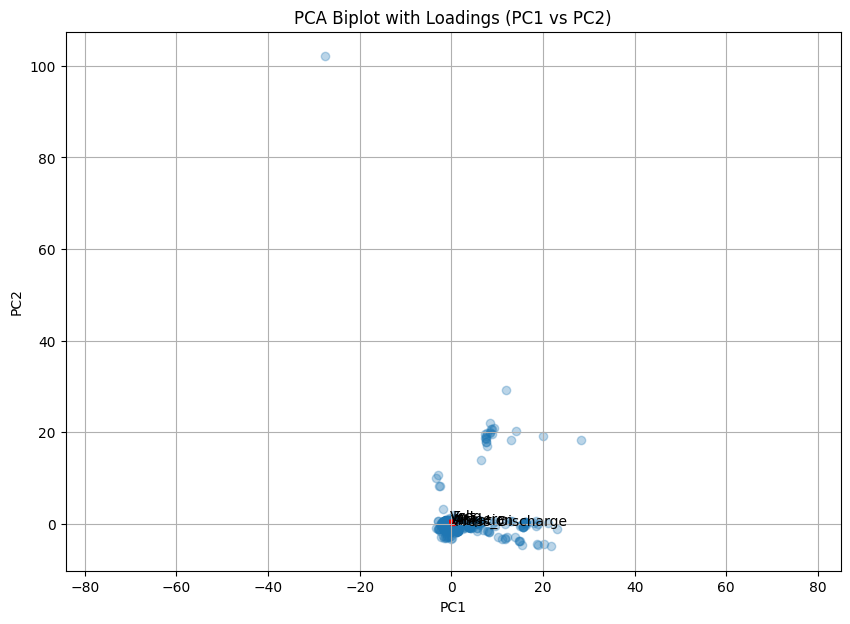

In [ ]:
principalDF=apply_pca(train_scaled,train_scaled.columns,visualize=True)

In [ ]:
def elbow_method(principalDF):
    distortions = []
    K = range(1, 11)

    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=5)
        kmeanModel.fit(principalDF)
        distortions.append(kmeanModel.inertia_)

    plt.figure(figsize=(16, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

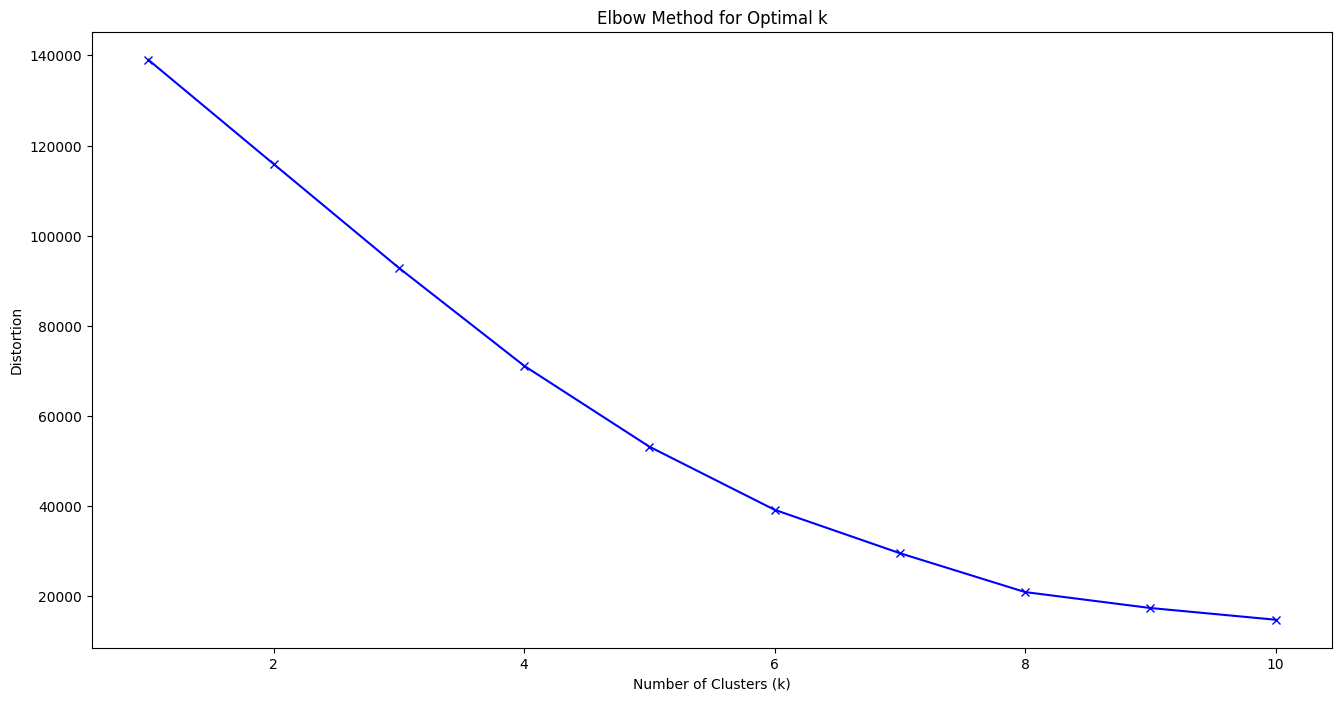

In [ ]:
elbow_method(train_scaled)

In [ ]:
# Assuming principalComponents is your PCA result with the necessary components
def make_cluster(principalDF):
    # Assuming principalDF is a DataFrame with PCA results
    kmeans = KMeans(n_clusters=4, random_state=0)  # Adjust the number of clusters as necessary
    clusters = kmeans.fit_predict(principalDF[['PC1', 'PC2','PC3','PC4']])  # Use all available principal components

    # Plot the clusters
    plt.scatter(principalDF['PC1'], principalDF['PC2'], c=clusters, cmap='viridis')  # Plot based on PC1 and PC2 for visualization
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)  # Cluster centers
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Clusters')
    plt.show()

    # Return the DataFrame with clusters
    principalDF['cluster'] = clusters
    return principalDF

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


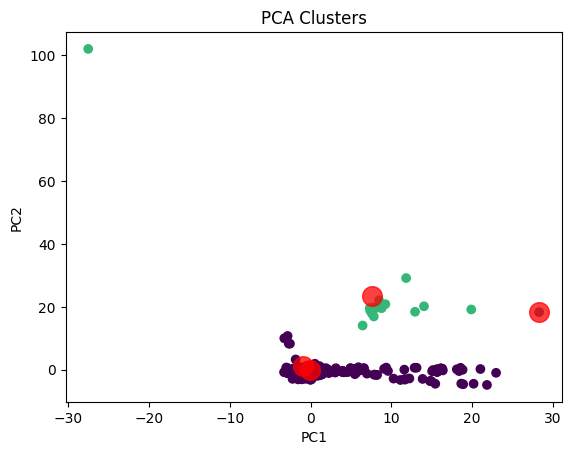

In [ ]:
principalDF=make_cluster(principalDF)

In [ ]:
#print unique values of well from train, and make a dictionary
well_dict=train['Well'].unique()
print(well_dict)

['BS3' 'MHN-5' 'YKN-24HZ' 'MHN-8' 'MHN-6' 'MHN-13' 'BC1' 'MHN-2' 'MHNW-1'
 'YN-7SI' 'YKN-23HZ' 'YN-8SI' 'YCA-7HZ' 'YCA-8HZ' 'YN-17HZ' 'YN-11SI'
 'YN-12SI' 'YCB-9SI' 'MHNW-2' 'YCA-11HZ' 'MHN-7' 'BC2' 'MHN-3' 'MHN-4'
 'YCA-10HZ' 'MHNW-3' 'YW-1' 'MHN-9' 'YCB-8HZ' 'YCB-2HZ' 'YCB-1HZ'
 'YN-10SI' 'YN-16HZ' 'YW-8SI' 'YO-4A']


In [ ]:
#plot line plot with x as date y as Freq of each unique well one by one and set the figsize
def plot_freq(train,well_dict):
    for well in well_dict:
        df=train[train['Well']==well]
        plt.figure(figsize=(15,20))
        plt.plot(df['Date'],df['Freq'])
        plt.xlabel('Date')
        plt.ylabel('Freq')
        plt.title('Well '+well)
        plt.show()

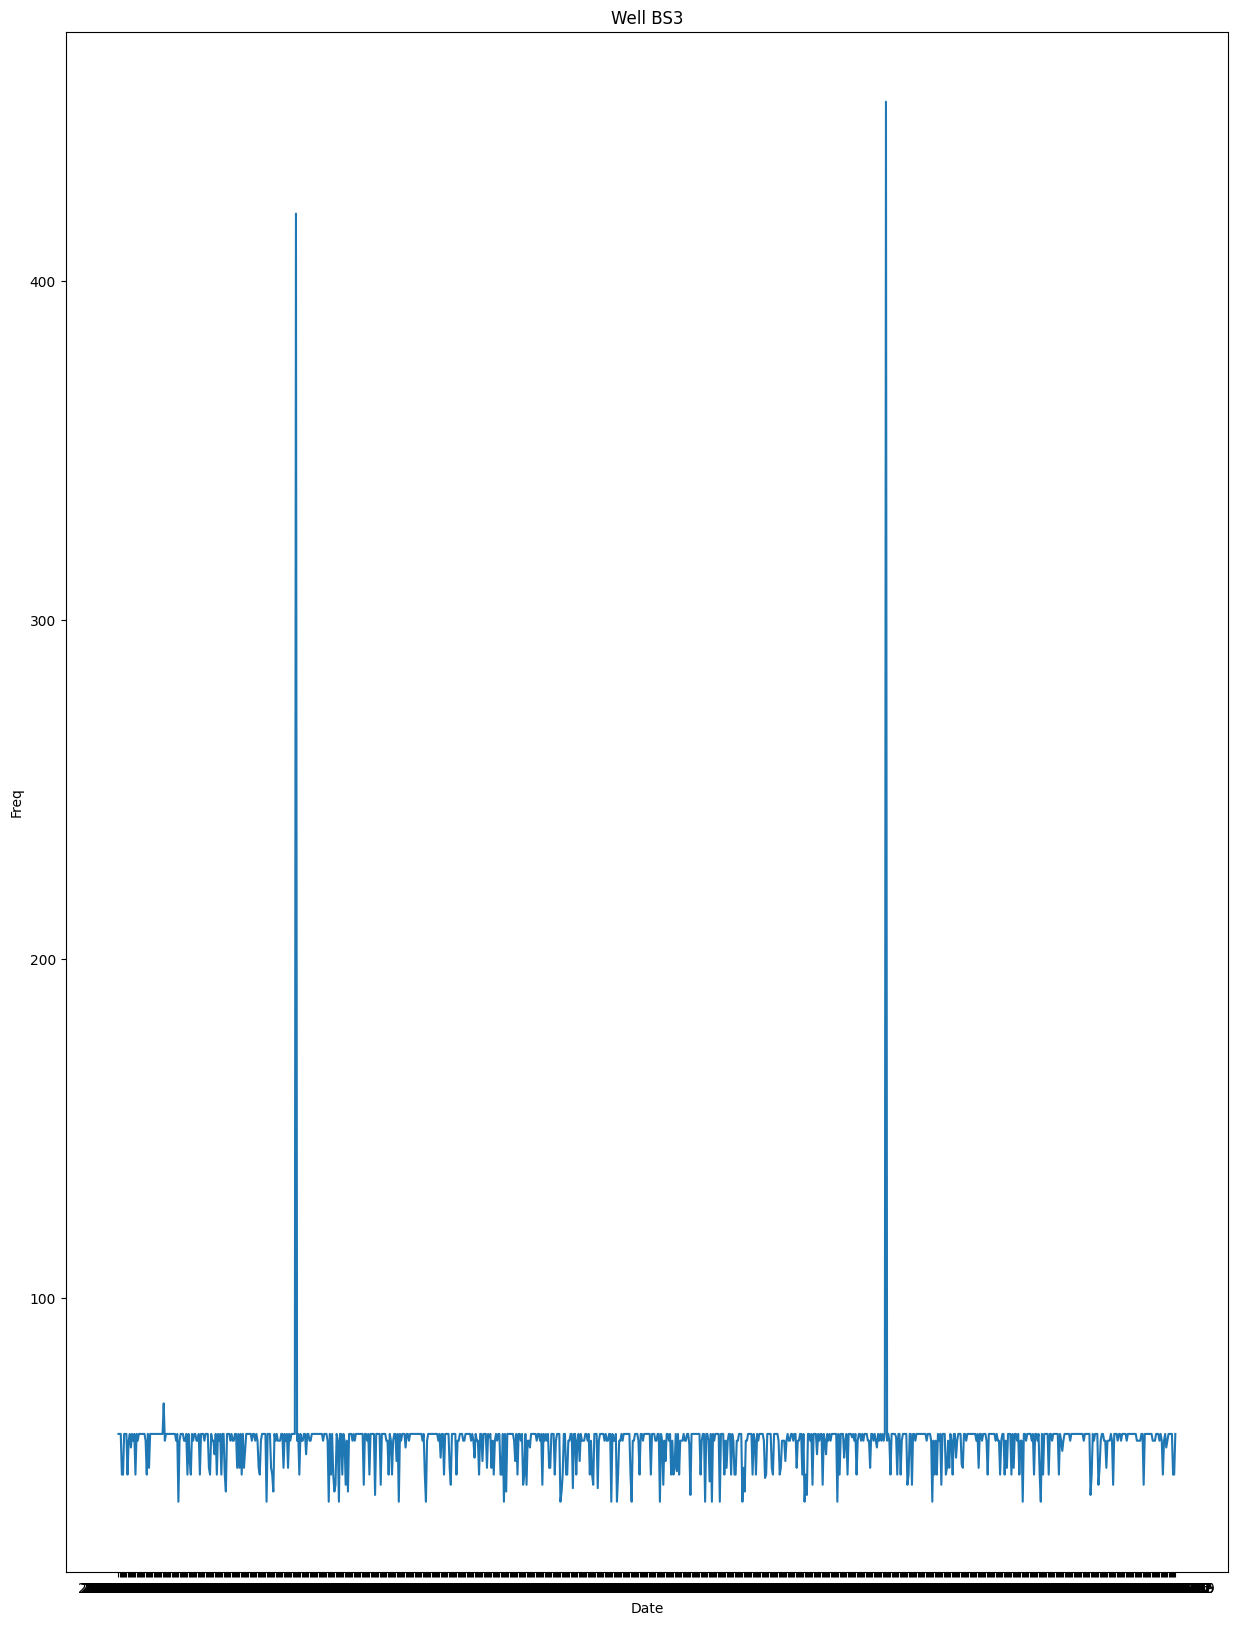

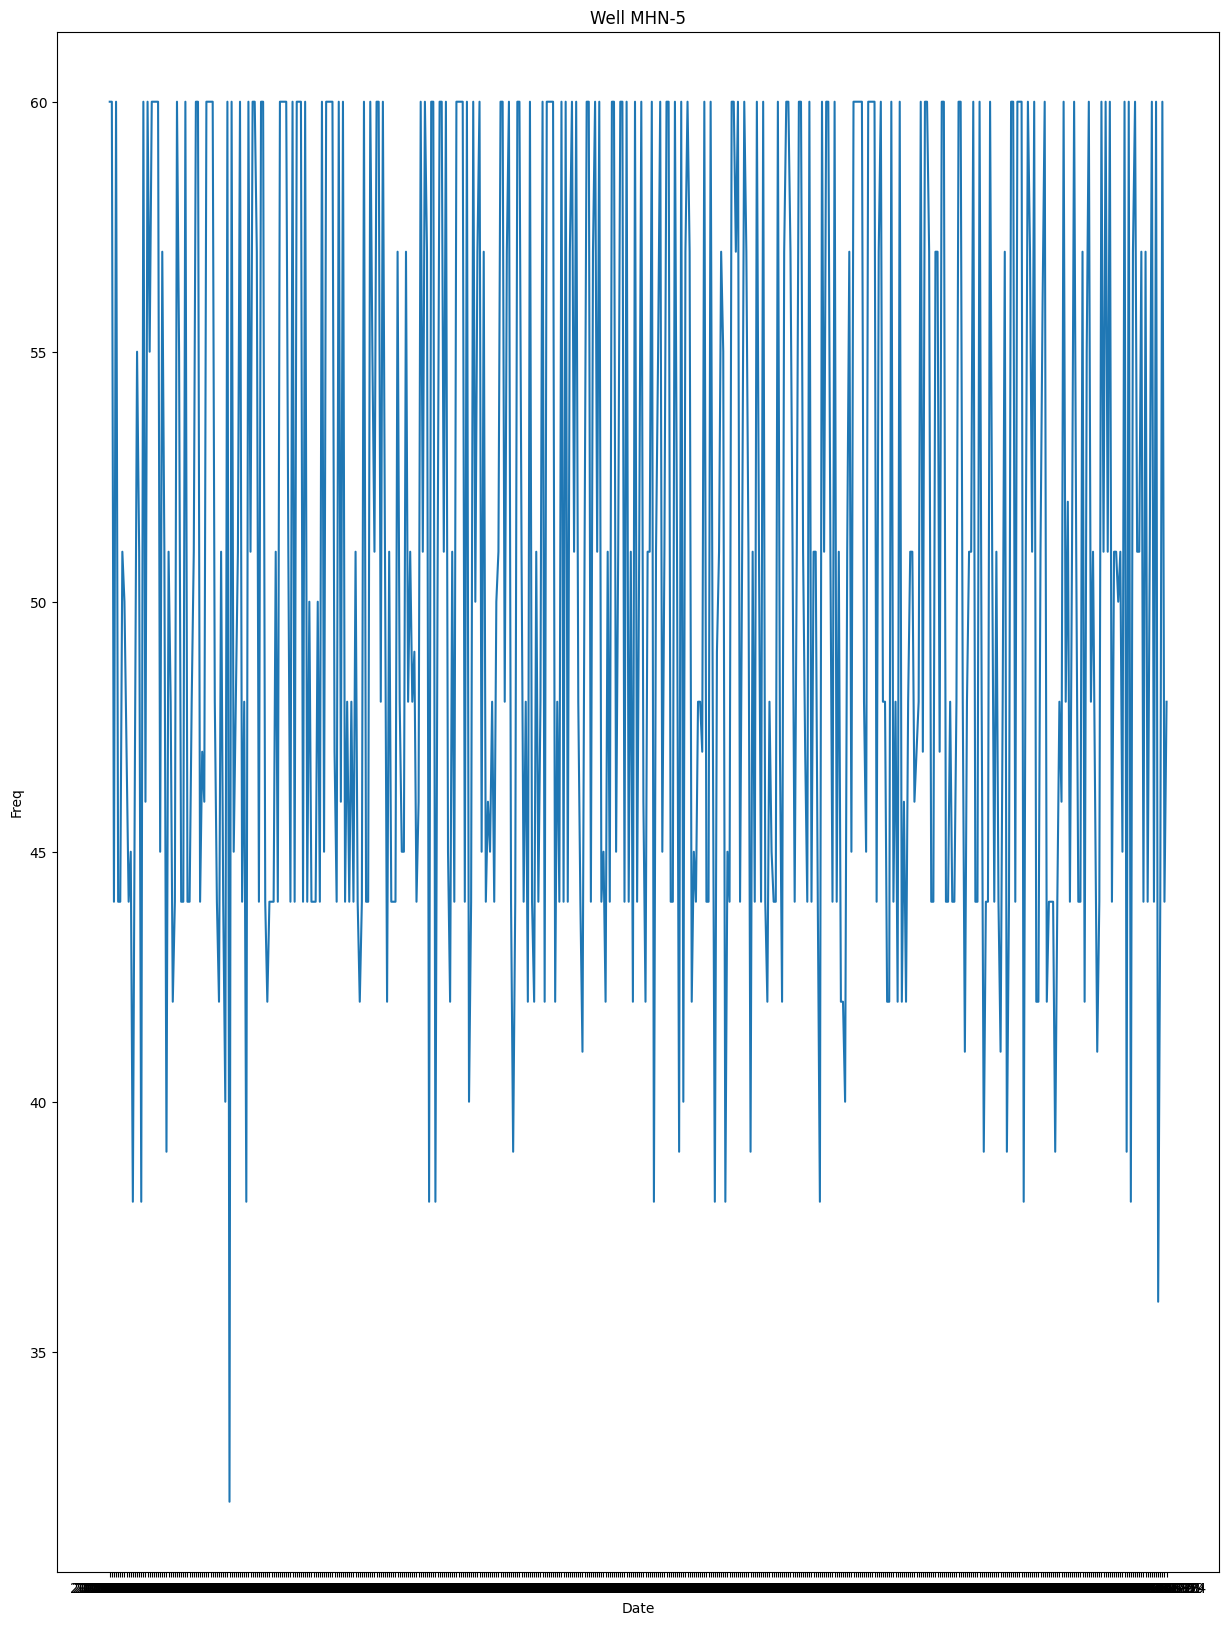

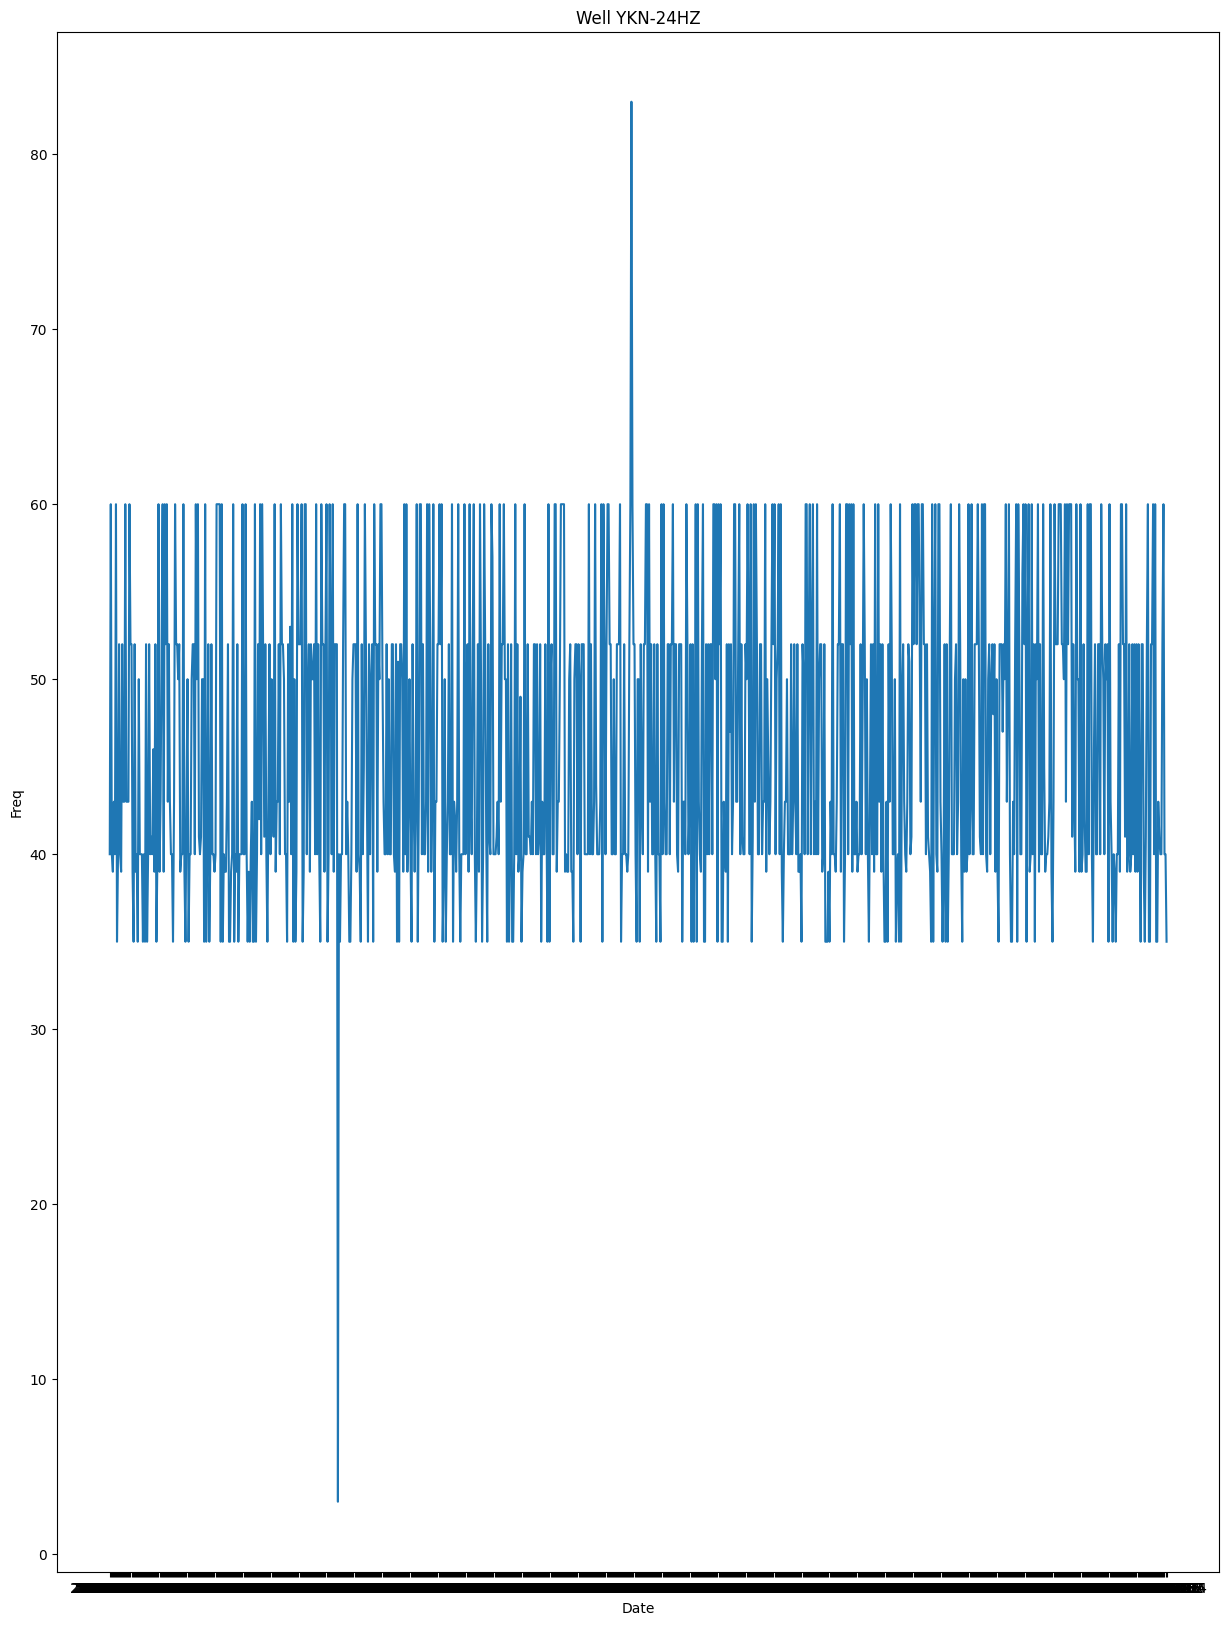

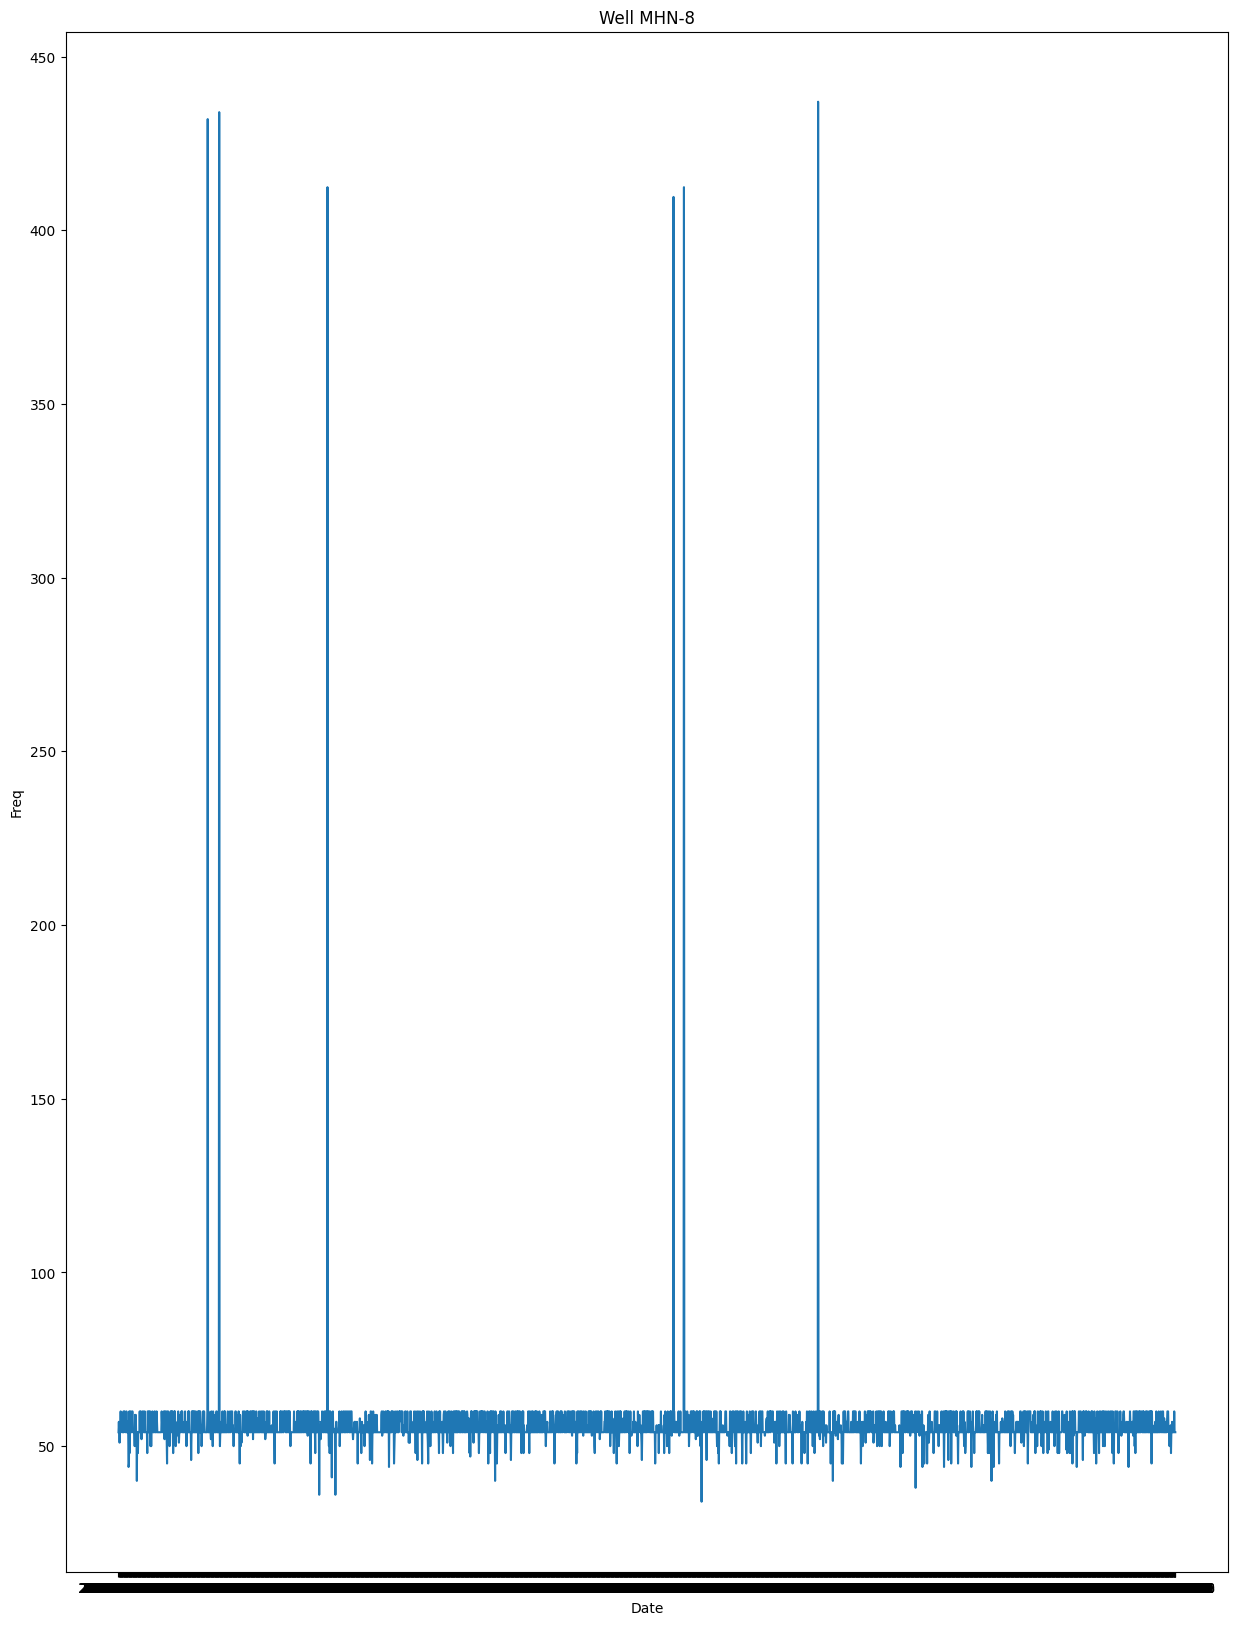

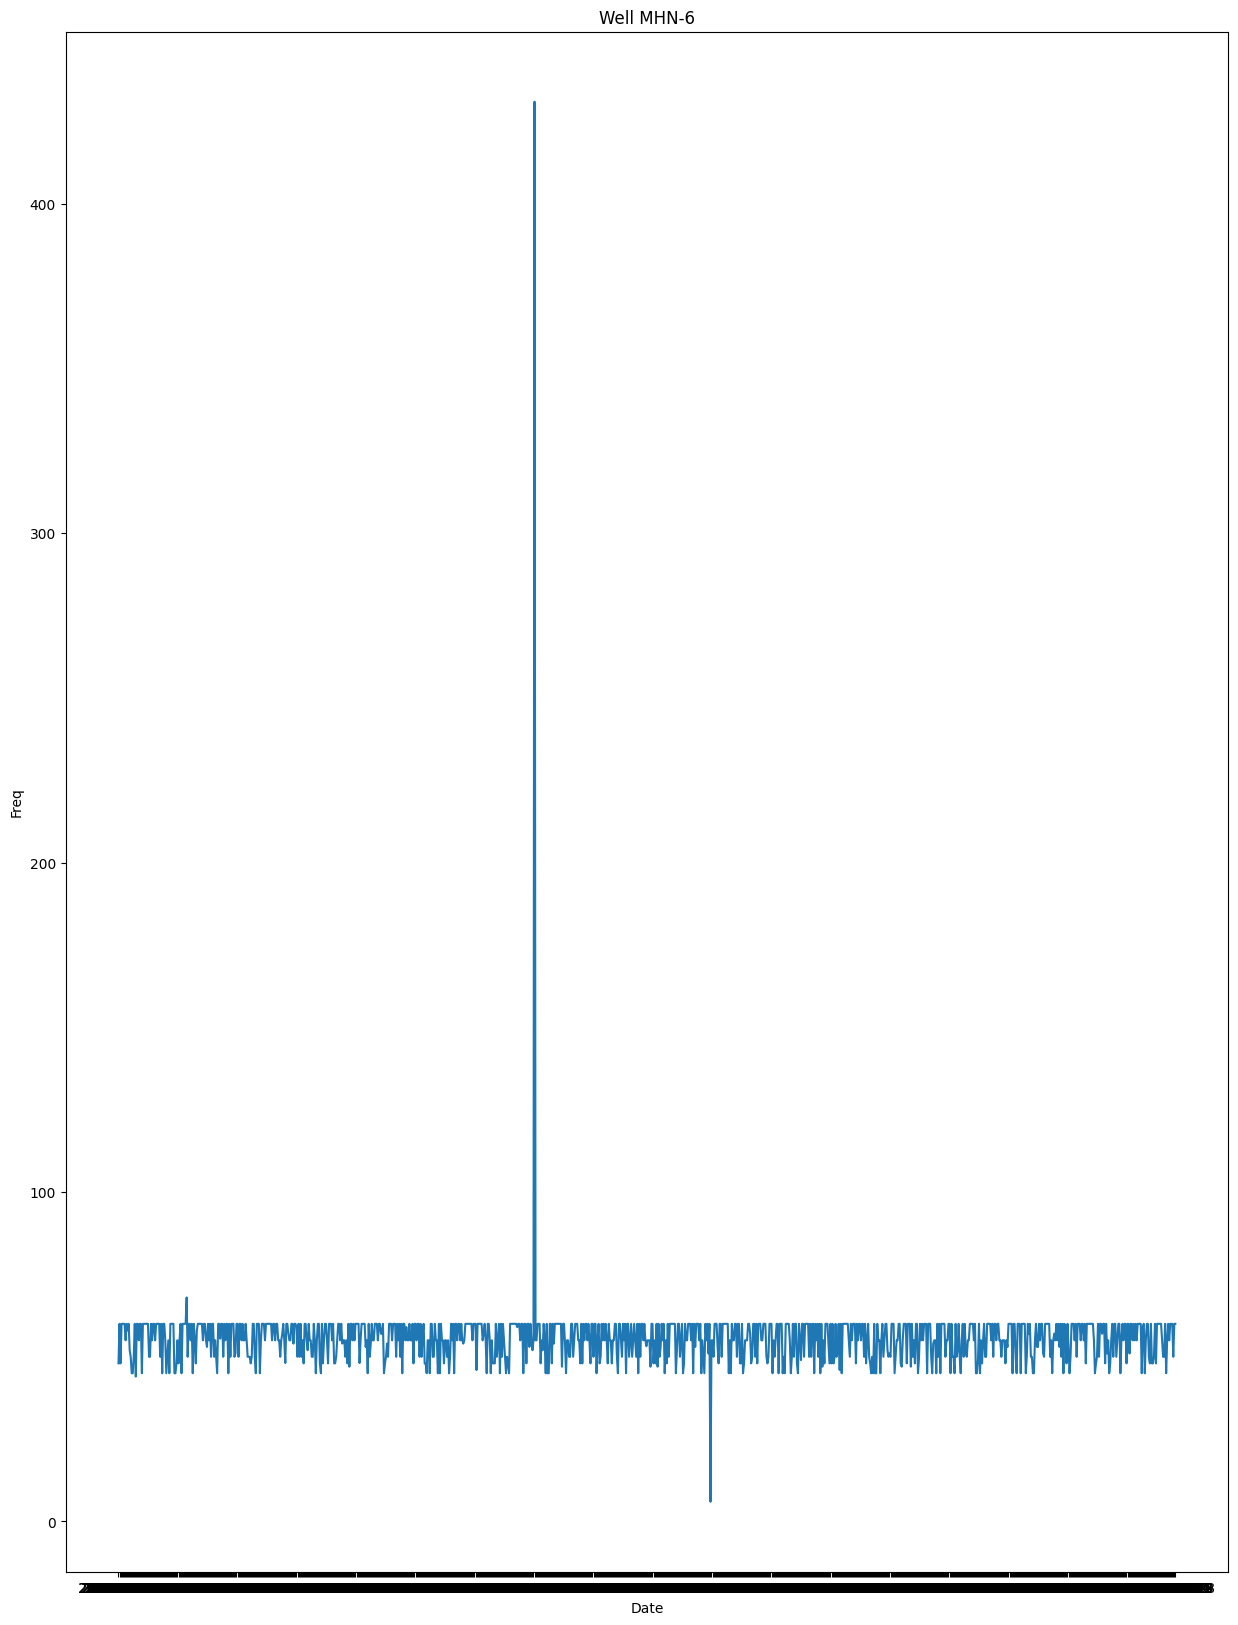

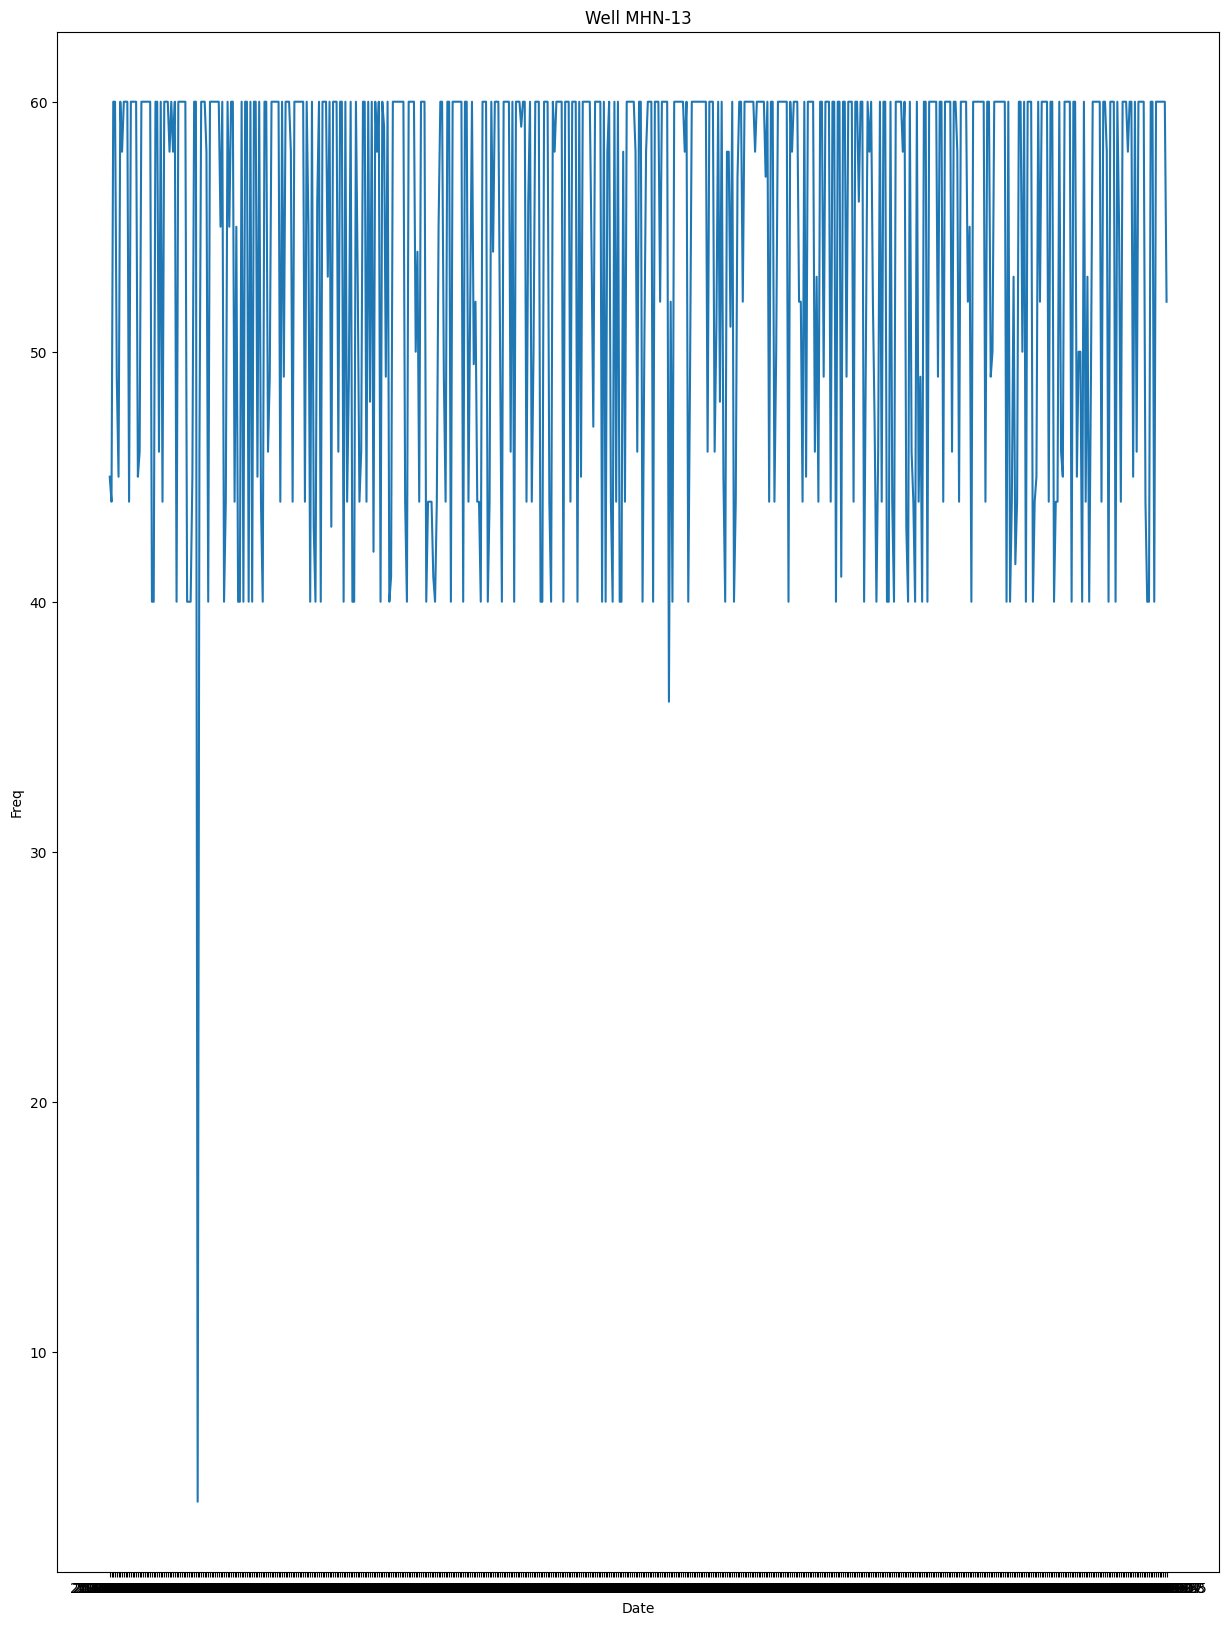

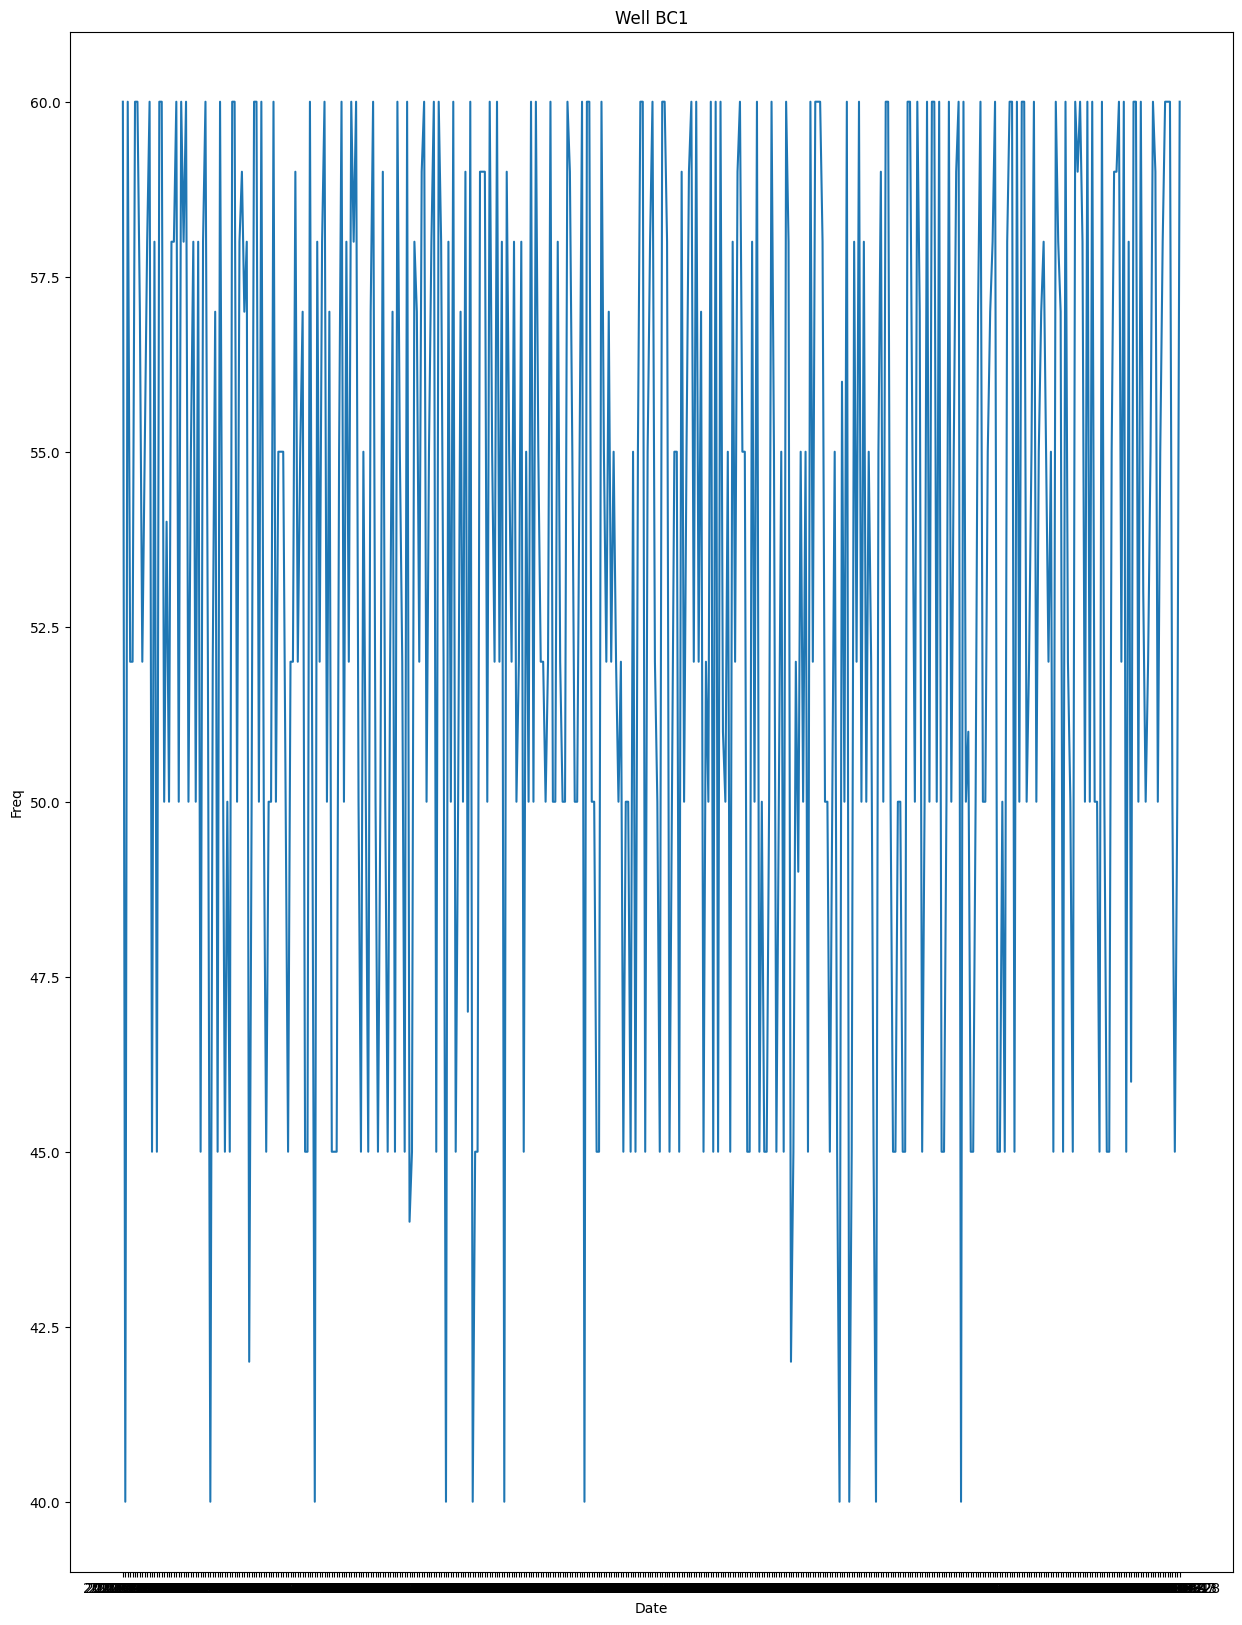

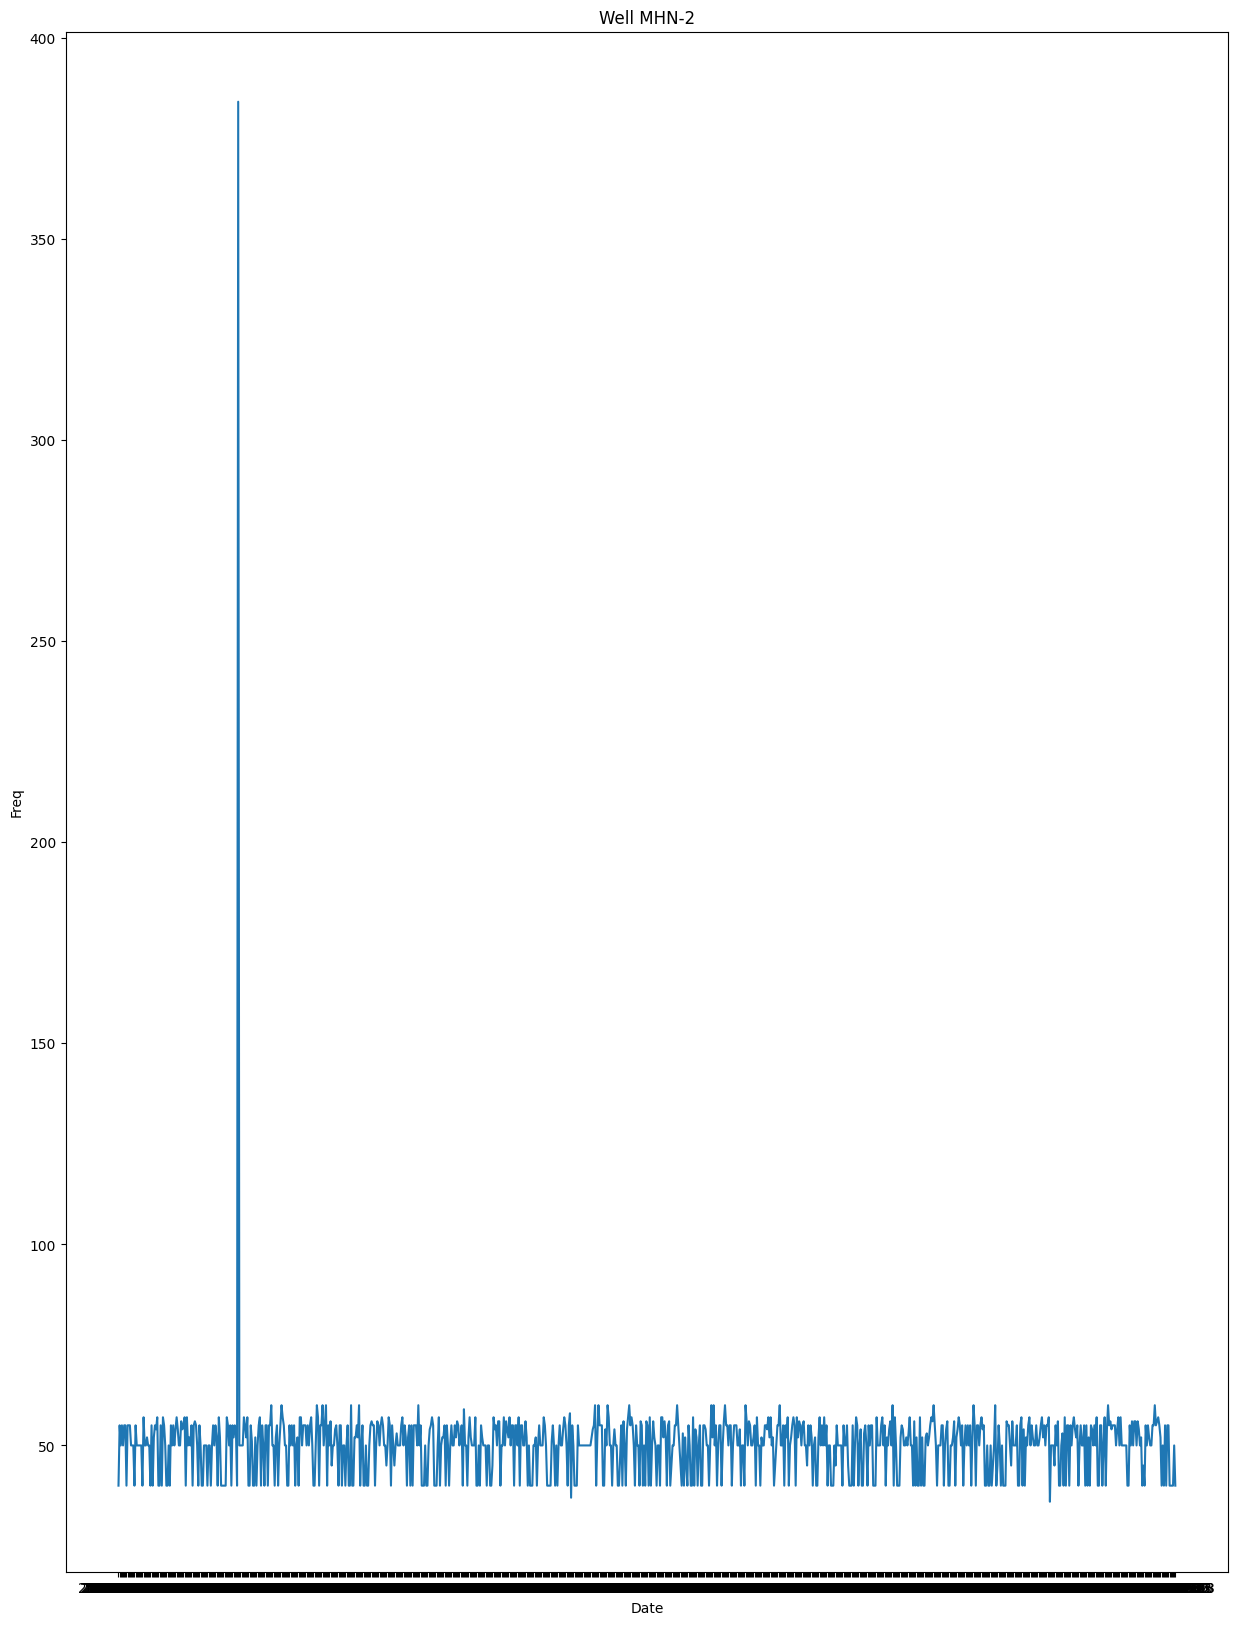

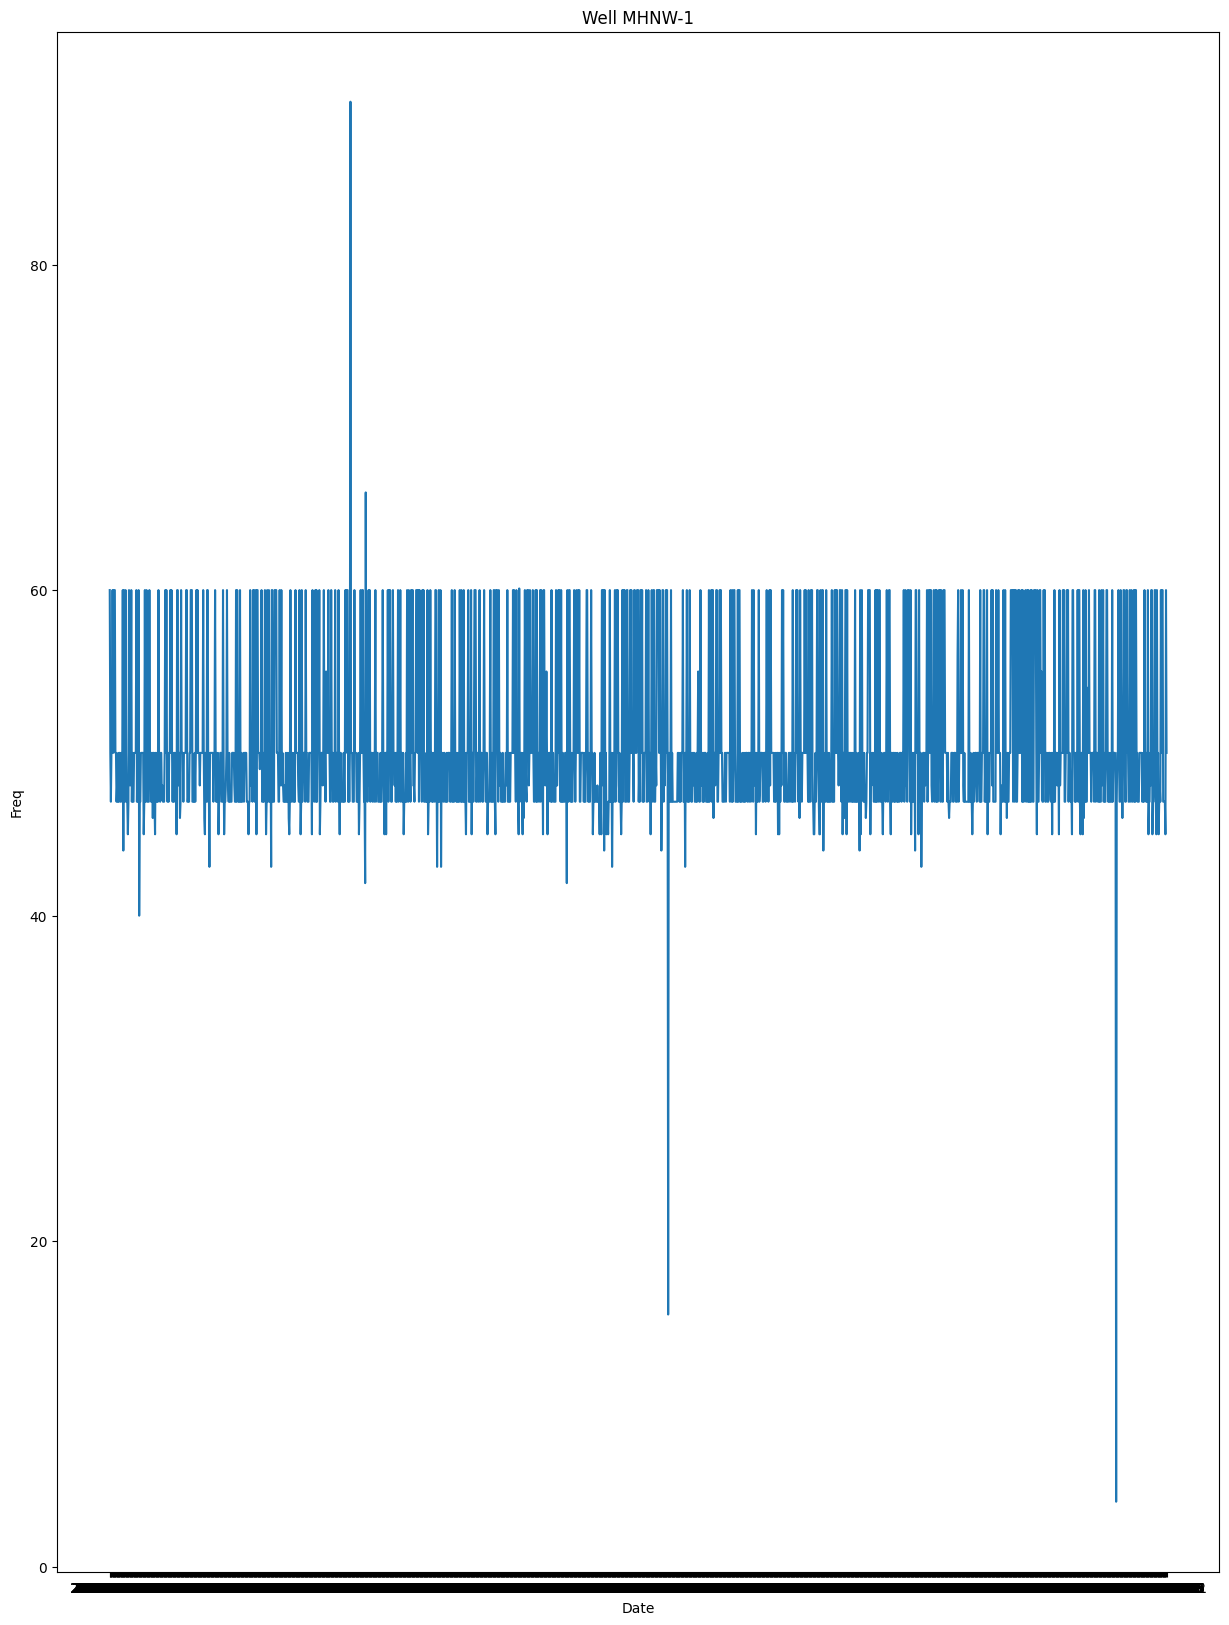

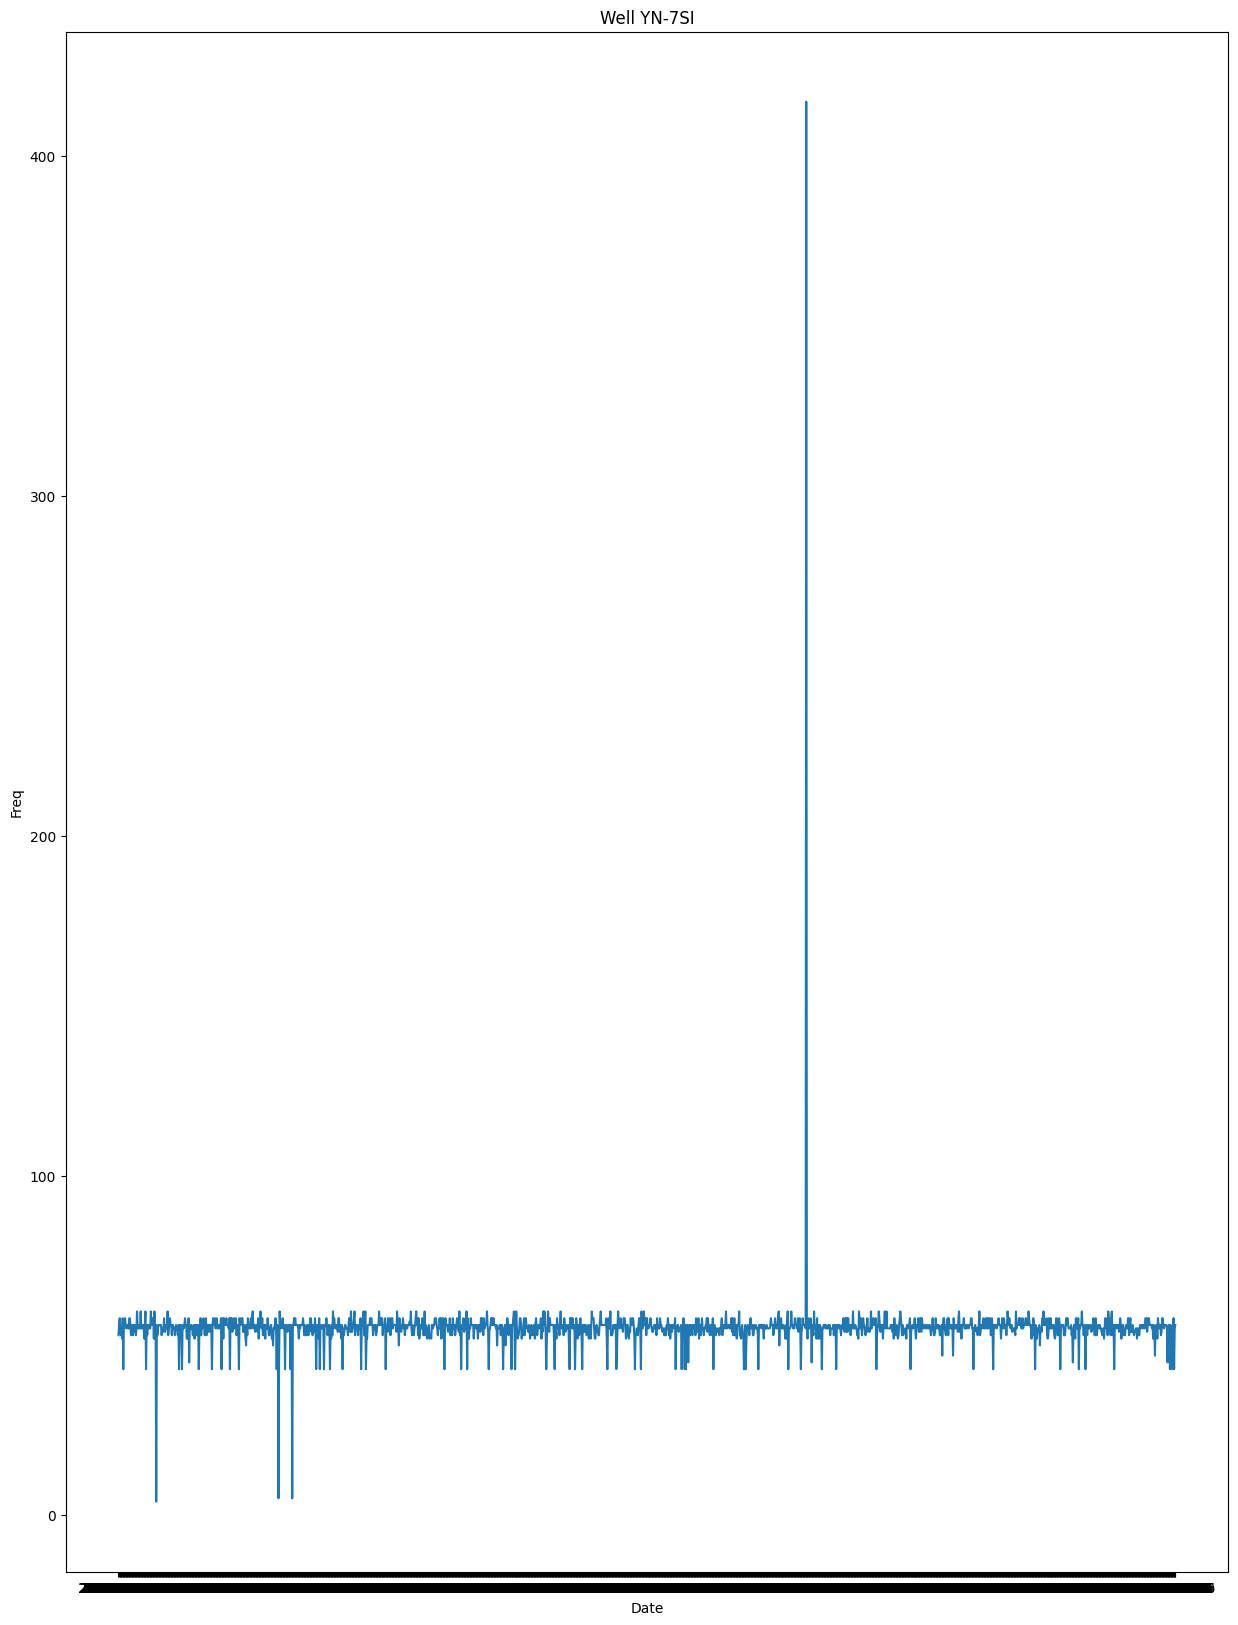

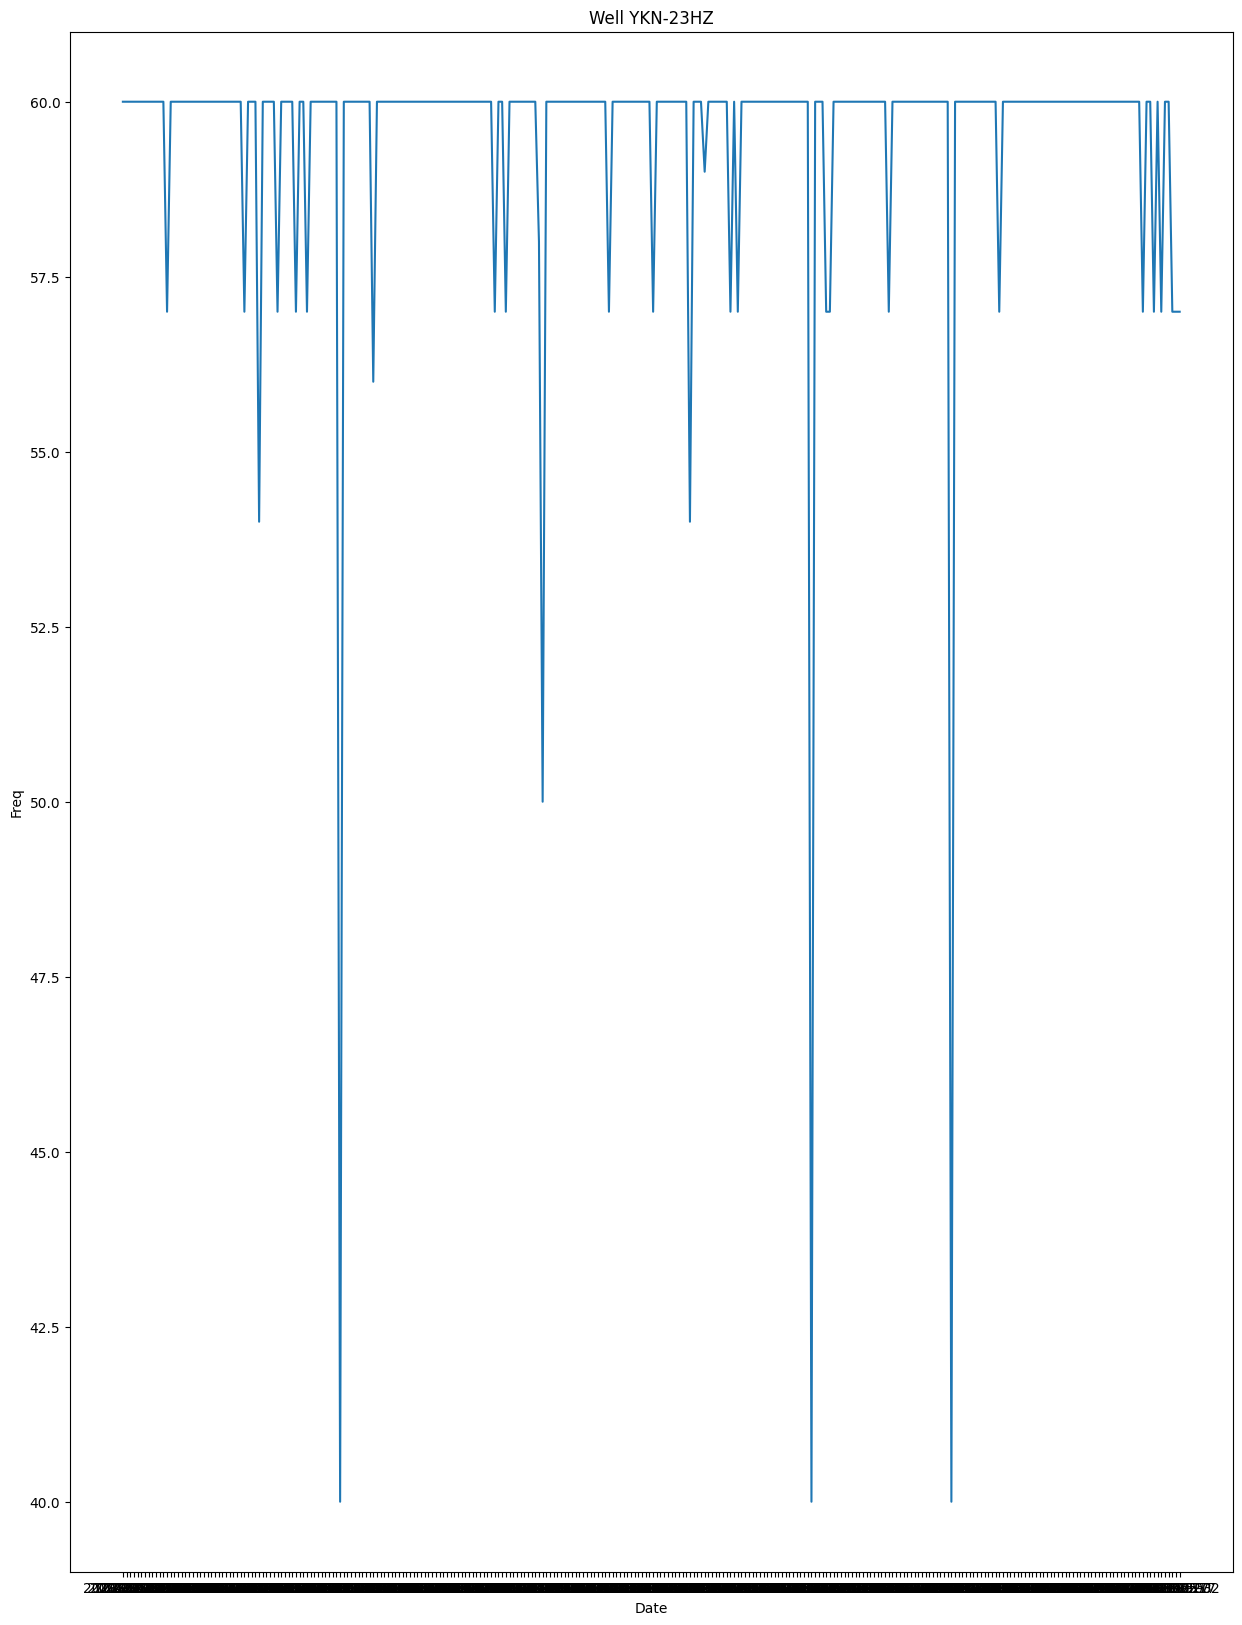

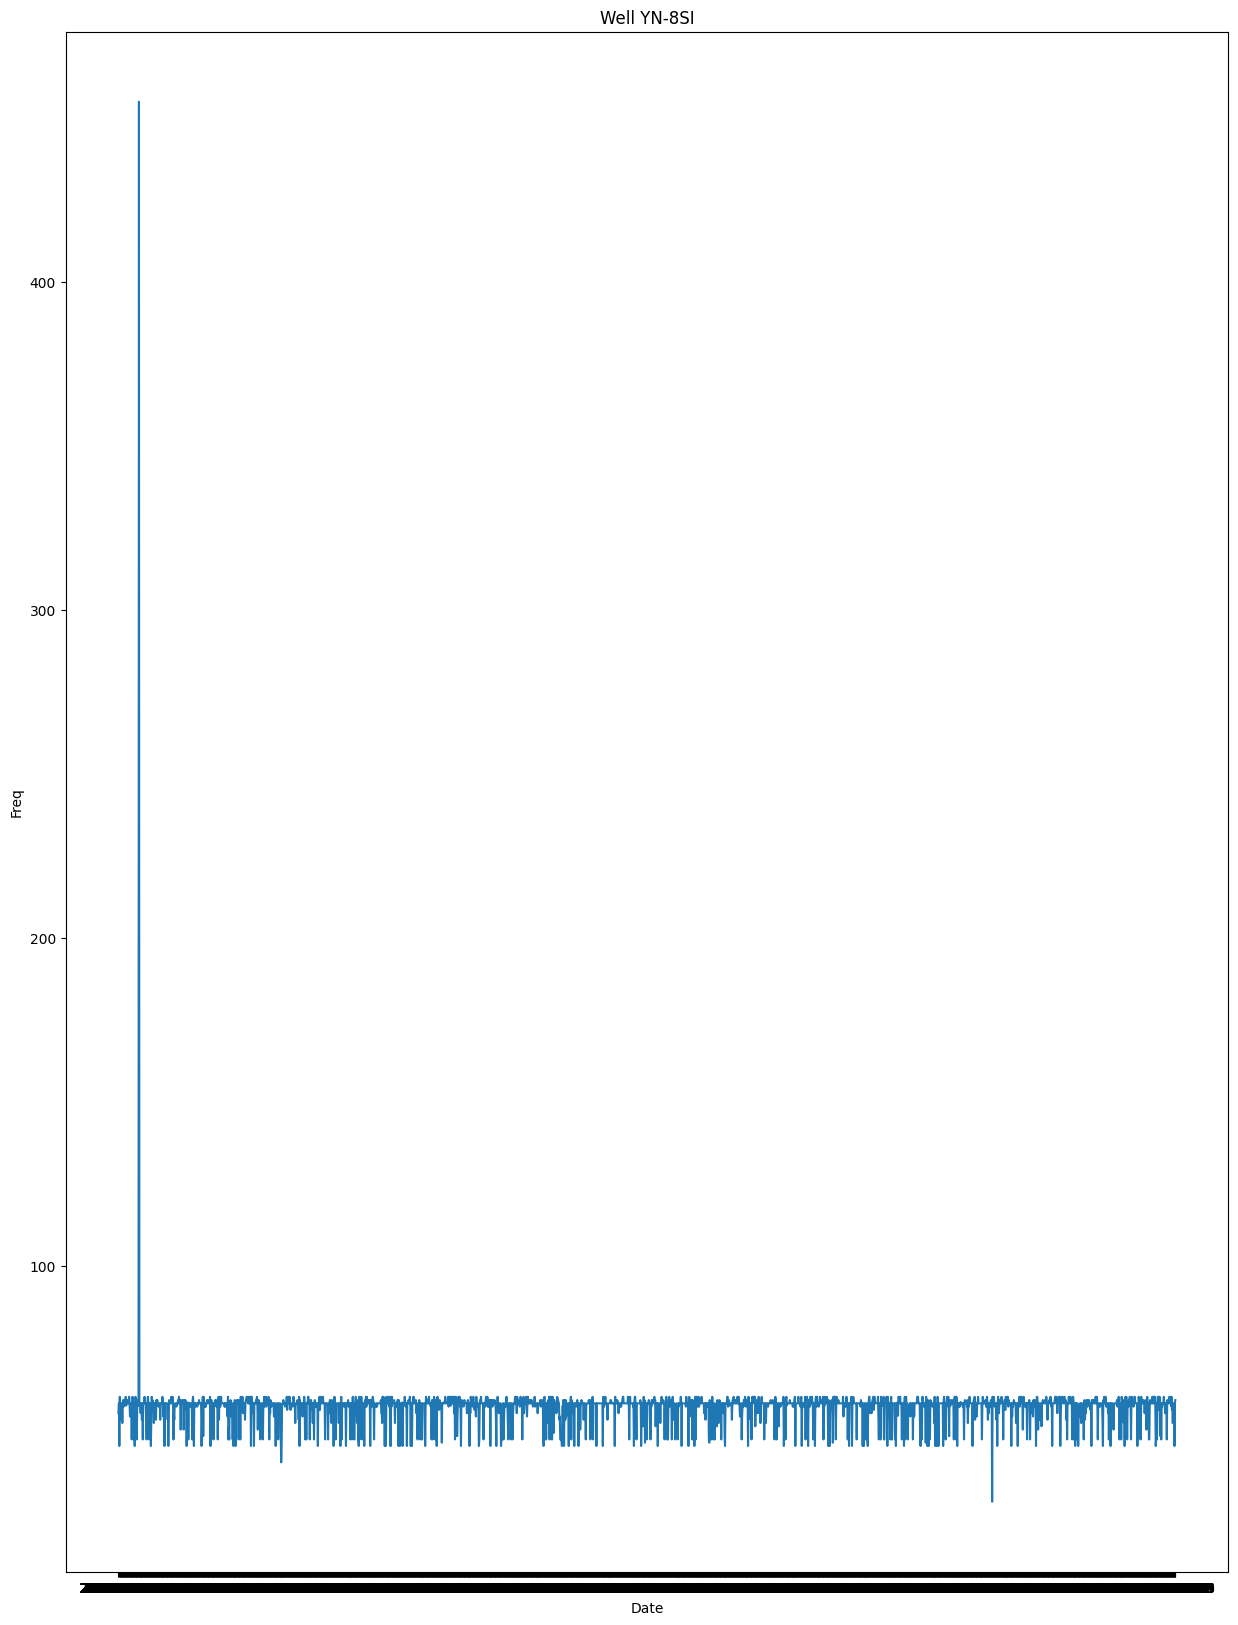

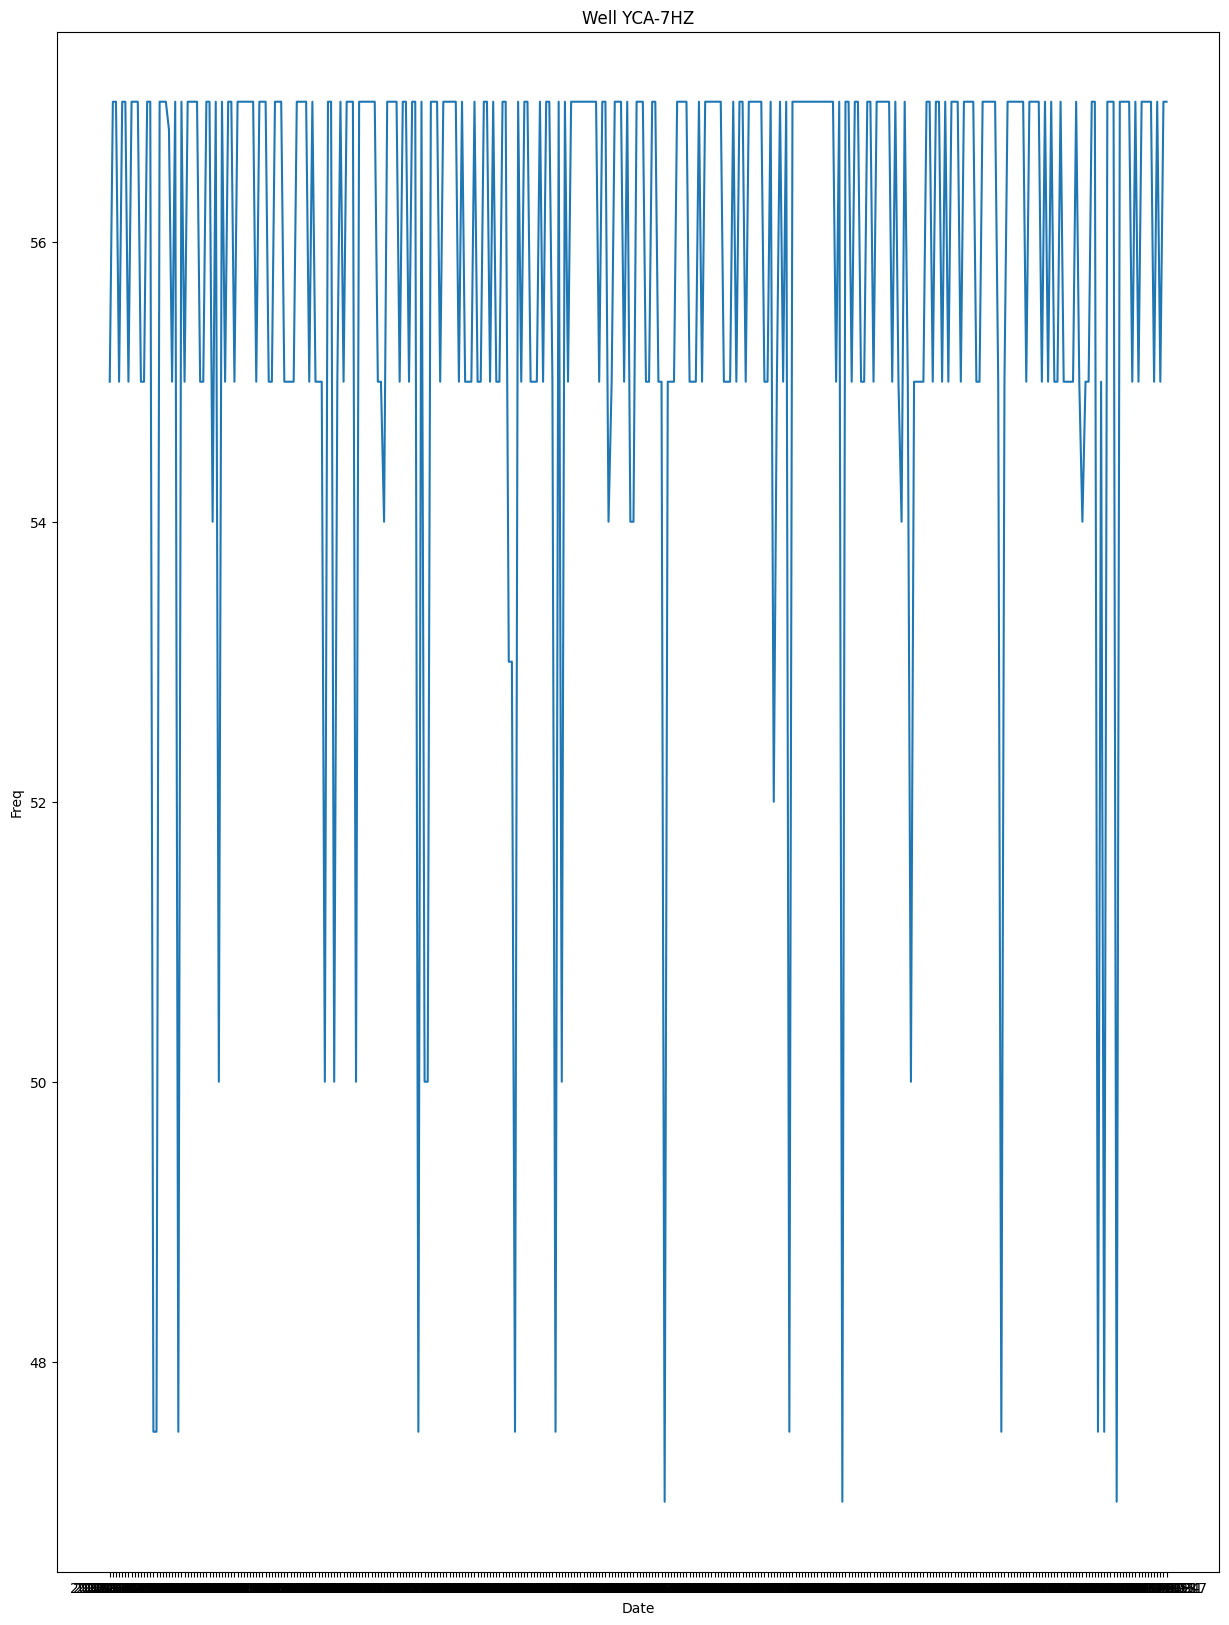

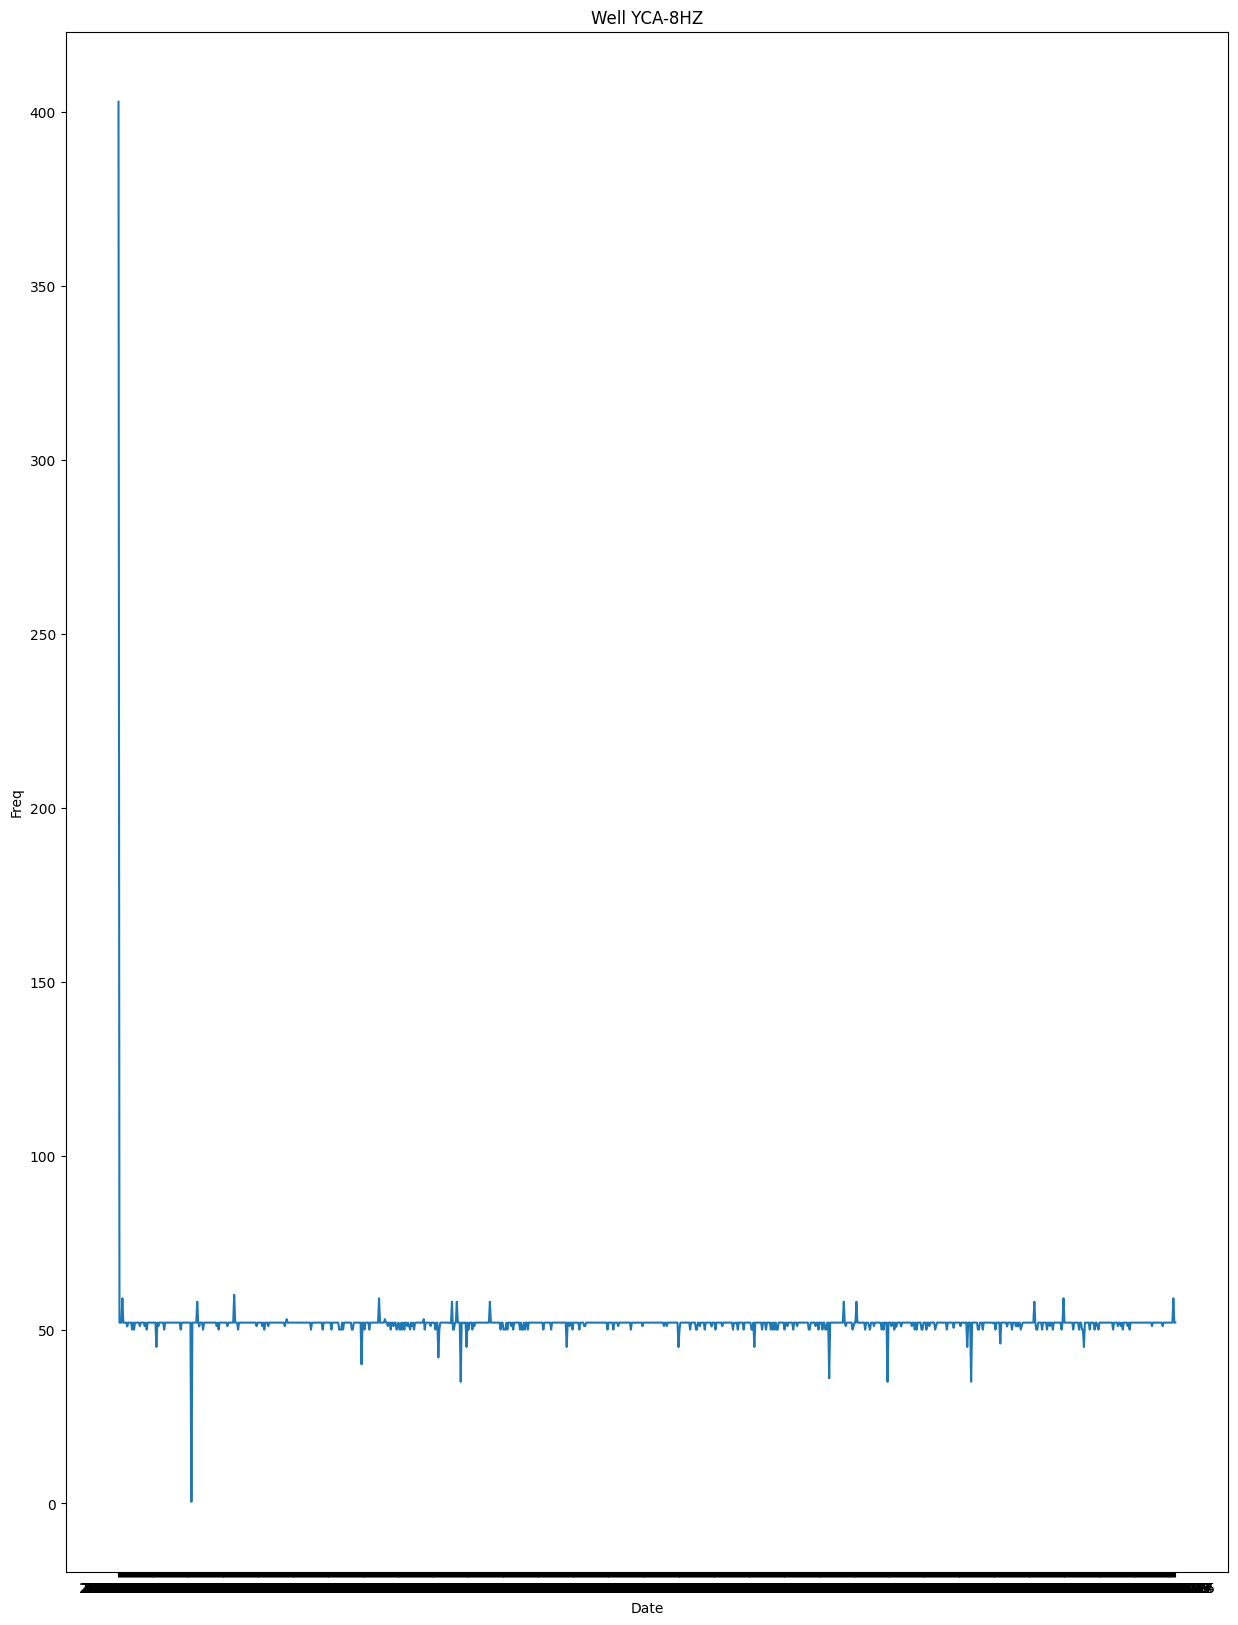

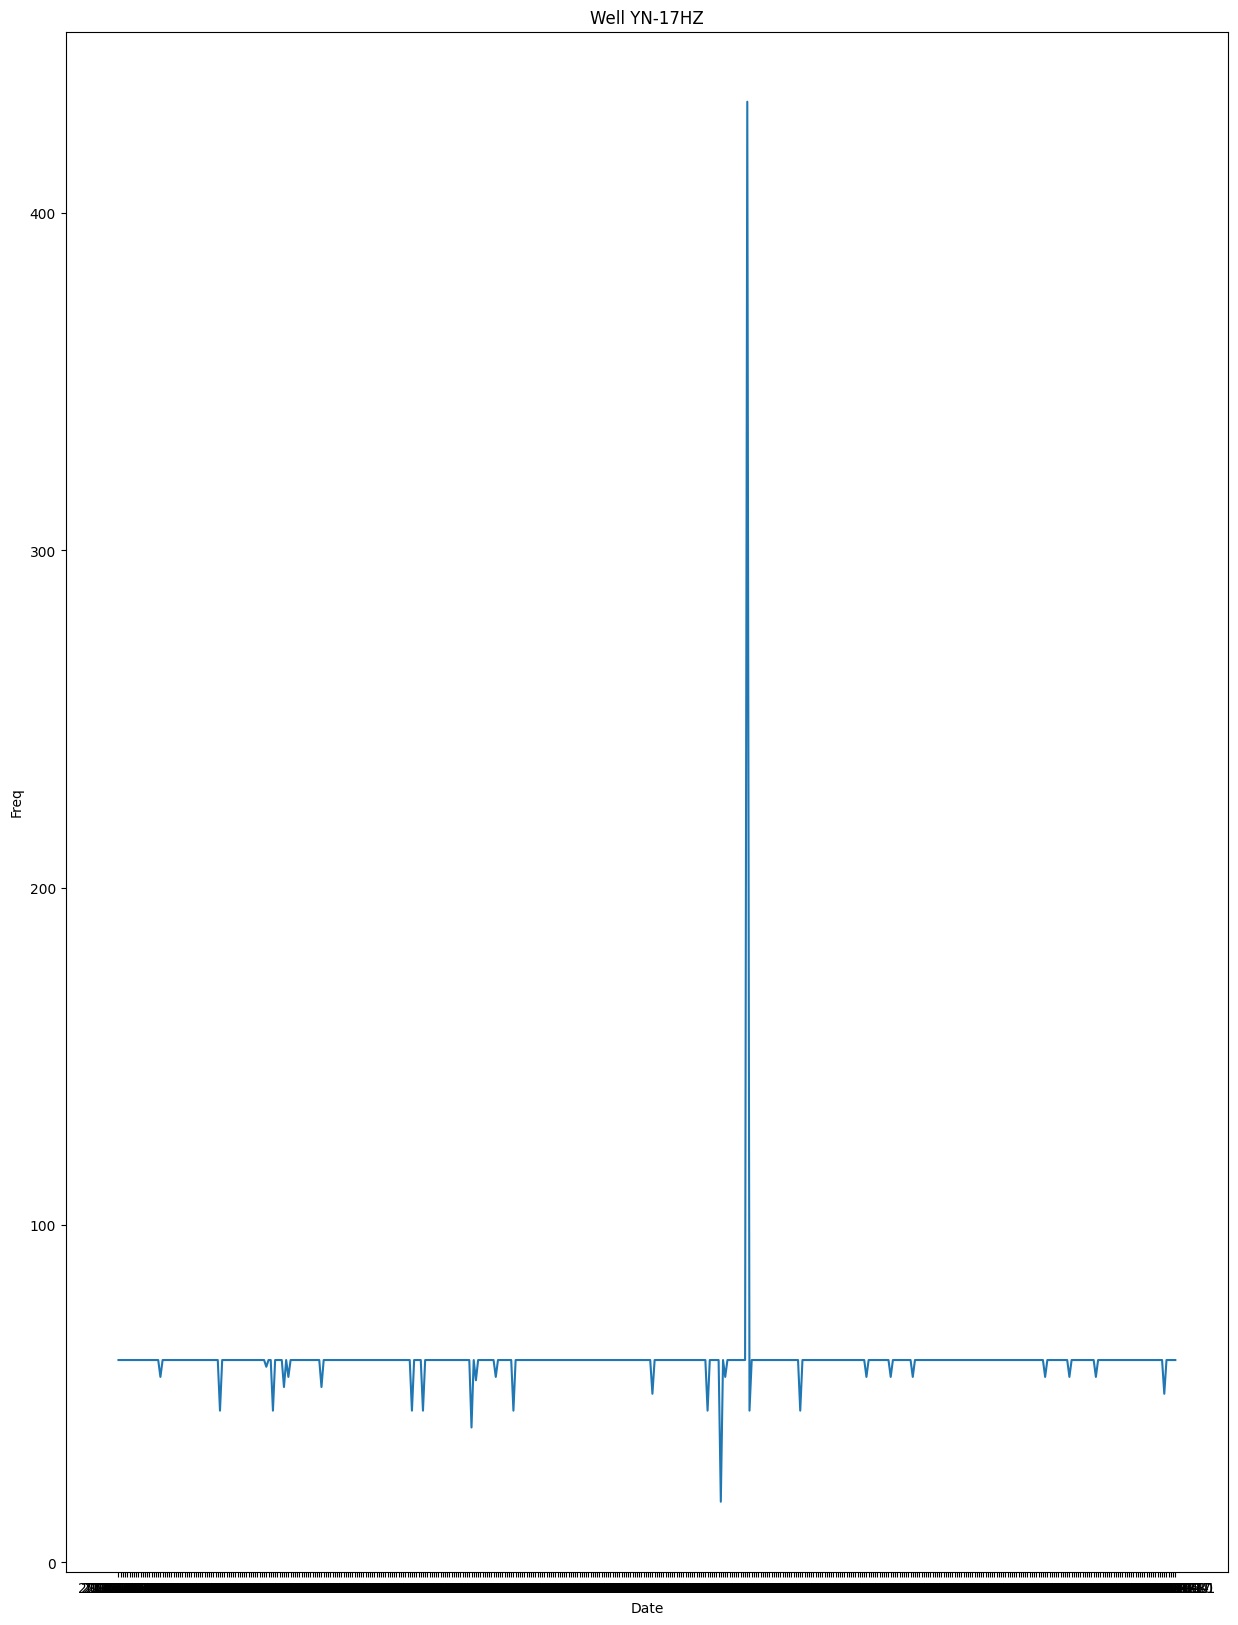

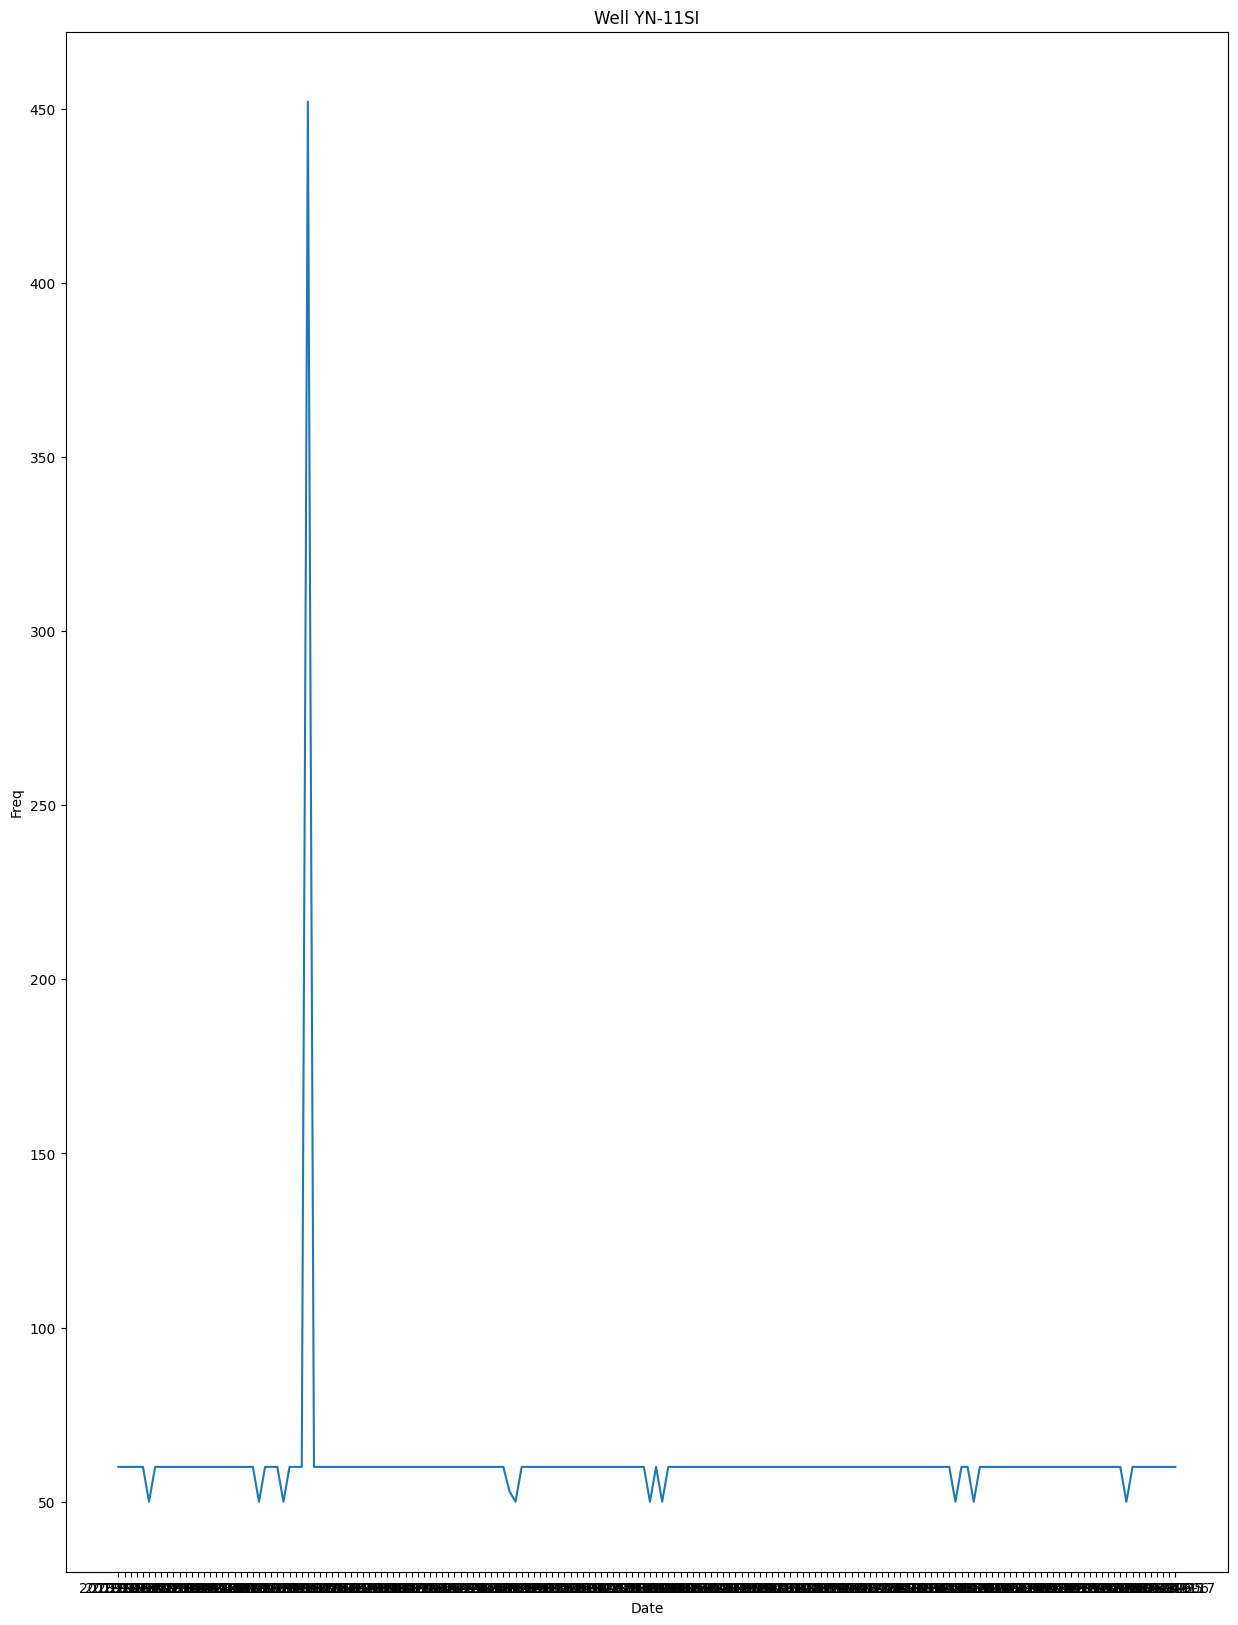

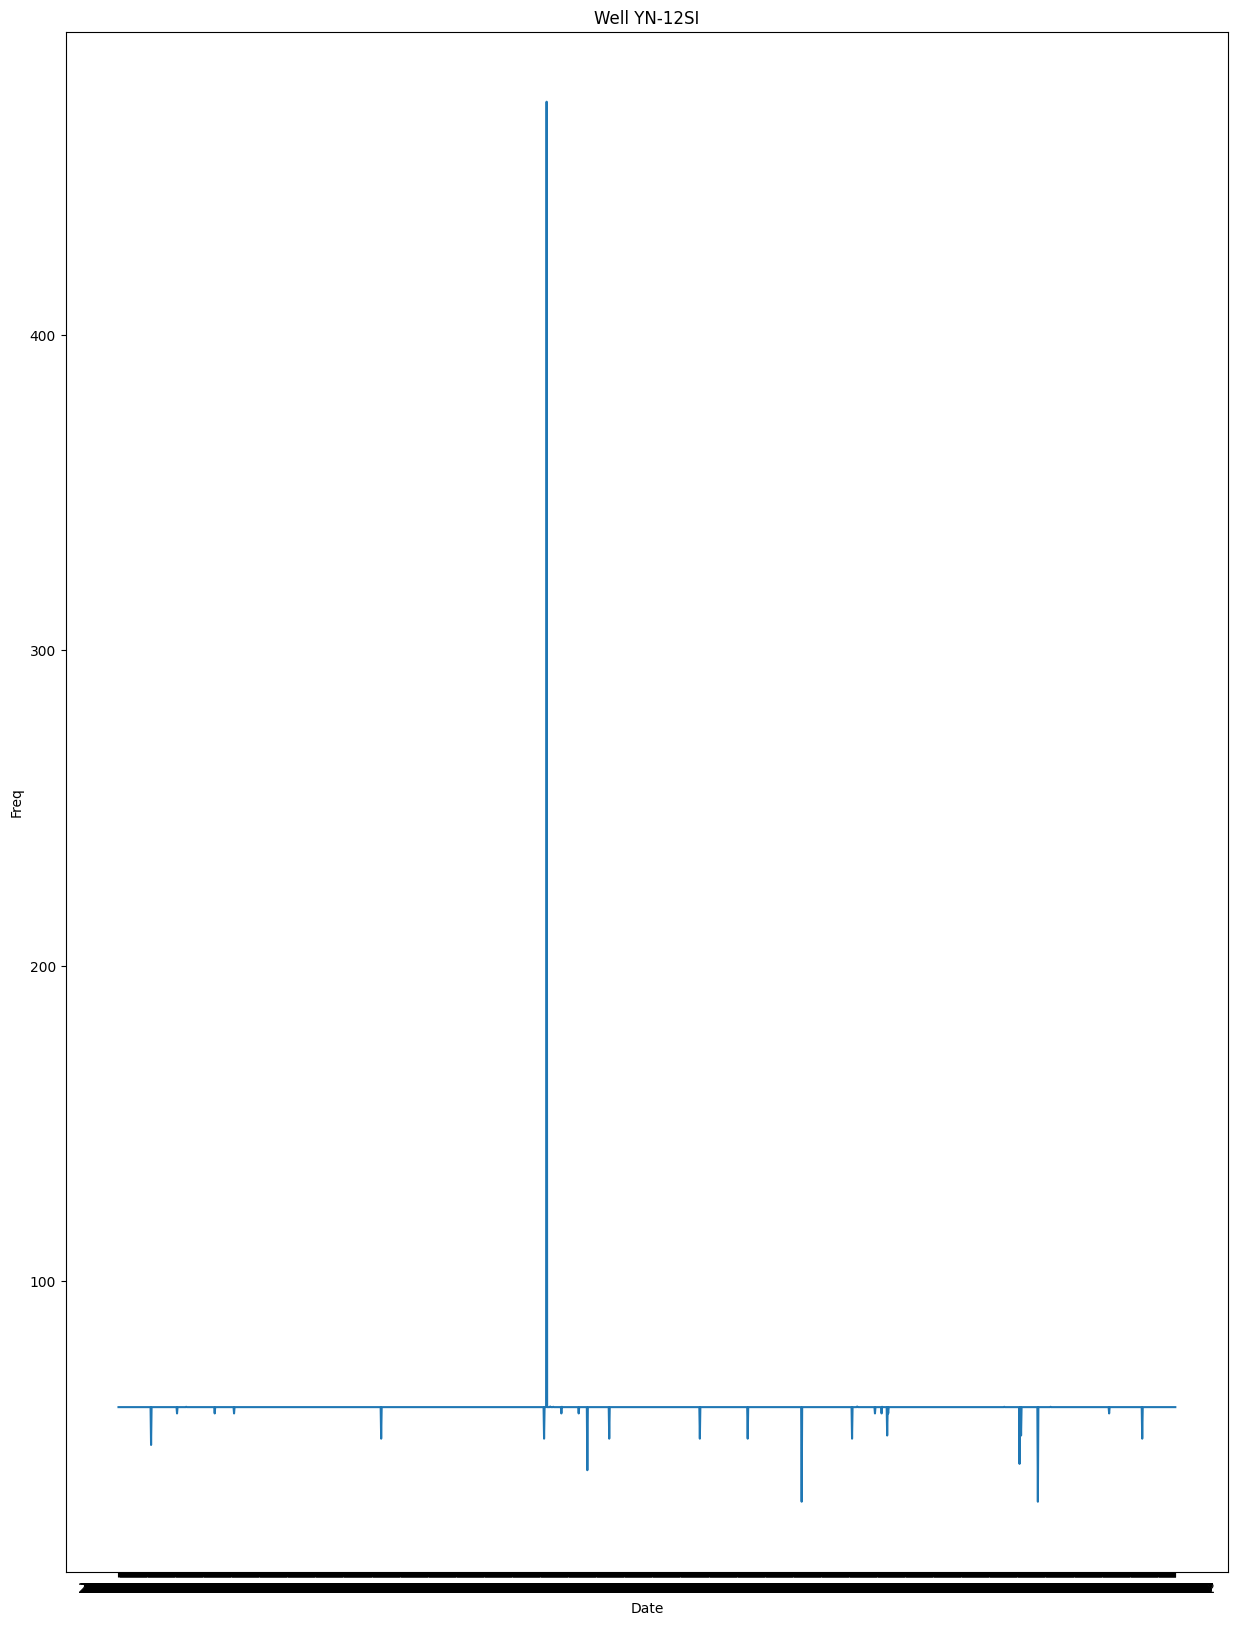

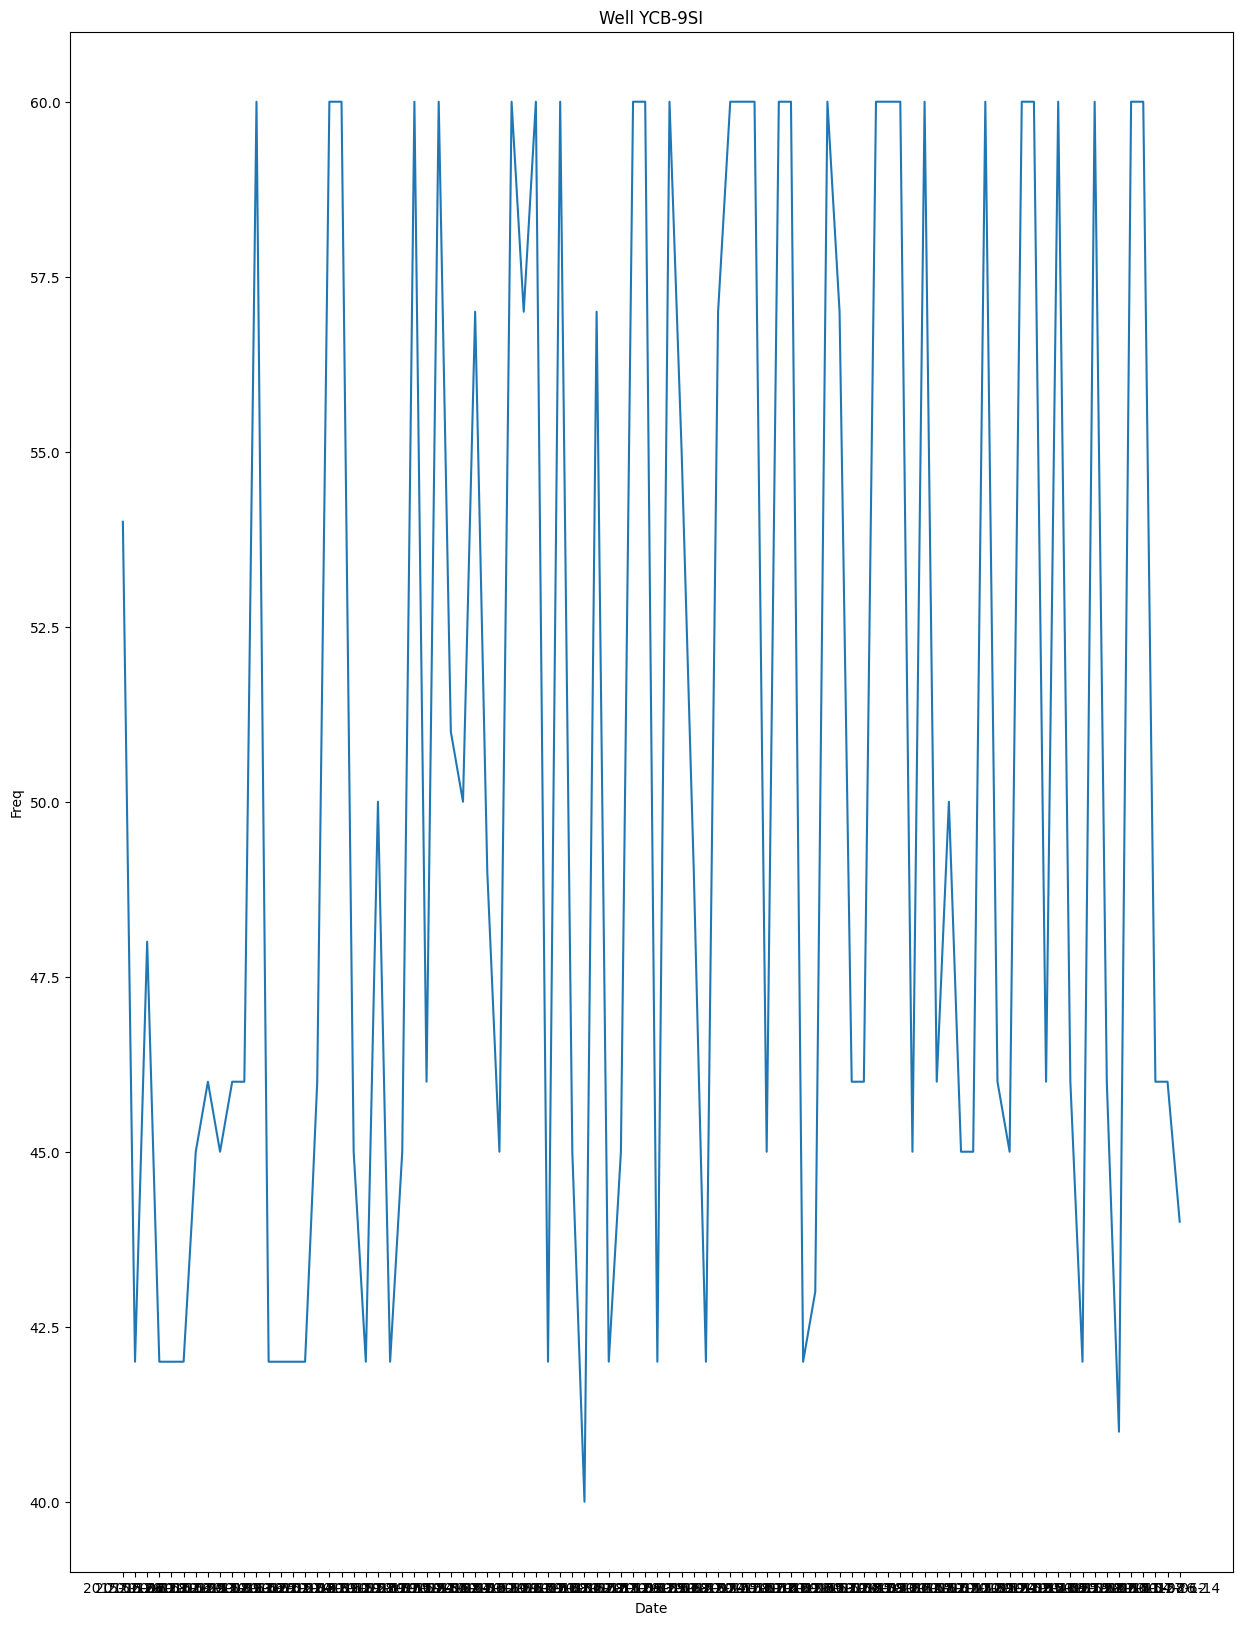

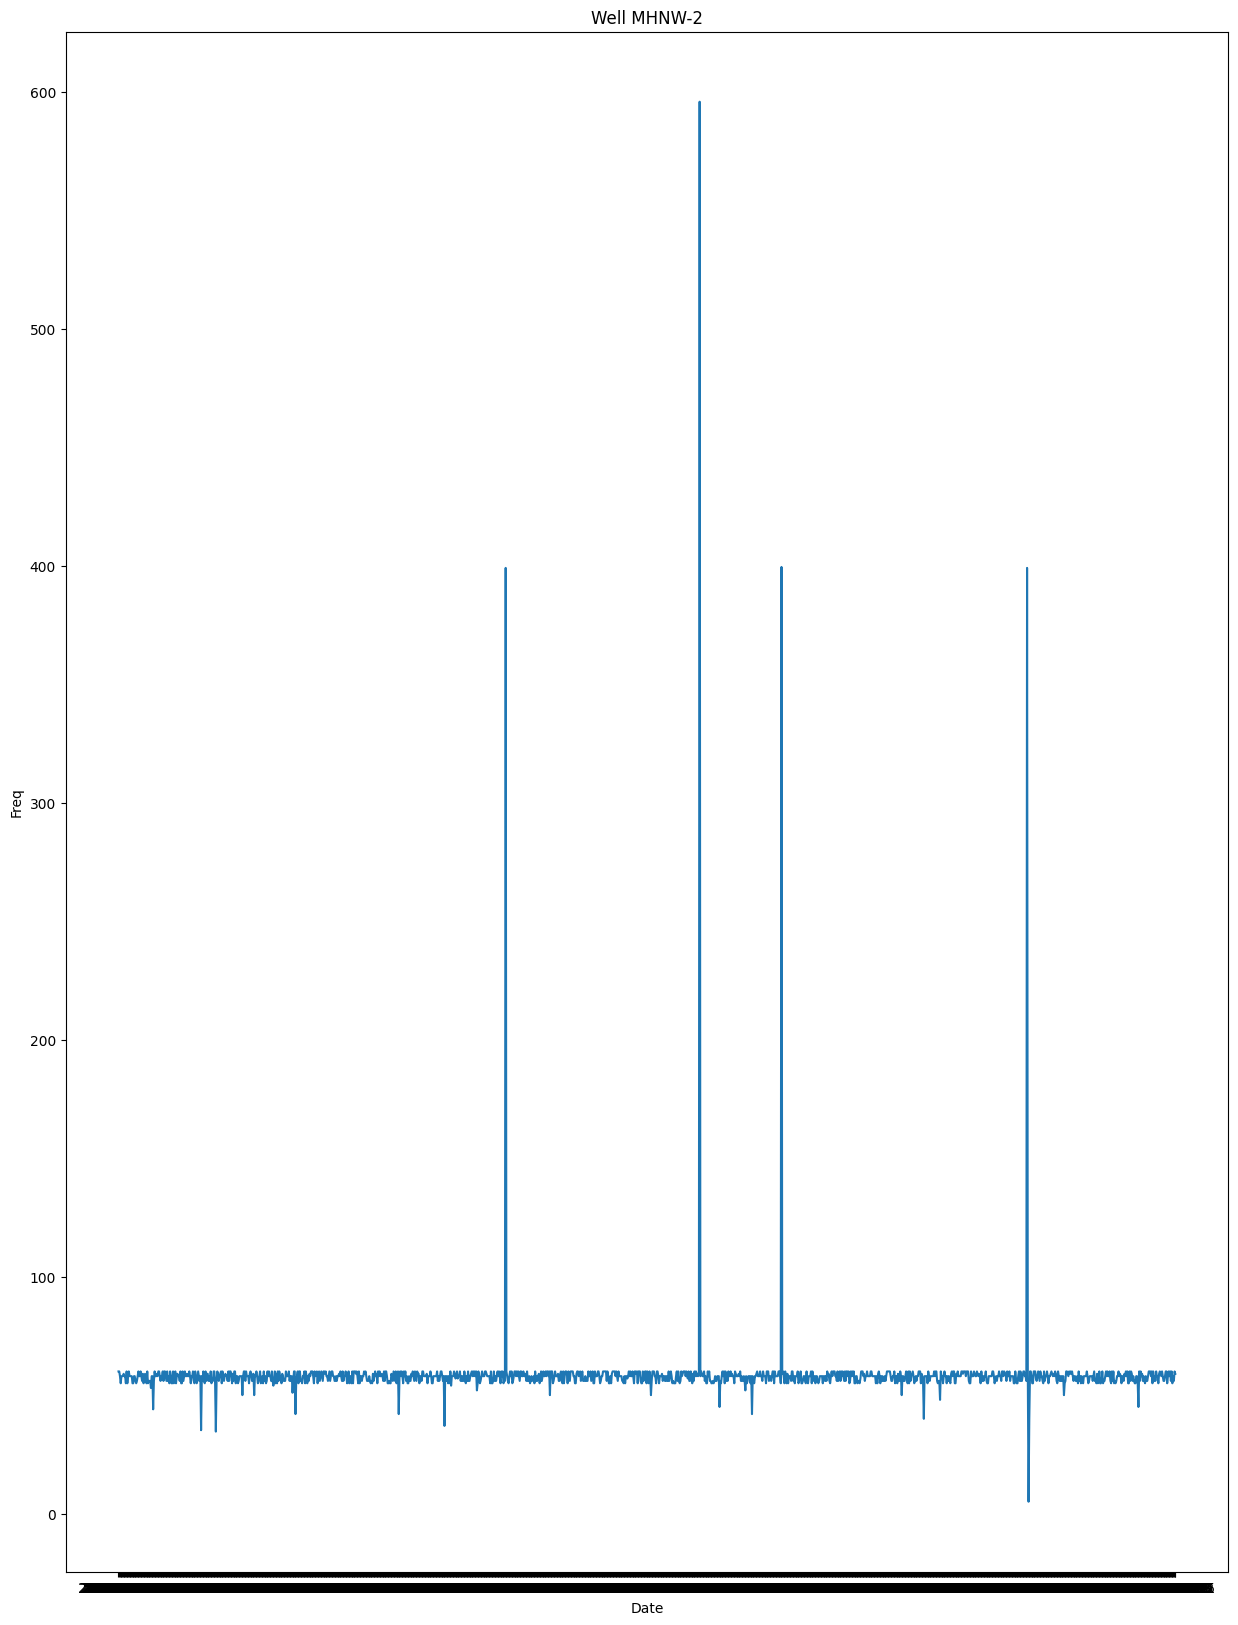

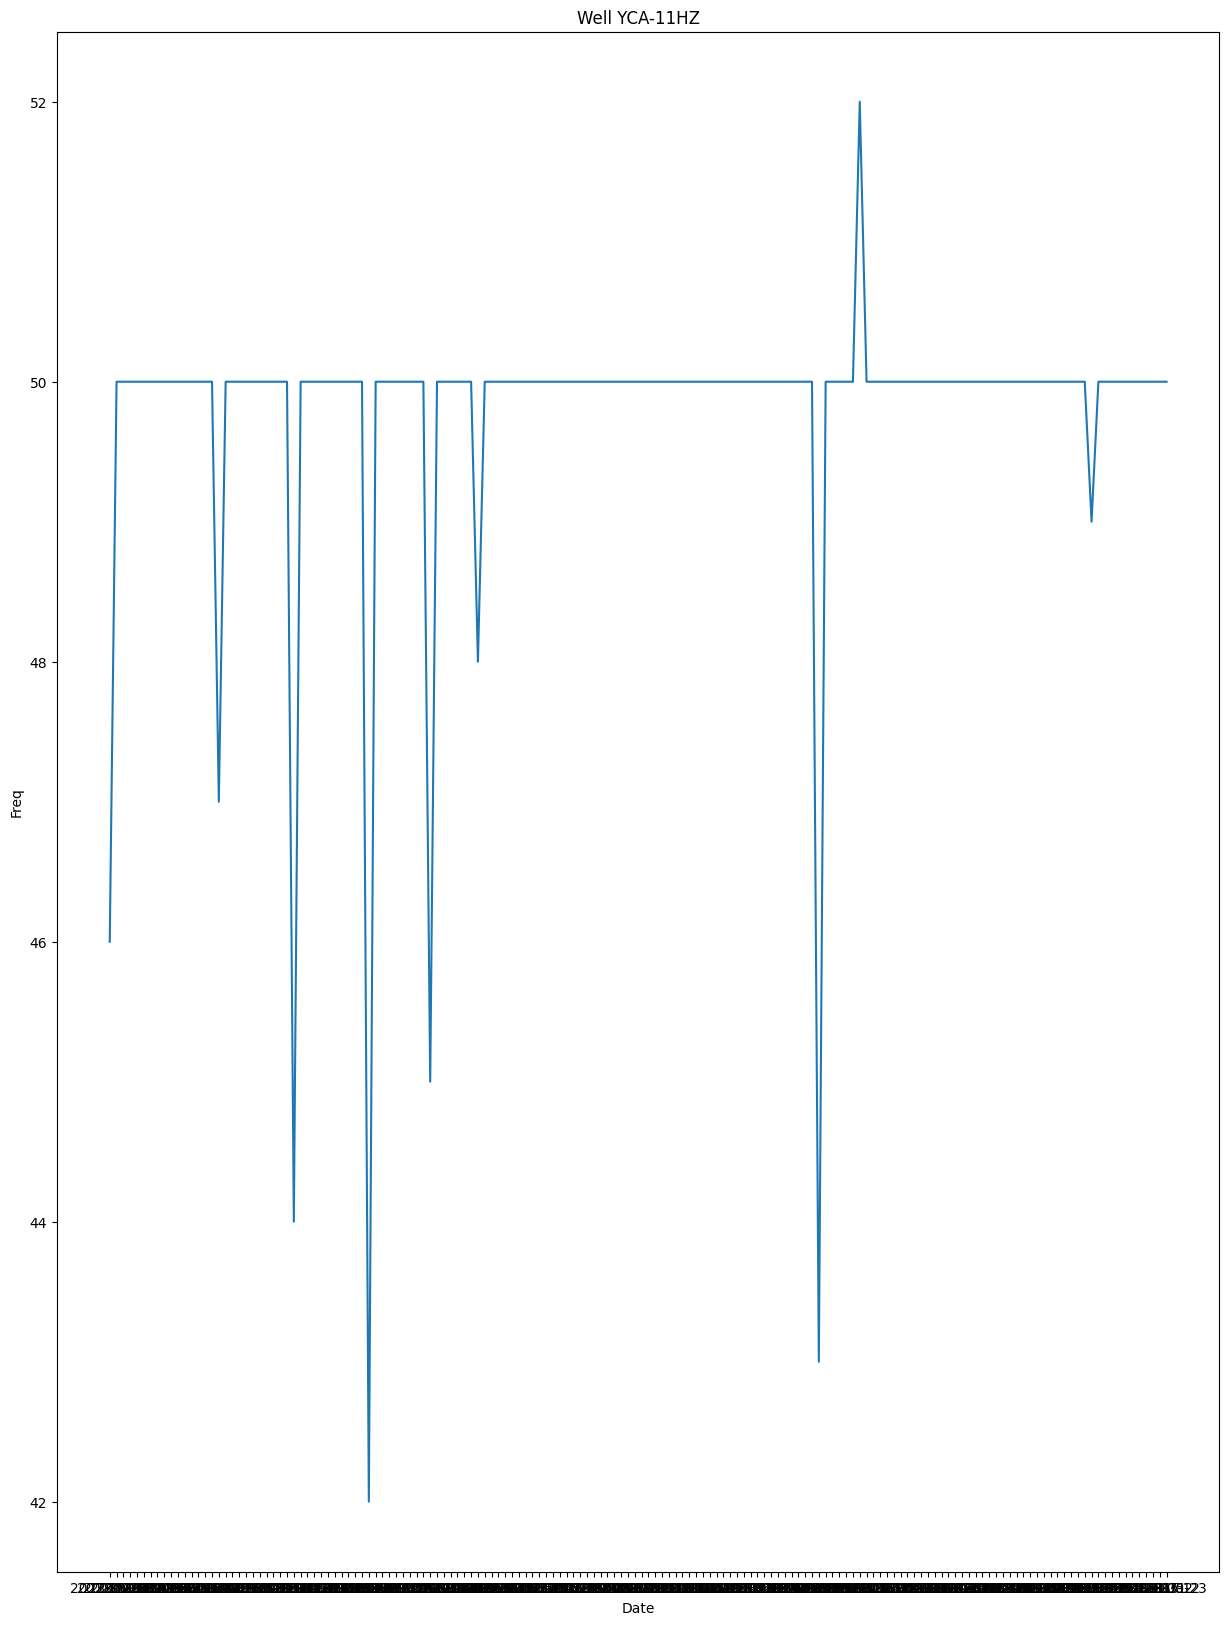

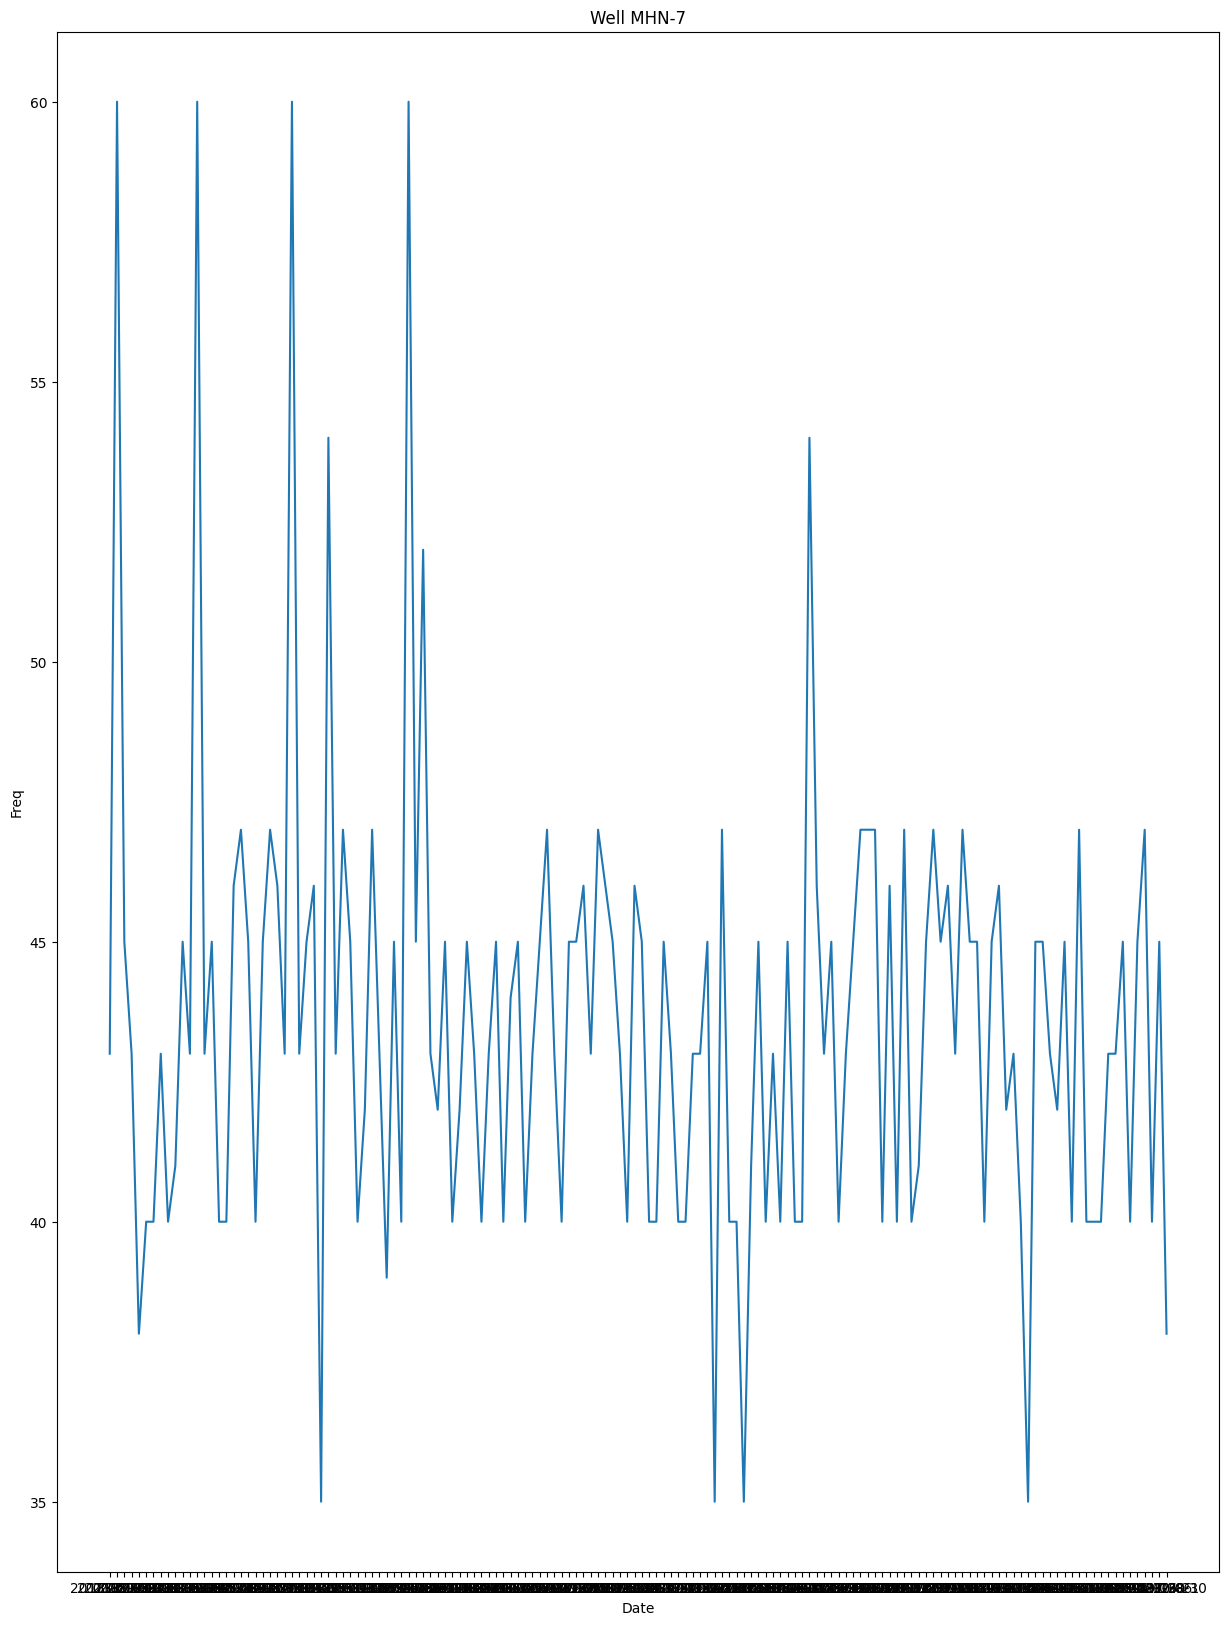

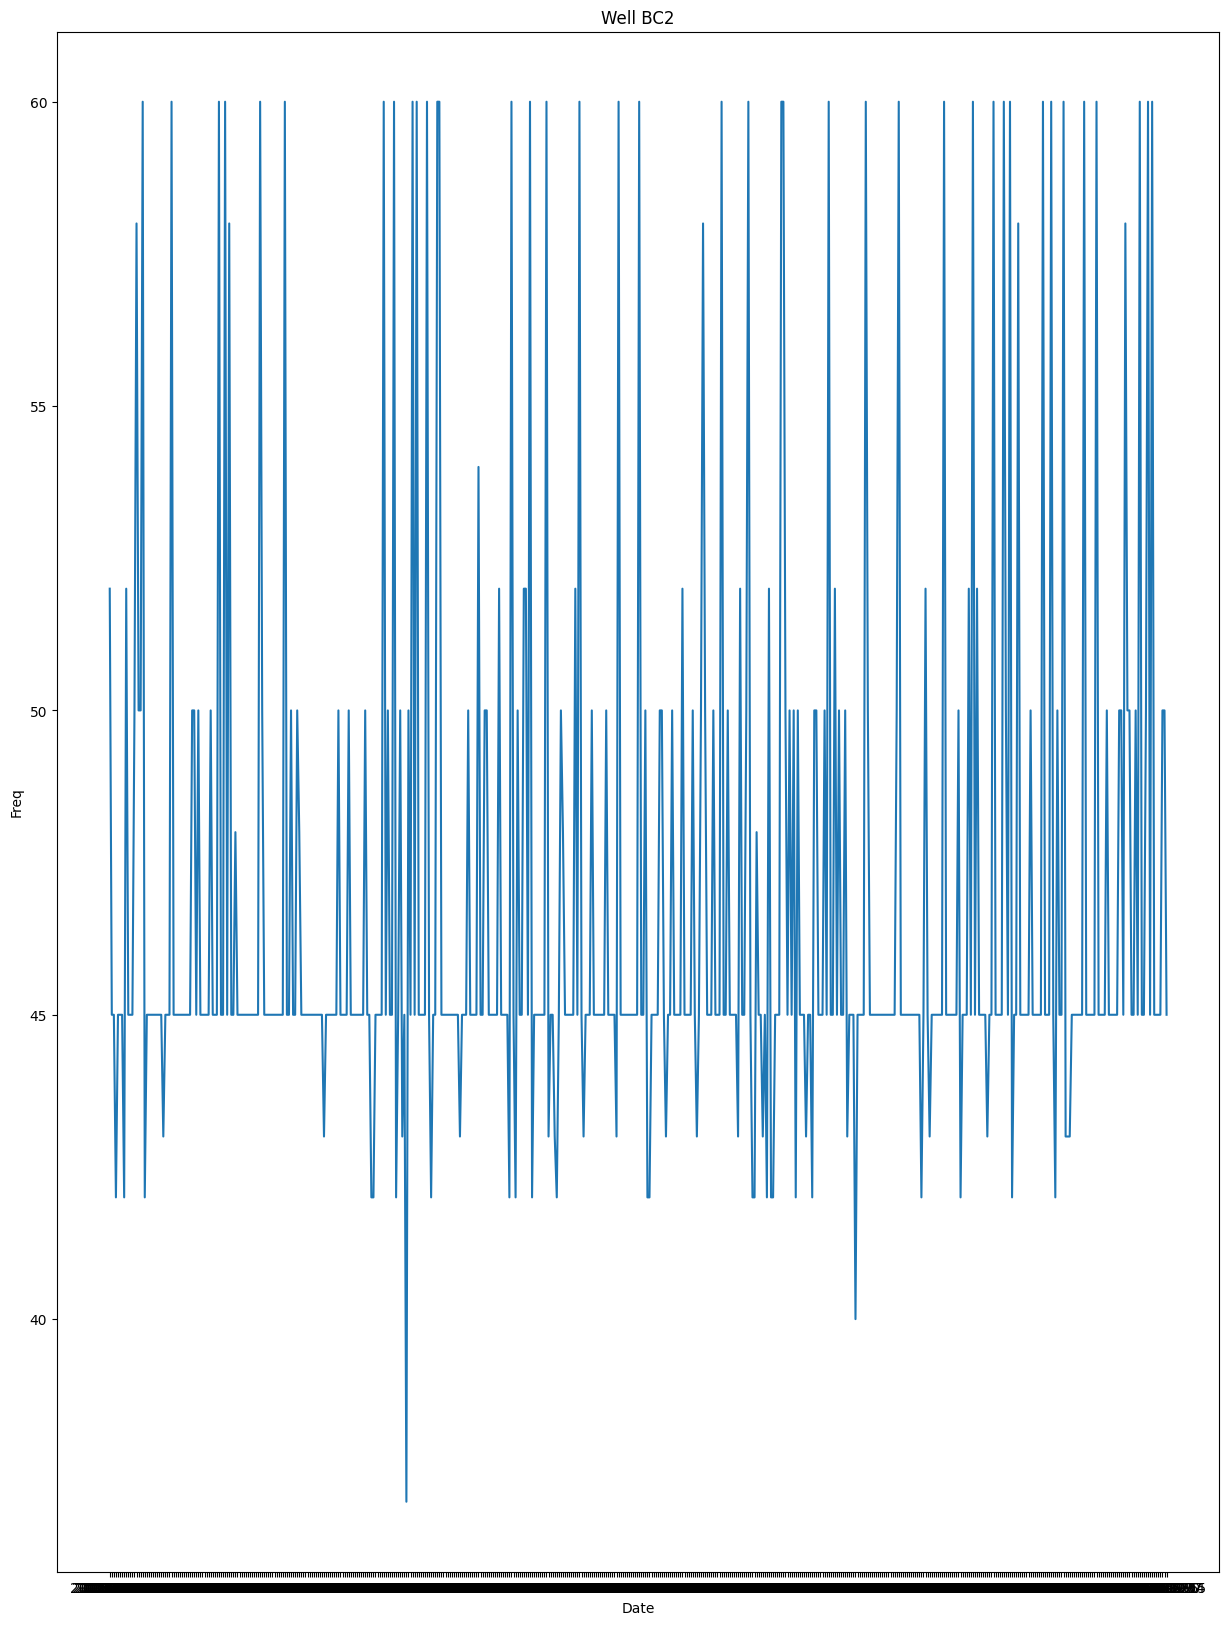

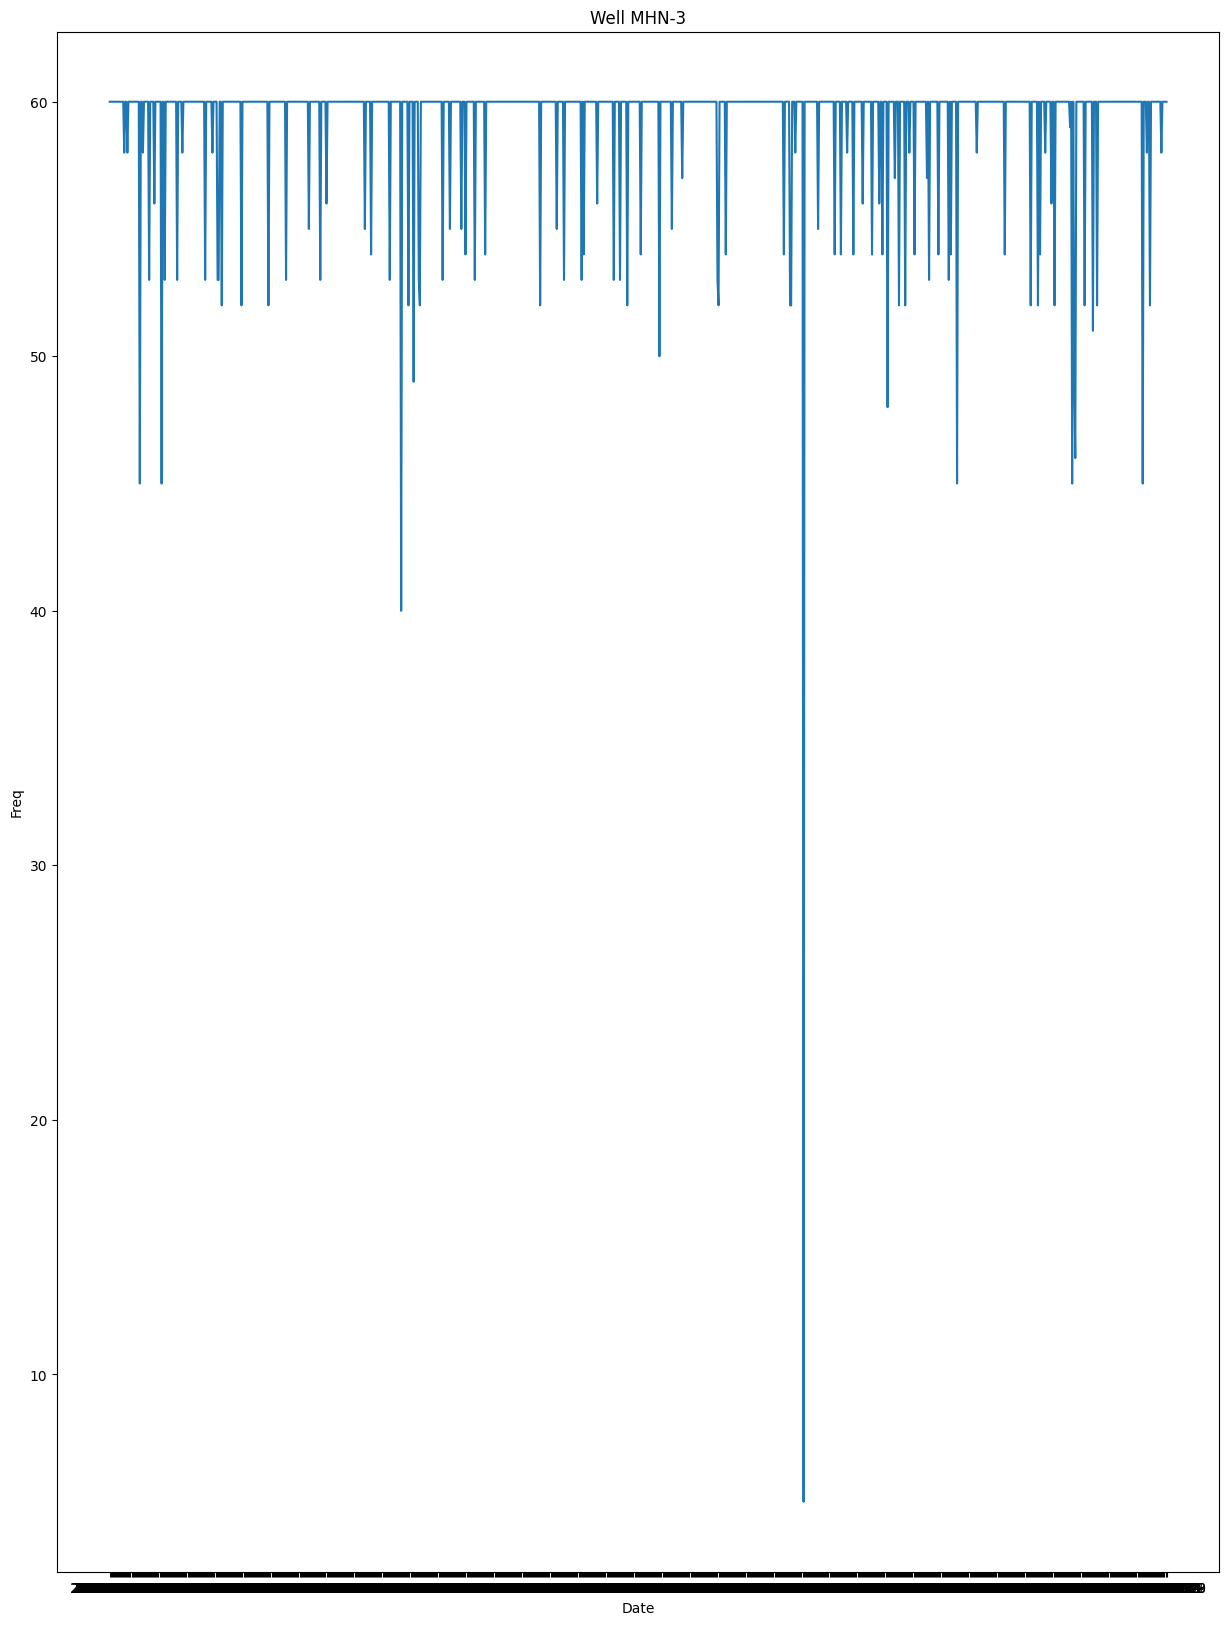

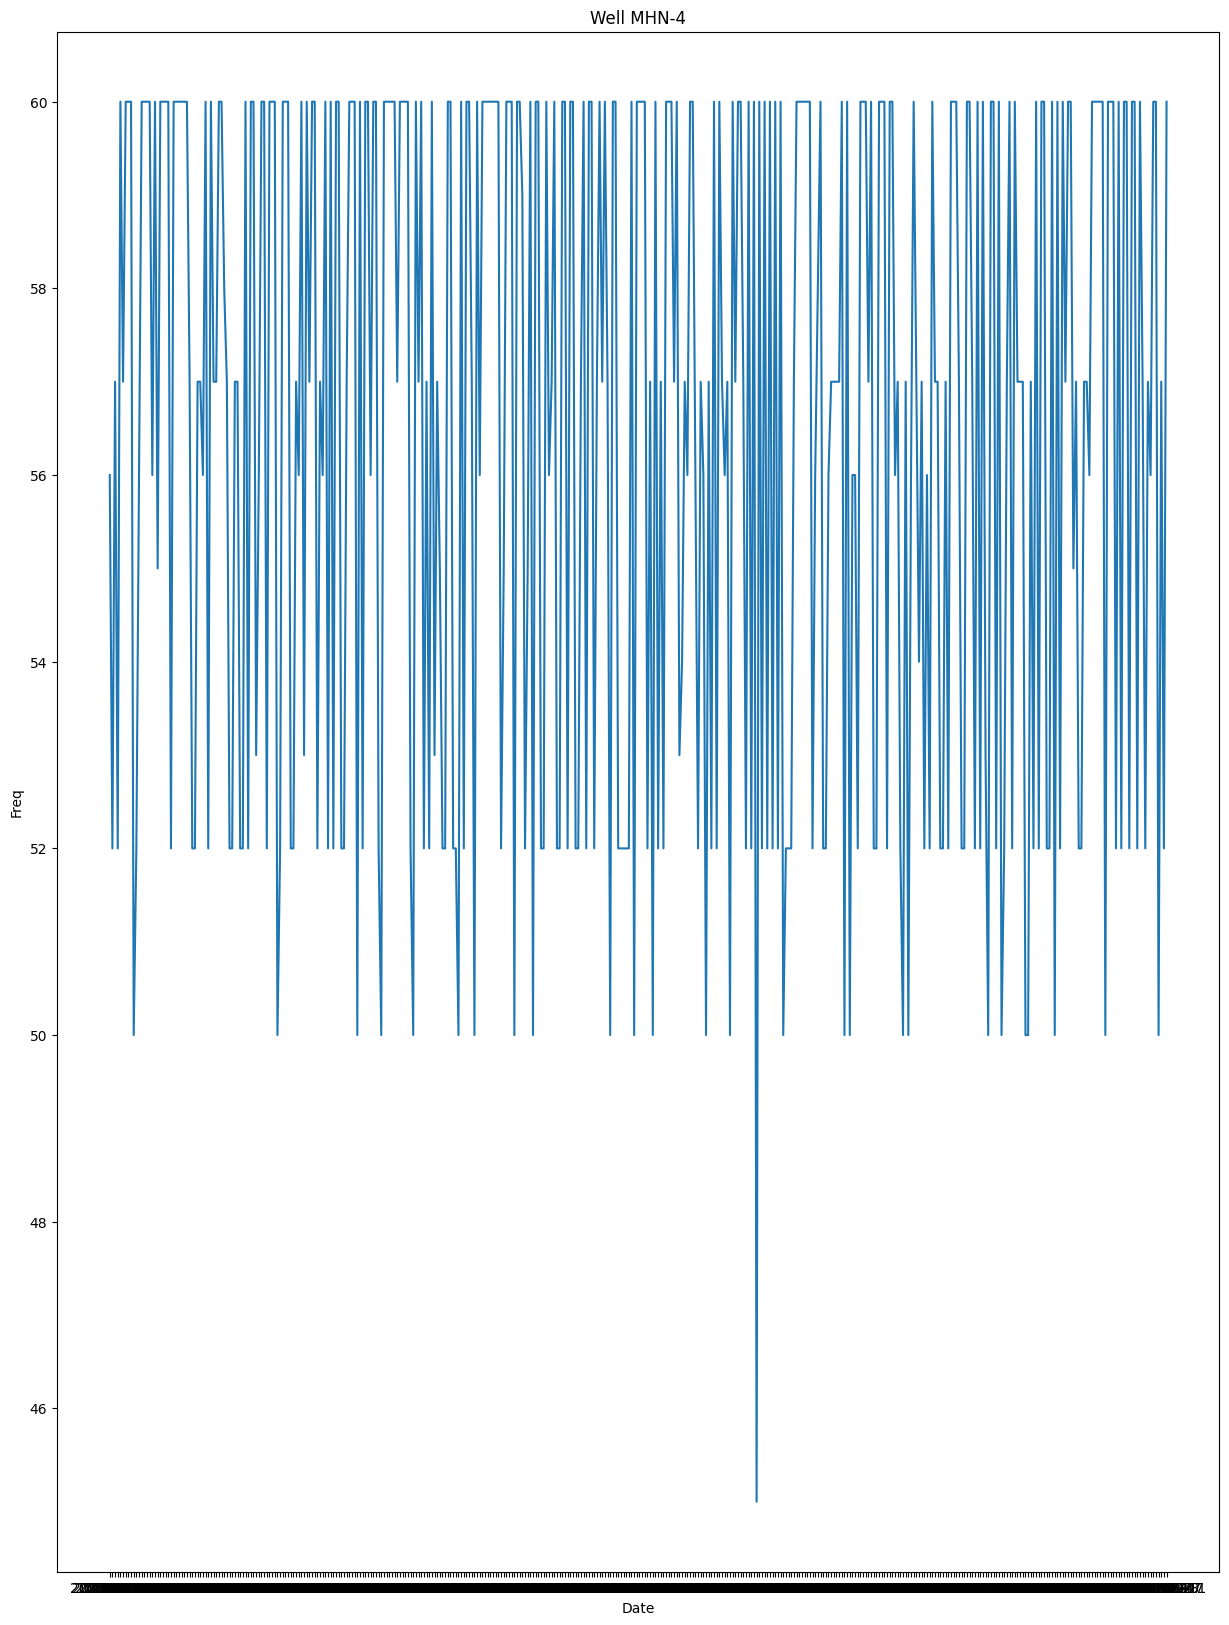

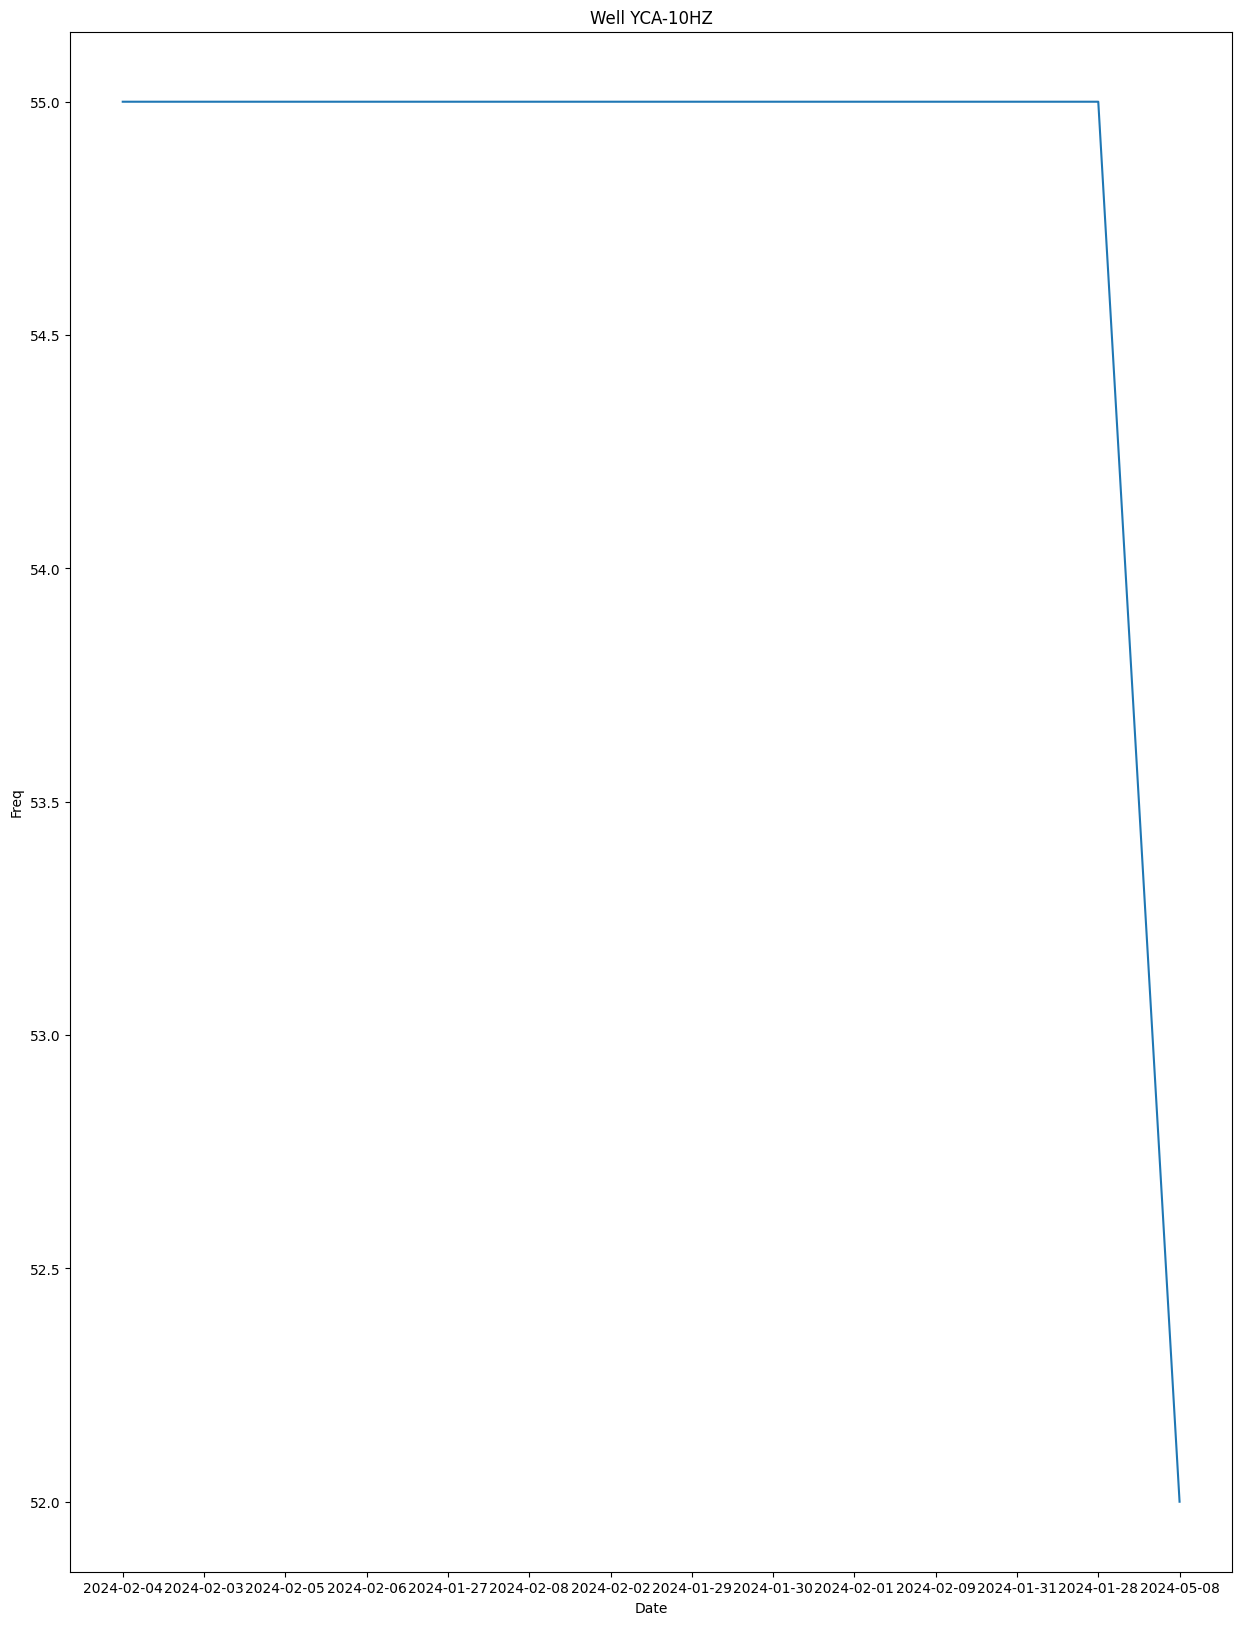

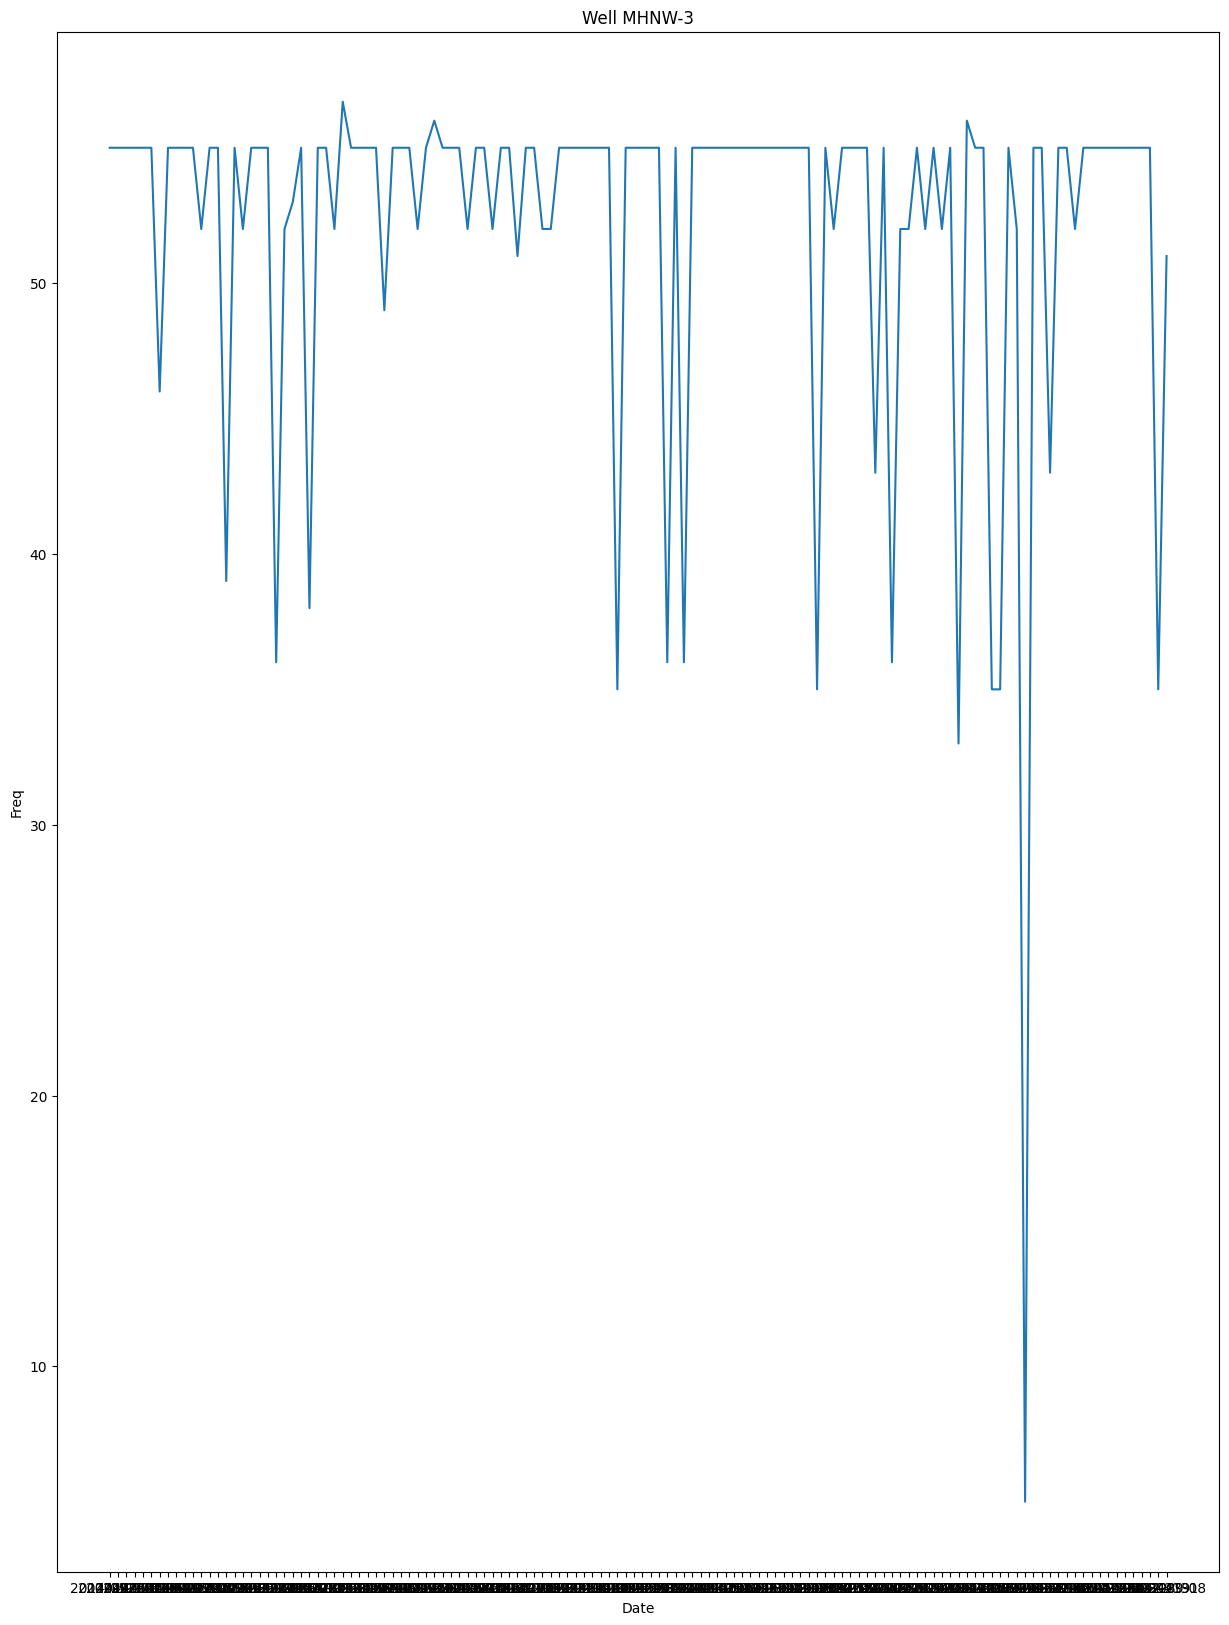

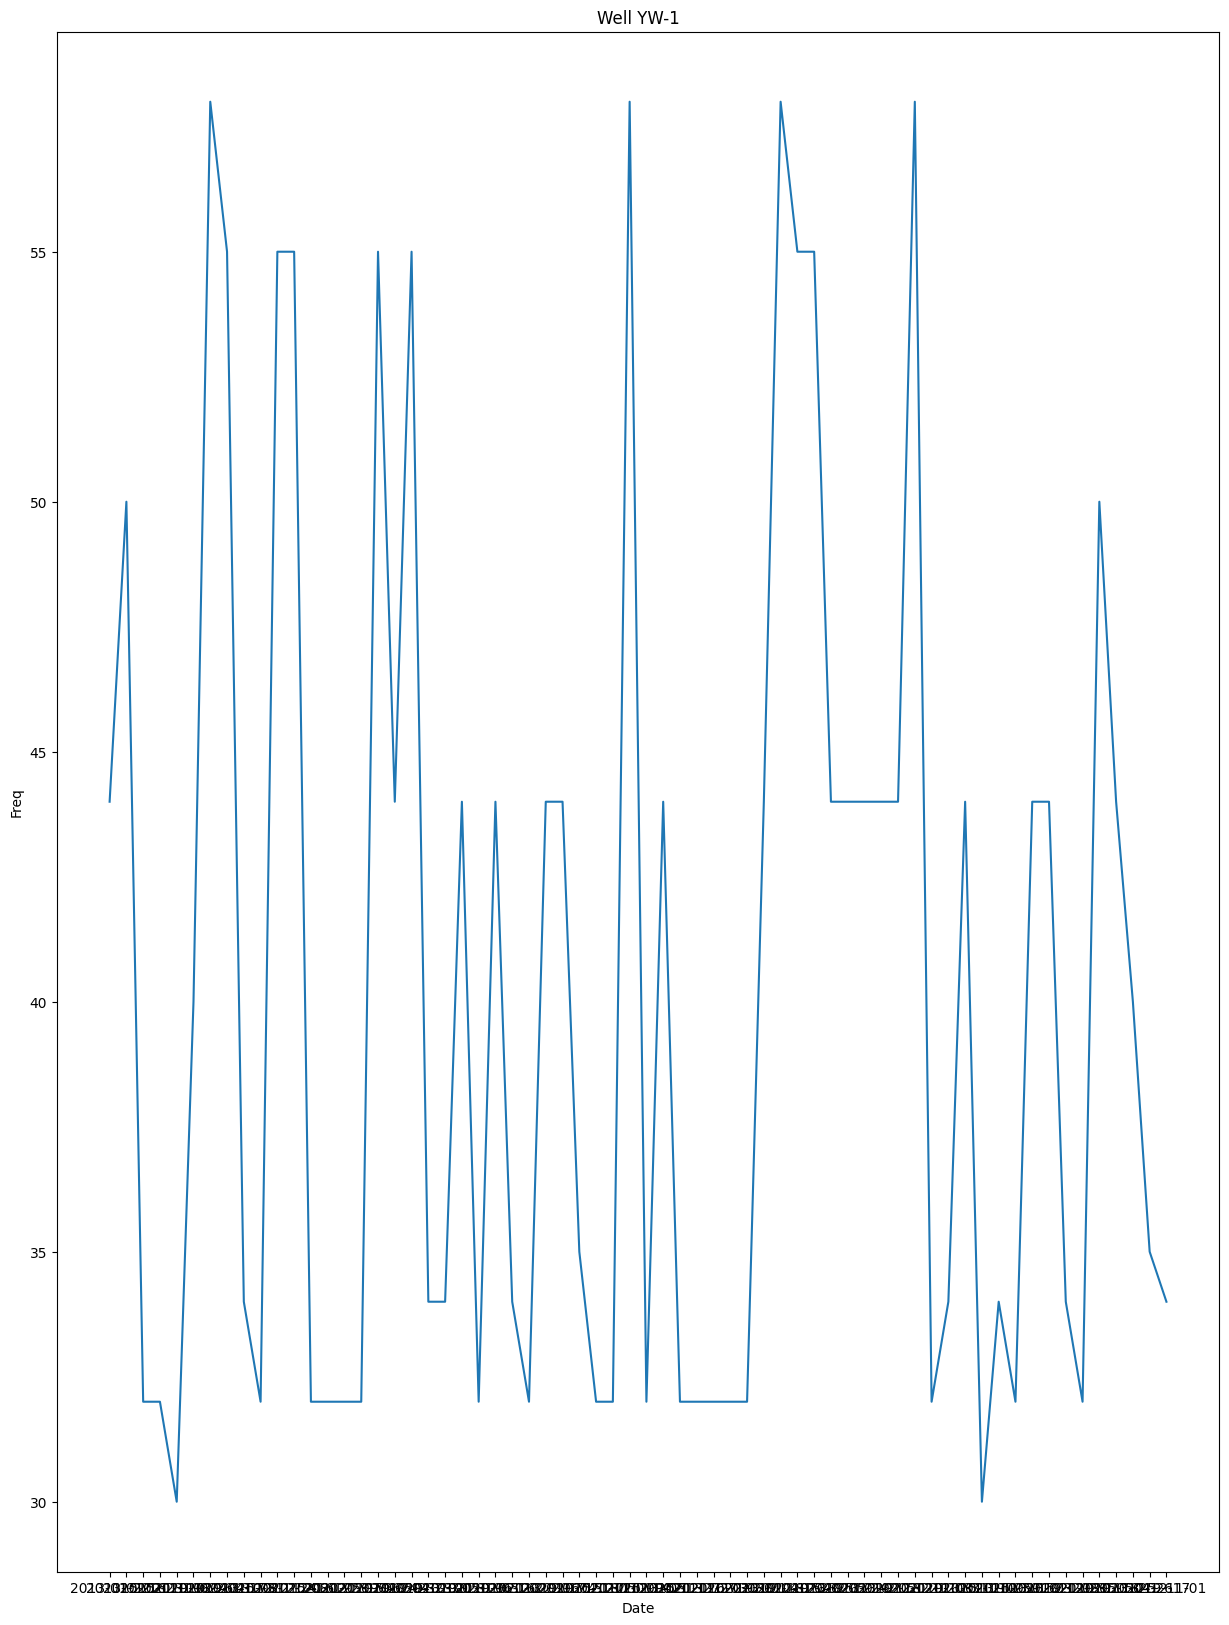

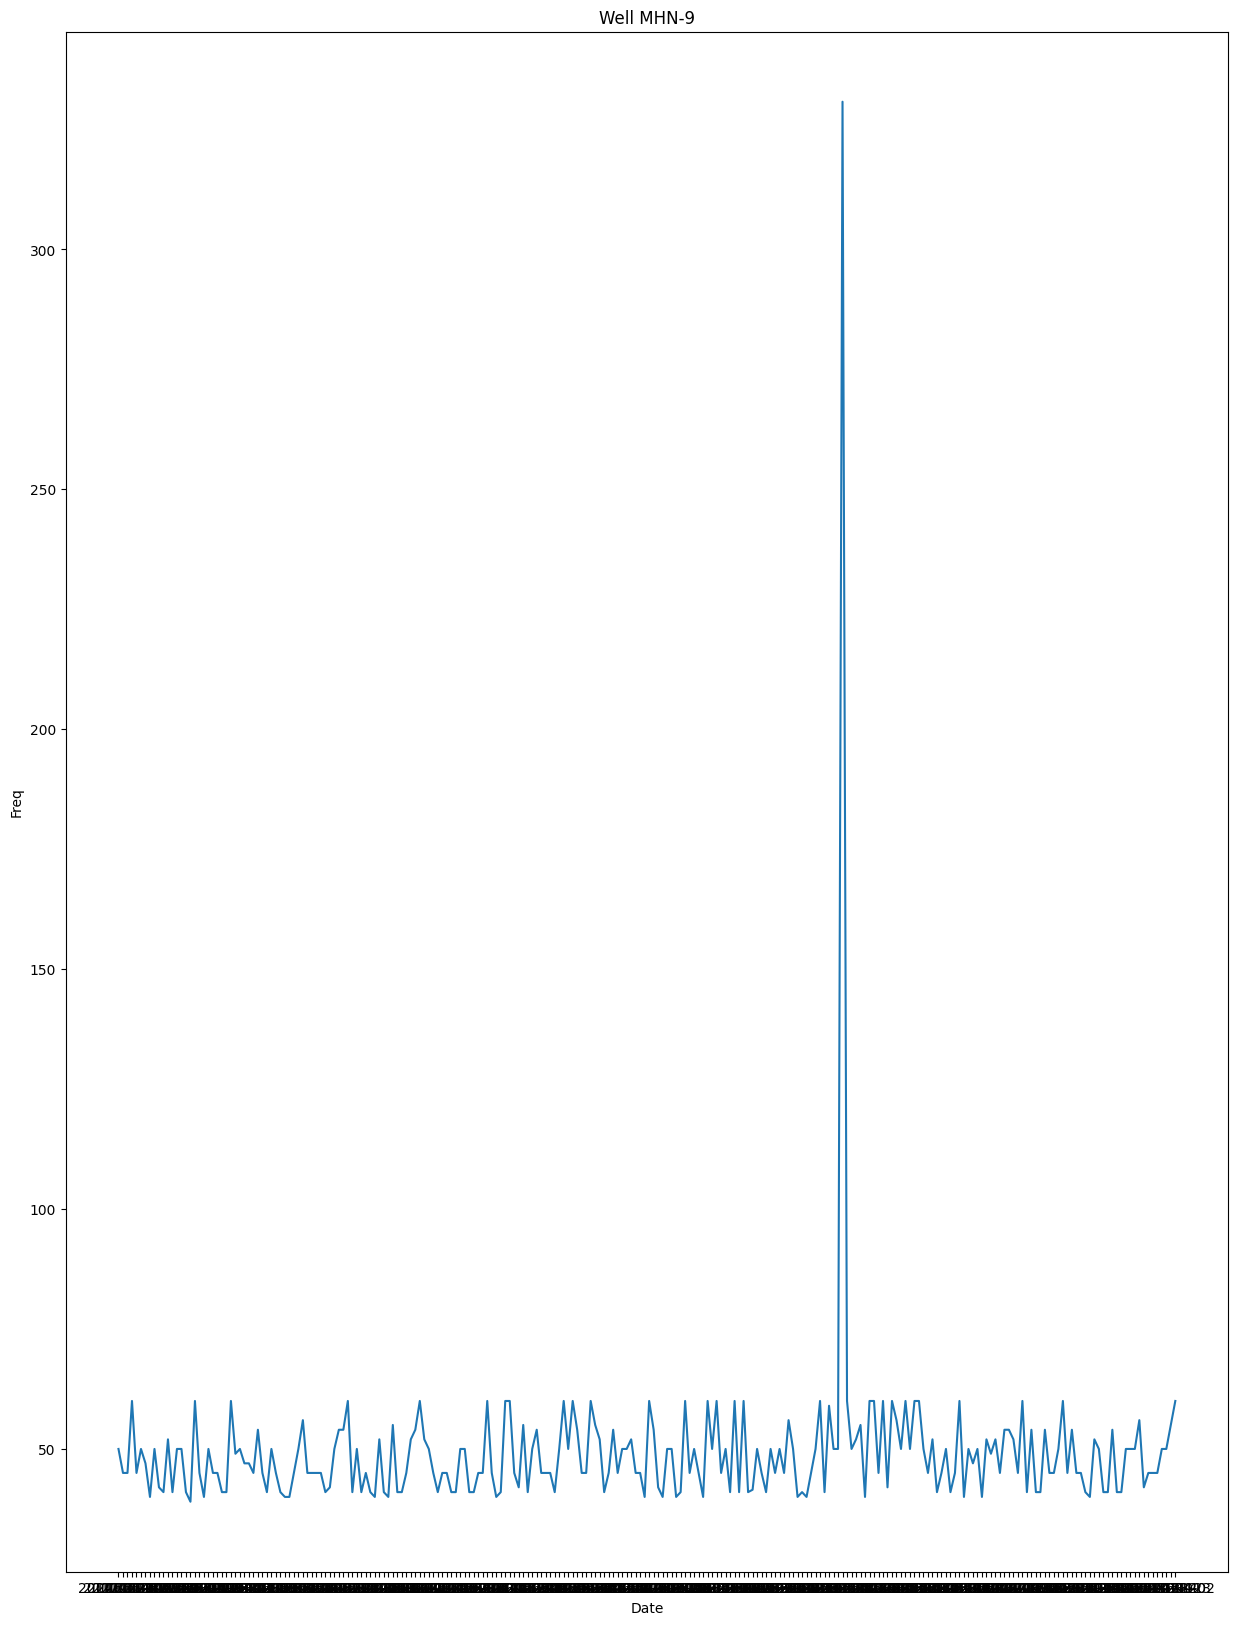

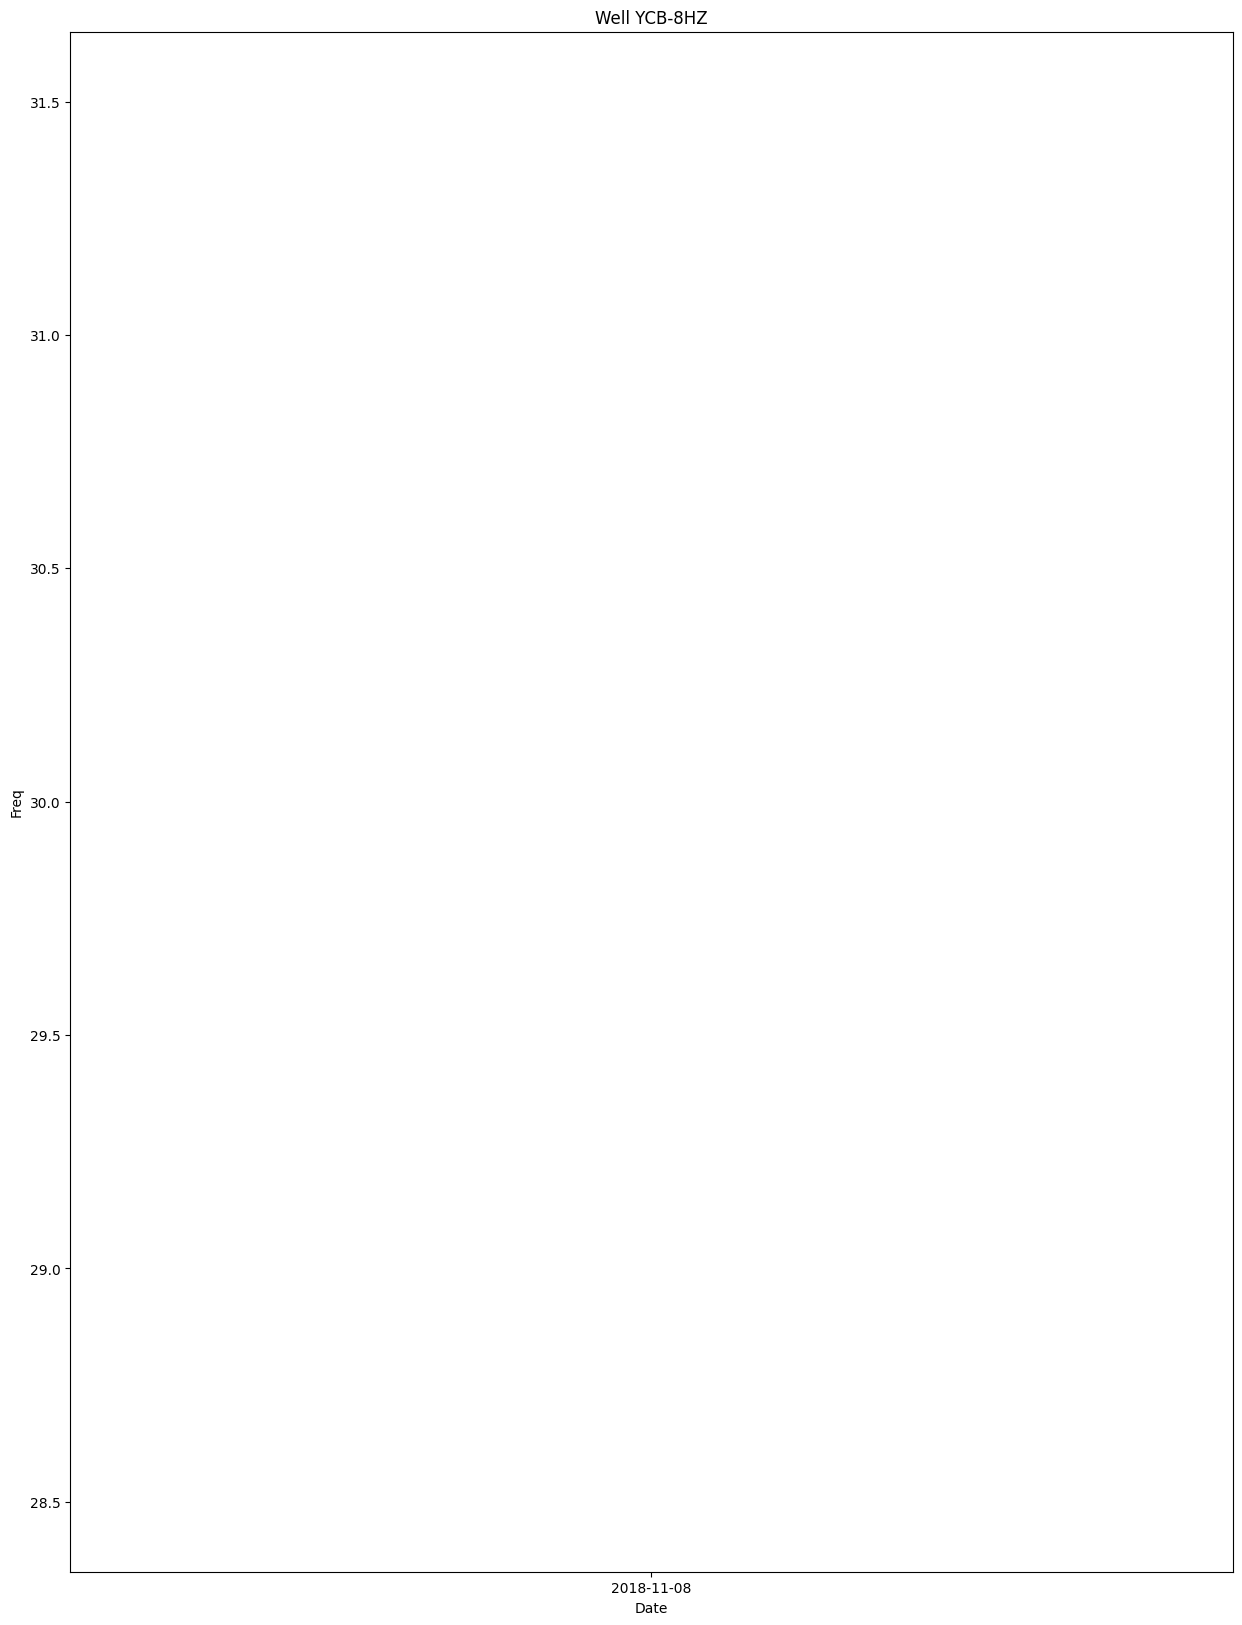

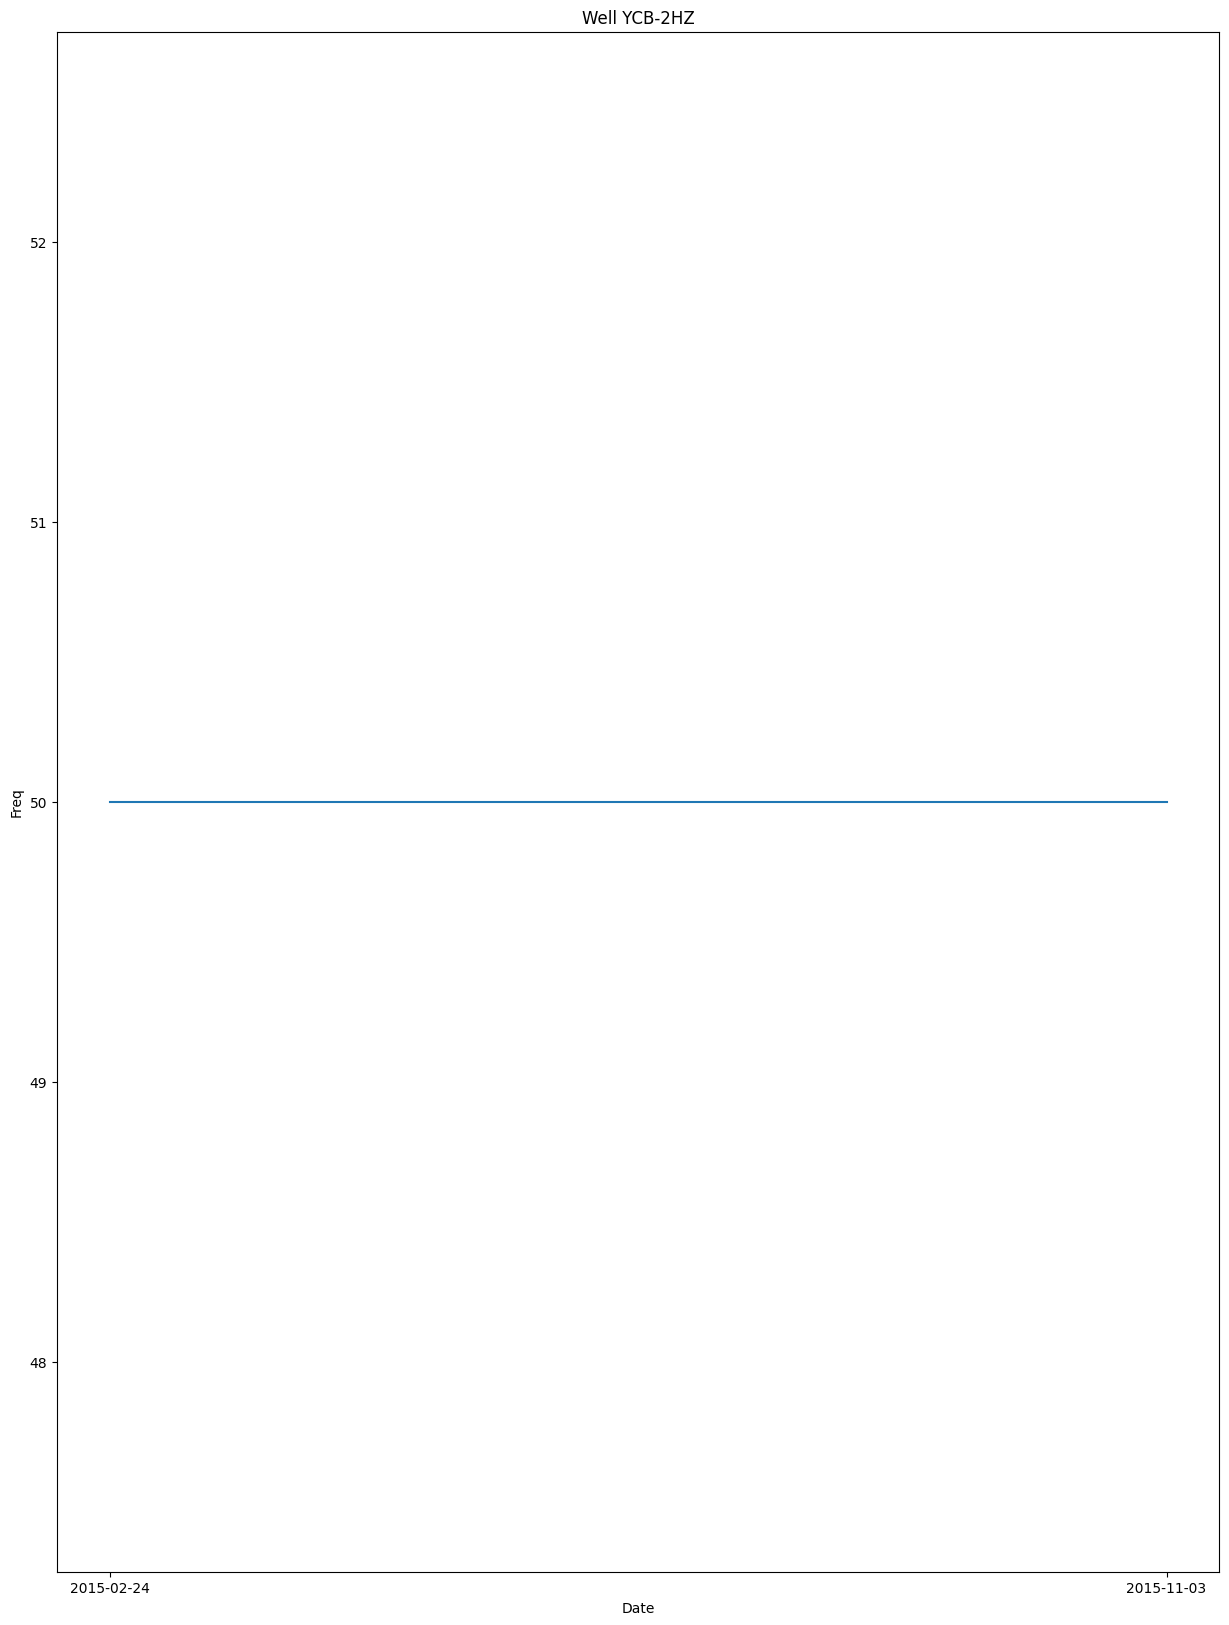

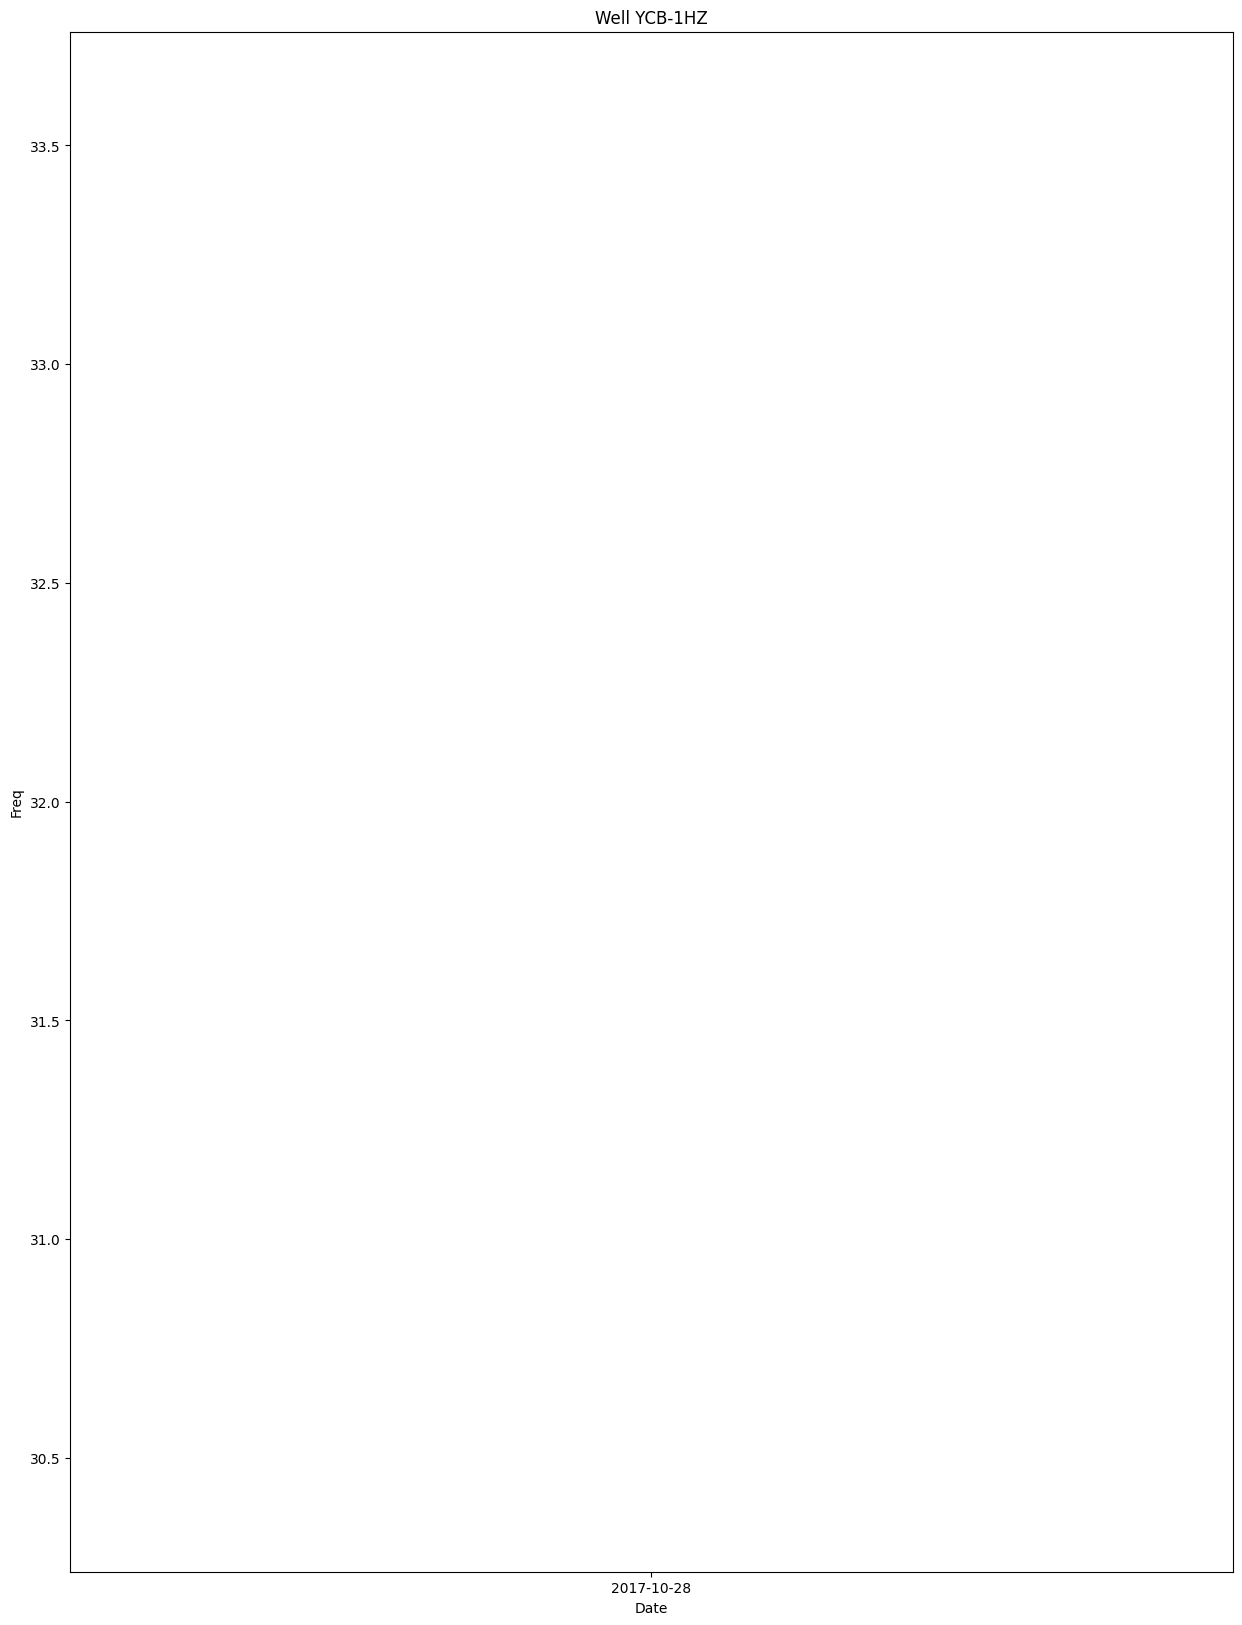

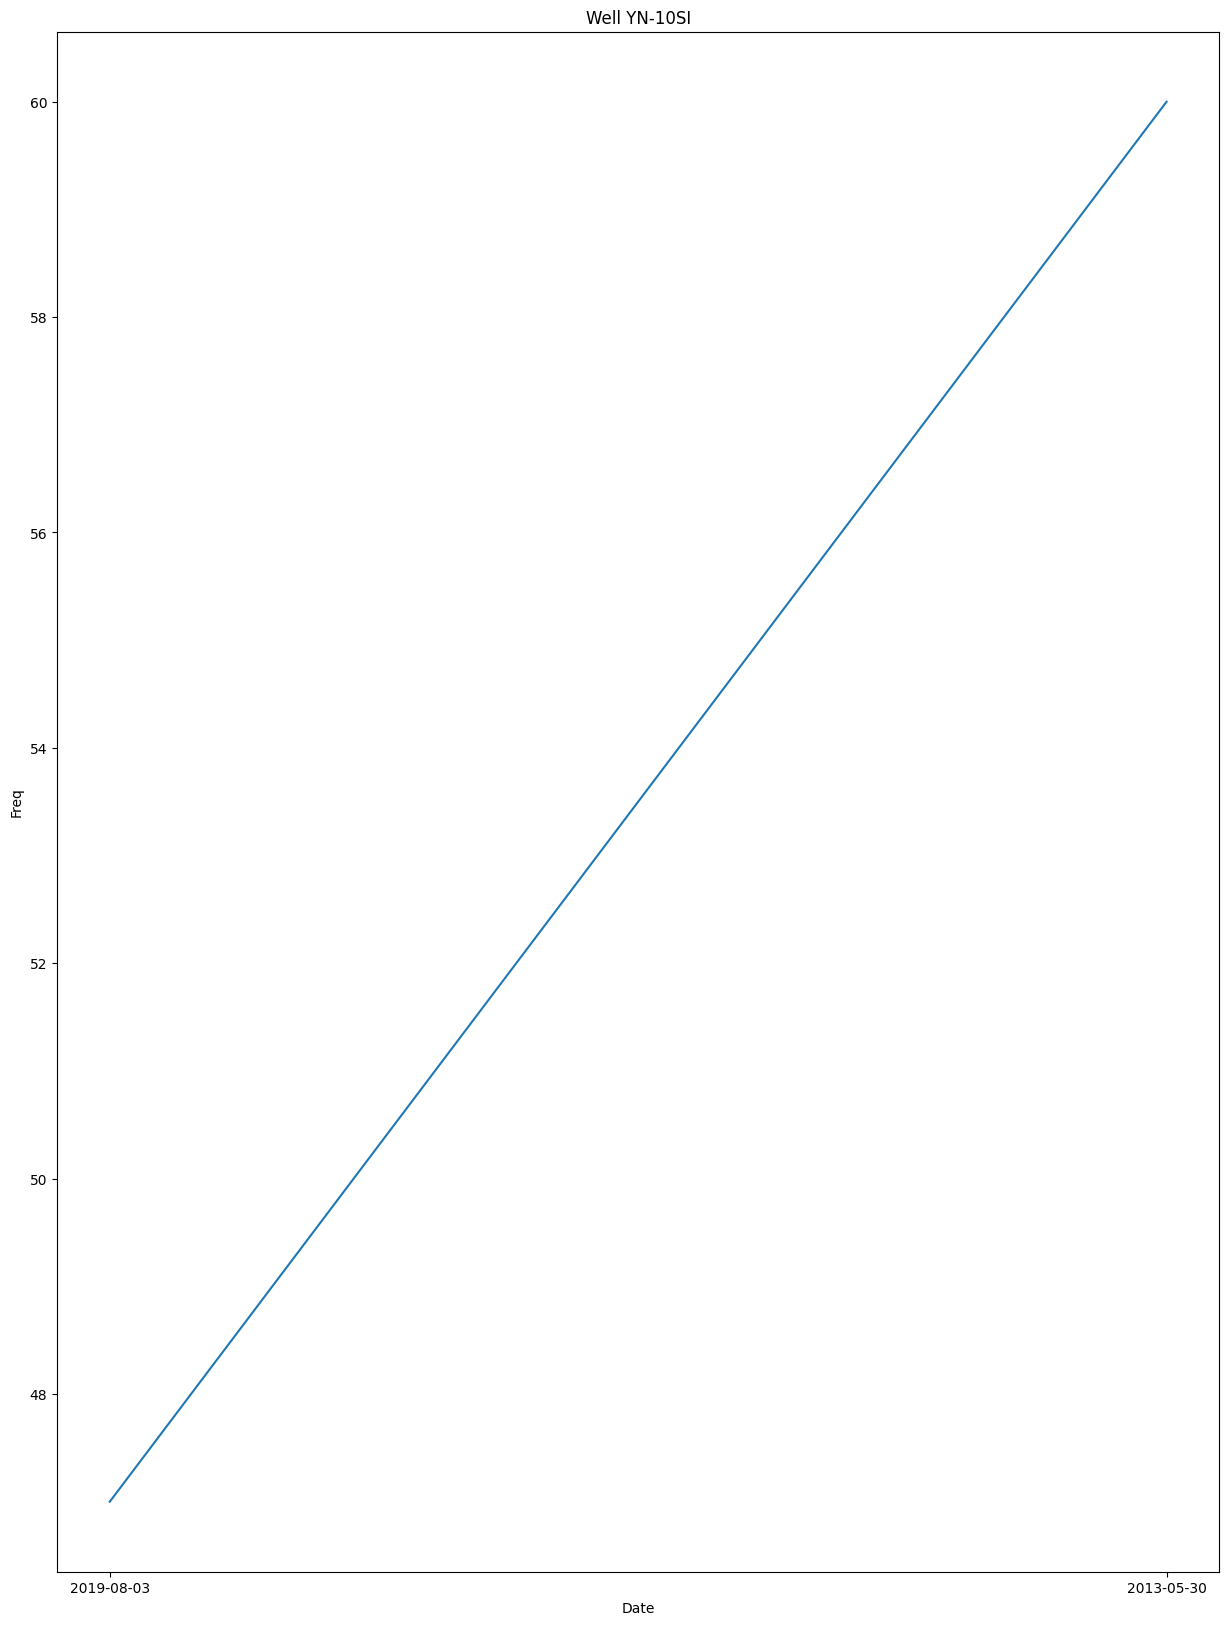

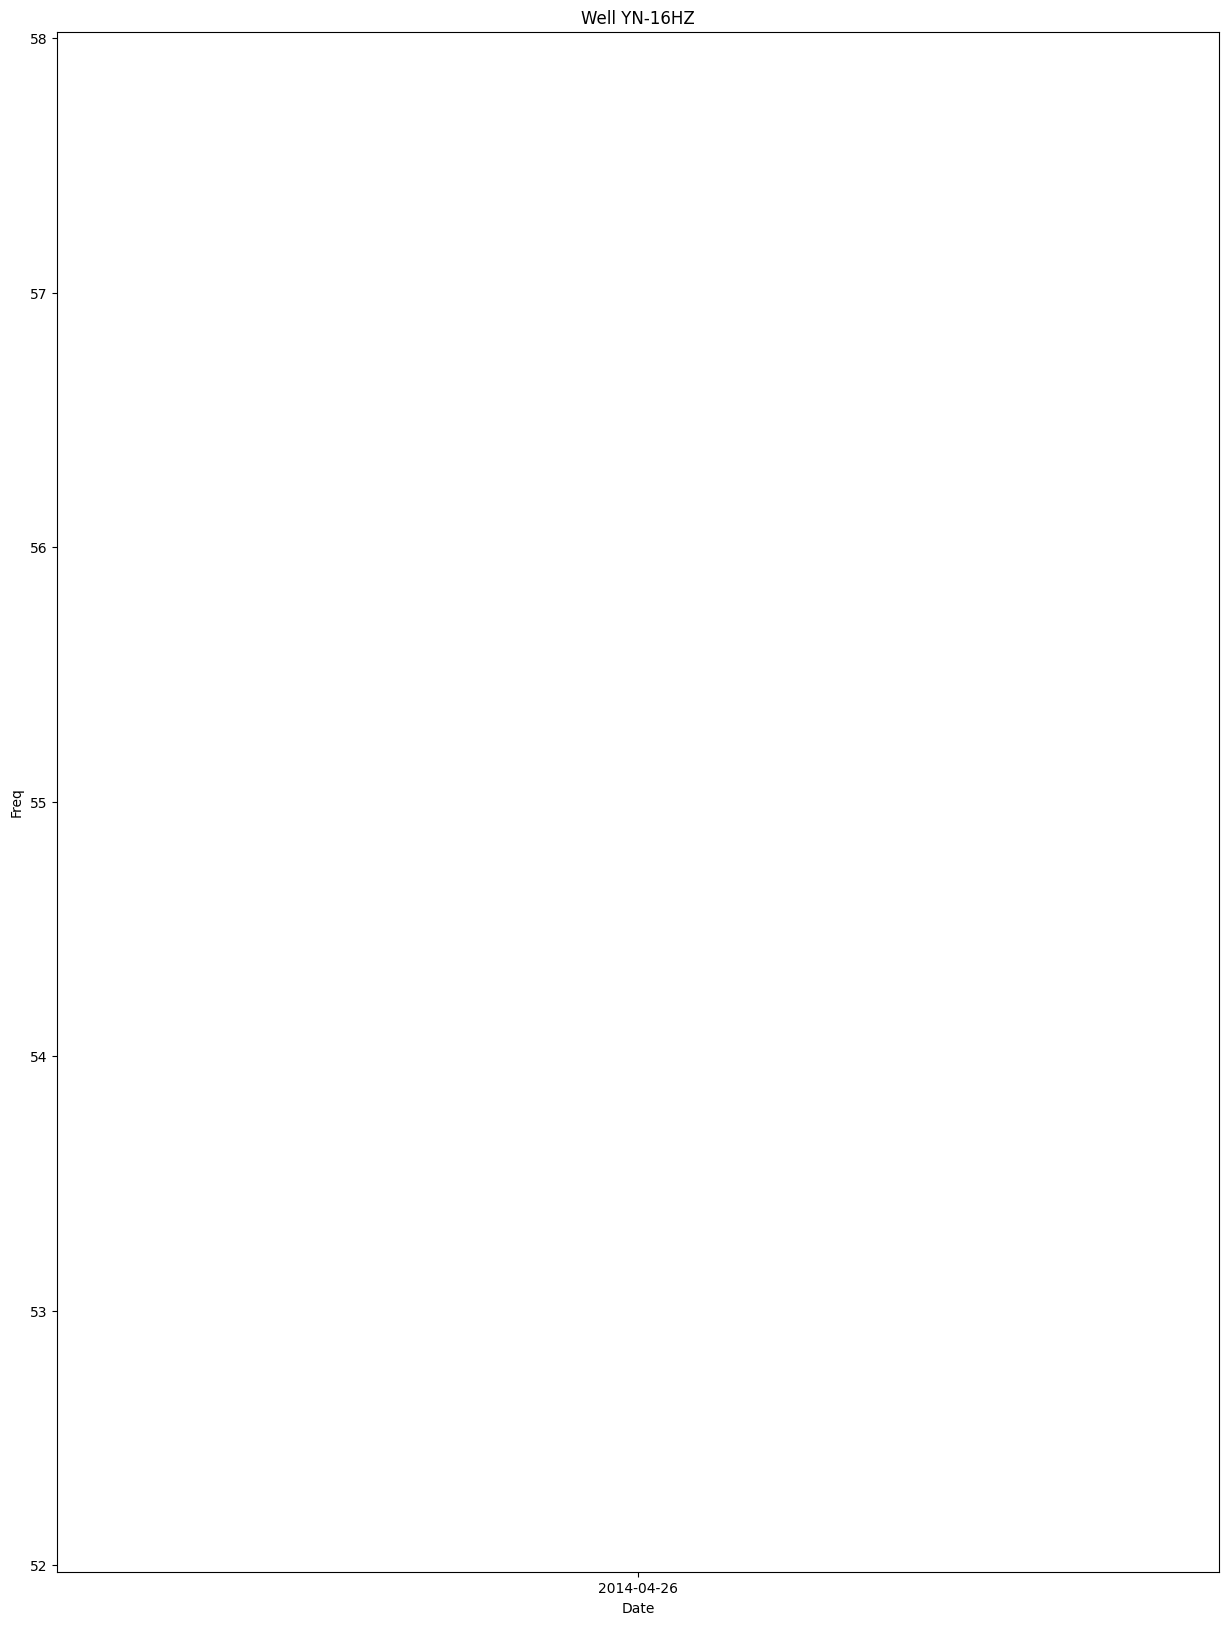

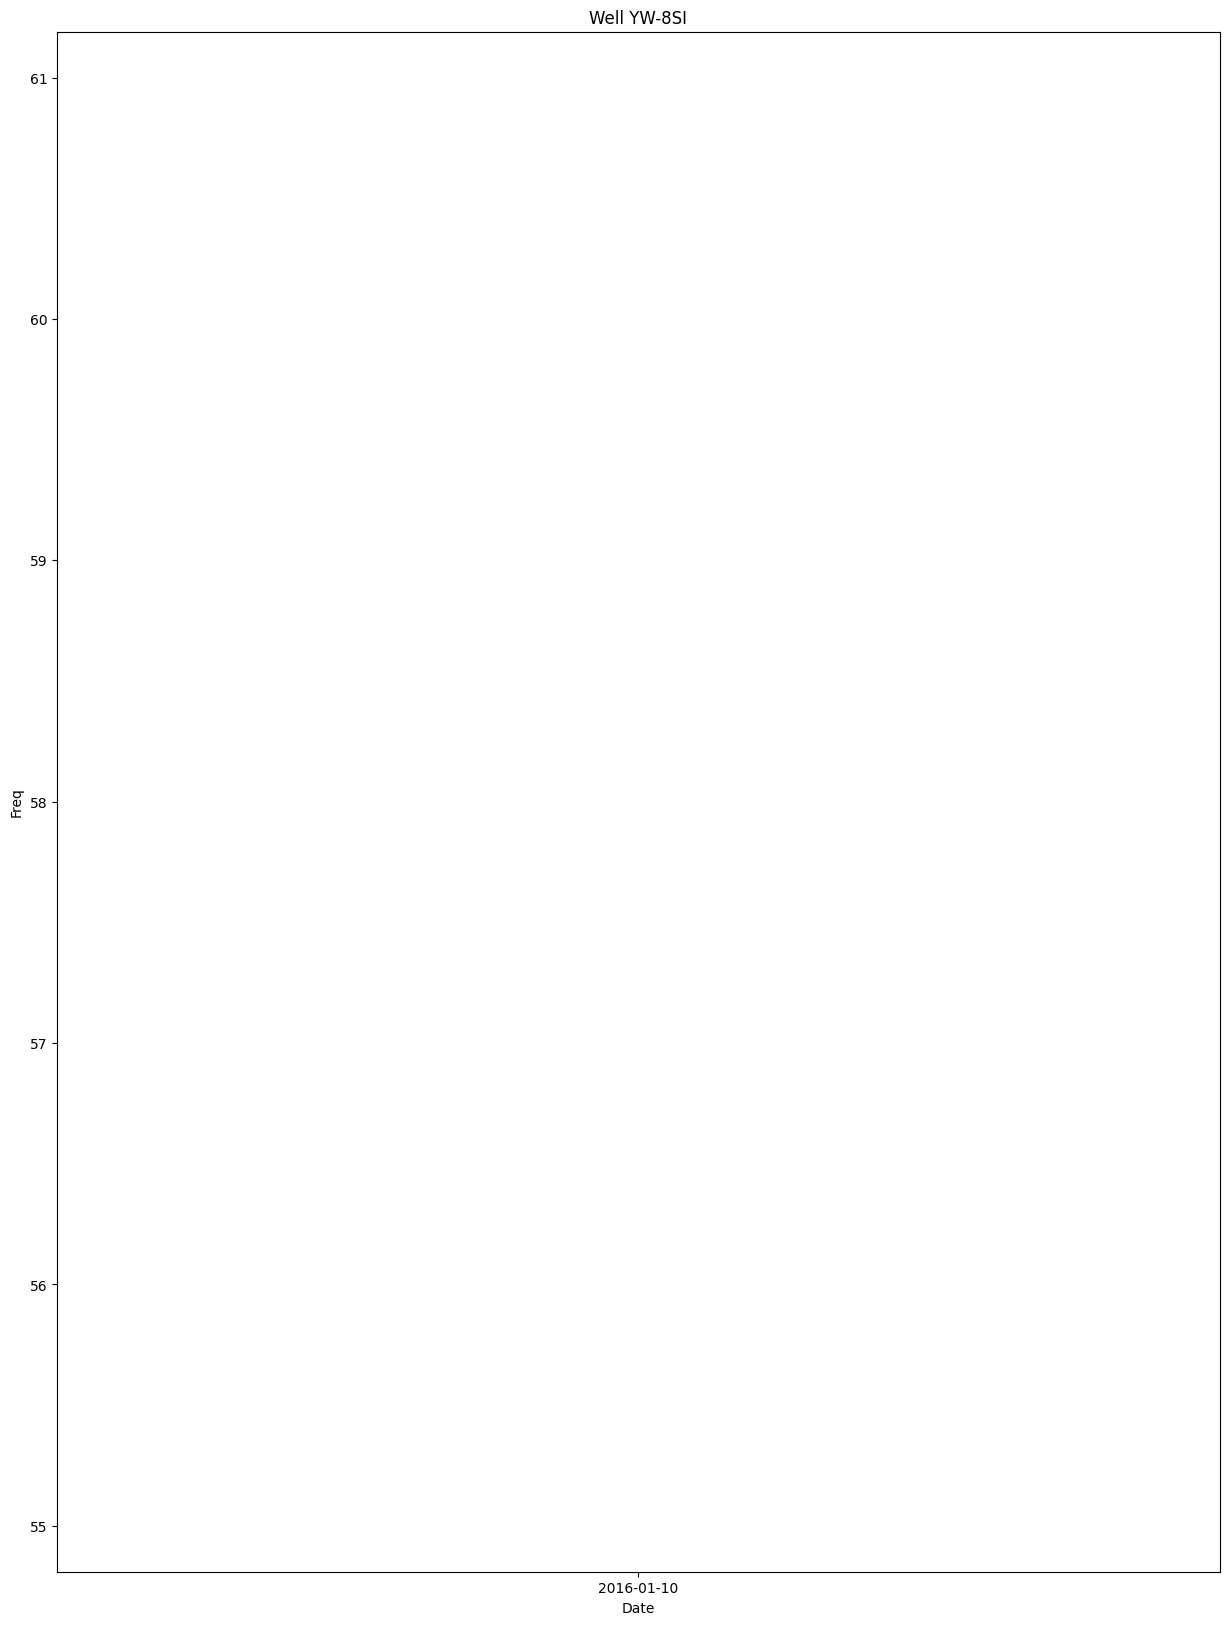

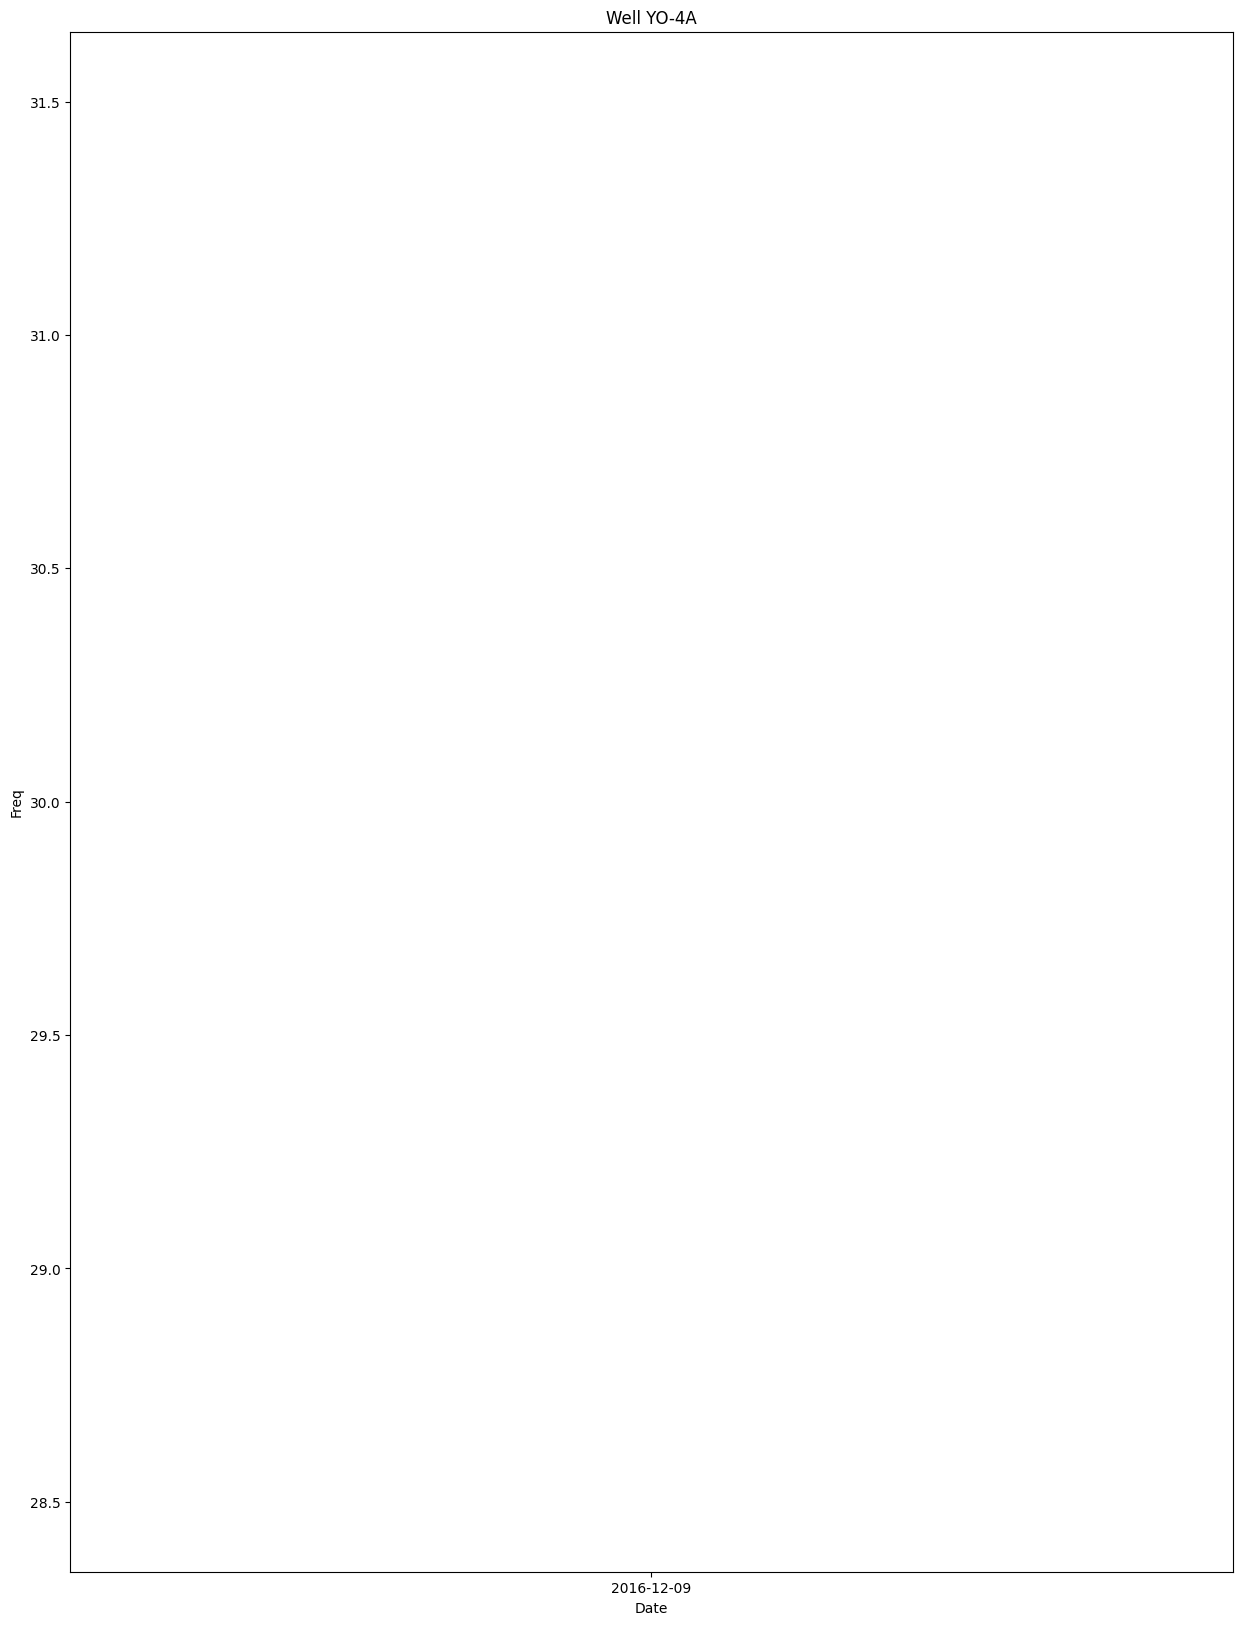

In [ ]:
plot_freq(train,well_dict)